<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Fall 2018</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: Jan 1, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. You will also write a report (.pdf) which contains your written answers and plots you will produce here. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
        For written questions, your answers have to be in the report as a ".pdf" file.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in both cell output and your ".pdf" file.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the requirements.txt.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        While submitting the homework file, please package your report(".pdf") and notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries install attached "requirements.txt" and run following command in activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

## Question 1 [20 pts]

Assume that you are provided a two hidden layer neural network designed to solve a binary classification problem. This architecture uses ReLU activation function between two hidden layers. You should choose the appropriate activation function of the output layer and loss function for the binary classification problem. Compute the gradients and update the weights only for a single iteration. You DO NOT need to provide any numeric inputs to feed the network to compute gradients. You only need to show derivations for the gradients in backpropagation. Provide a pdf file containing your answer (Hint: you do not need the neuron sizes if you use matrix notation).

## Question 2 [27 pts]

In this question, you will perform multi-class clasification on a gene expression dataset. Specificically, you will implement a neural network with two hidden layers to predict discrete tumor types: BRCA, KIRC, COAD, LUAD and PRAD.
Your features will be continuous gene activity (expression) levels. Download the dataset from the following link:
<br>
https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq. 
See details below.

### Data Loader [4 pts]

An important part of such a task is to implement your own data loader. In this homework, we provide a partial loader for you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below  to create your custom "GEDataset" class which will be able to load your dataset. 
Implement the functions whose proptotypes are given but the bodies are omitted. Follow the TODO notes below. You have to divide the dataset into three sections which are <b>"train (50%)", "validation (20%)" and "test (30%)"</b>. These non-overlapping splits, which are subsets of GEDataset, should be retrieved using the "get_dataset" function. 
<br>
Hint: The dataset is not normalized and your results will heavily depend on your input.



In [1]:
import numpy as np
import pandas as pd
from torch.utils.data.dataset import Dataset

label_to_index = {'BRCA': 0, 'KIRC': 1, 'COAD': 2, 'LUAD':3, 'PRAD':4}
index_to_label = {v:k for k,v in label_to_index.items()}

#https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
class GEDataset(Dataset):
    
    # Define constructor for GEDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, **kwargs):
        self.data = kwargs['data']
        self.labels = kwargs['labels']
        self.labels = list(map(lambda item: label_to_index[item], self.labels))
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.data[index]
        _y = self.labels[index]
        return _x, _y


def get_dataset(root):
    # Read dataset files from "data/Q1" folder
    data = np.genfromtxt(root + "data/Q1/" + "data.csv", delimiter=",")
    data = data[1:, 1:]
    labels = pd.read_csv(root + "data/Q1/" + "labels.csv")
    labels = labels.values[:,1]
    
    # Split dataset samples into the 3 part for training, validation and test
    
    train_dataset = data[0:int(len(data)*0.5)]
    val_dataset = data[int(len(data)*0.5):int(len(data)*0.7)]
    test_dataset = data[int(len(data)*0.7):]
    
    # Normalize datasets
    train_dataset = np.apply_along_axis(normalize_data, 0, train_dataset)
    val_dataset = np.apply_along_axis(normalize_data, 0, val_dataset)
    test_dataset = np.apply_along_axis(normalize_data, 0, test_dataset)
    
    kwargs = {'data': train_dataset, 'labels': labels[0:int(len(labels)*0.5)]}
    train_dataset = GEDataset(**kwargs)
    
    kwargs = {'data': val_dataset, 'labels': labels[int(len(labels)*0.5):int(len(labels)*0.7)]}
    val_dataset = GEDataset(**kwargs)
    
    kwargs = {'data': test_dataset, 'labels': labels[int(len(labels)*0.7):]}
    test_dataset = GEDataset(**kwargs)
    
    return train_dataset, val_dataset, test_dataset

def normalize_data(column):
    mean = np.mean(column)
    std = np.std(column)
    if std == 0.0:
        return column
    return (column - mean) / std

### Neural Network (5 pts)

Now implement your two hidden layer neural network. GENet class will represent your neural network. First hidden layer will contain 64 neurons and second hidden layer will contain 32 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. Implement the functions with missing bodies.

In [2]:
import torch
import torch.nn as nn

class GENet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # You should create your neural network here
        super(GENet, self).__init__()
        self.hidden1 = nn.Sequential(
            nn.Linear(20531, 64),
            nn.ReLU())
        self.hidden2 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU())
        self.output = nn.Sequential(
            nn.Linear(32, 5))
     
    def forward(self, X): # you can add any additional parameters you want
    # Forward propagation implementation should be here
        out = self.hidden1(X)
        out = self.hidden2(out)
        out = self.output(out)
        return out

### Training (7 pts)

Complete below code snippet to train your network. You need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing above. Note that you will not do cross validation. You will need to load these splits at this phase. Make sure that you shuffle the samples in the training split. Plot training loss and training accuracy of each iteration (each batch). Also plot validation loss and accuracy at each epoch. Use matplotlib library for plotting. Your model is going to run upto the max epoch parameter. Pick the best model so far as your resulting model. You need to save this model in a ".pth" file. 

In [3]:
train_dataset, val_dataset, test_dataset = get_dataset("./")

In [4]:
from torch.utils.data import DataLoader
import time
#HINT: note that your training time should not take many days.

#Pick your hyper parameters
max_epoch = 8
train_batch = 64
val_batch = 32
test_batch = 48
learning_rate = 0.001

#use_gpu = torch.cuda.is_available()

# Inspired from: https://github.com/pytorch/examples/blob/master/imagenet/main.py
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def main(train_results, val_results): # you are free to change parameters
    
    # Create train dataset loader
    trainloader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
    
    # Create validation dataset loader
    val_loader = DataLoader(val_dataset, batch_size=val_batch)
    
    # initialize your GENet neural network
    model = GENet()
    
    # define your loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0
    best_path = "genet_best_model.pth"
    for epoch in range(max_epoch):
        res = train(epoch, model, criterion, optimizer, trainloader)
        train_results.append(res)
        res = test(model, val_loader, criterion)
        acc = res[0]
        val_results.append(res)
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), best_path)

''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    t1 = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        data_time.update(time.time() - t1)
        
        # Implement training code for a one iteration
        
        output = model(data.float())
        loss = criterion(output, labels)
        _, predicted = torch.max(output, 1)
        acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
        accuracies.update(acc, data.size(0))
        losses.update(loss.item(), data.size(0))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_time.update(time.time() - t1)
        t1 = time.time()
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))
    
    return accuracies.avg, losses.avg


''' Test&Validate your network '''
def test(model, loader, criterion): # you are free to change parameters

    model.eval()
    
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    with torch.no_grad():
        t1 = time.time()
        for batch_idx, (data, labels) in enumerate(loader):
            # Implement test code
            output = model(data.float())
            loss = criterion(output, labels)
            _, predicted = torch.max(output, 1)
            acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
            accuracies.update(acc, data.size(0))
            losses.update(loss.item(), data.size(0))
            
            batch_time.update(time.time() - t1)
            t1 = time.time()
            
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'
              'Loss {loss.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies,
               loss=losses))
        
        return accuracies.avg, losses.avg

### Plotting Your Results [4 pts]

For us to assess if your model has learnt as expected, you have to provide training loss, training accuracy, validation loss and validation accuracy plots. You need to provide two distinct plots, one demonstrating training and validation loss scores and the other demonstrating training and validation accuracies.

In [5]:
import matplotlib.pyplot as plt

# write your code in this cell to plot your results
train_res = list()
val_res = list()
main(train_res, val_res)

train_acc, train_loss = zip(*train_res)
val_acc, val_loss = zip(*val_res)

plt.plot(range(1, max_epoch+1), train_acc, label="train_acc")
plt.plot(range(1, max_epoch+1), val_acc, label="val_acc")
plt.title("Epoch - Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(range(1, max_epoch+1), train_loss, label="train_loss")
plt.plot(range(1, max_epoch+1), val_loss, label="val_loss")
plt.title("Epoch - Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch: [1][1/7]	Time 0.131 (0.131)	Data 0.0566 (0.0566)	Loss 1.5642 (1.5642)	Accu 0.4062 (0.4062)	
Epoch: [1][2/7]	Time 0.033 (0.082)	Data 0.0199 (0.0383)	Loss 1.5764 (1.5703)	Accu 0.3594 (0.3828)	
Epoch: [1][3/7]	Time 0.029 (0.064)	Data 0.0186 (0.0317)	Loss 1.5581 (1.5662)	Accu 0.4062 (0.3906)	
Epoch: [1][4/7]	Time 0.029 (0.056)	Data 0.0177 (0.0282)	Loss 1.5408 (1.5599)	Accu 0.2969 (0.3672)	
Epoch: [1][5/7]	Time 0.026 (0.050)	Data 0.0164 (0.0258)	Loss 1.4920 (1.5463)	Accu 0.5312 (0.4000)	
Epoch: [1][6/7]	Time 0.029 (0.046)	Data 0.0193 (0.0248)	Loss 1.4717 (1.5339)	Accu 0.4531 (0.4089)	
Epoch: [1][7/7]	Time 0.014 (0.042)	Data 0.0080 (0.0224)	Loss 1.4400 (1.5301)	Accu 0.3750 (0.4075)	
Time 0.009	Accu 0.6062	Loss 1.3945	
Epoch: [2][1/7]	Time 0.030 (0.030)	Data 0.0186 (0.0186)	Loss 1.3631 (1.3631)	Accu 0.7188 (0.7188)	
Epoch: [2][2/7]	Time 0.030 (0.030)	Data 0.0197 (0.0191)	Loss 1.3525 (1.3578)	Accu 0.5781 (0.6484)	
Epoch: [2][3/7]	Time 0.030 (0.030)	Data 0.0194 (0.0192)	Loss 1.2925 (1.33

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Testing [7 pts]

You will test your final model with test dataset in this section. You should provide confusion matrix as deliverable. Report confusion matrix in your pdf file.

In [6]:
# write your code in this cell to test your best model with the test dataset
# Create test dataset loader
testloader = DataLoader(test_dataset, batch_size=test_batch)

best_path = "genet_best_model.pth"
model = GENet()
checkpoint = torch.load(best_path)
if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
    model.load_state_dict(checkpoint['state_dict'])
else:
    model.load_state_dict(checkpoint)
    
batch_time = AverageMeter()
accuracies = AverageMeter()

labels_list = list()
predictions_list = list()

with torch.no_grad():
    t1 = time.time()
    for batch_idx, (data, labels) in enumerate(testloader):
        # Implement test code
        output = model(data.float())
        _, predicted = torch.max(output, 1)
        labels_list.append(list(np.asarray(labels)))
        predictions_list.append(list(np.asarray(predicted)))
        acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
        accuracies.update(acc, data.size(0))

        batch_time.update(time.time() - t1)
        t1 = time.time()

    print('Time {batch_time.avg:.3f}\t'
          'Accu {acc.avg:.4f}\t'.format(
           batch_time=batch_time, 
           acc=accuracies))

confusion_matrix = np.asarray([[0,0,0,0,0] for i in range(0,5)])
predictions_list = [item for sublist in predictions_list for item in sublist]
labels_list = [item for sublist in labels_list for item in sublist]

for item in range(len(predictions_list)):
    i = predictions_list[item]
    j = labels_list[item]
    confusion_matrix[i][j] += 1

print()
print("\t\t\tActual\n")
row_str = "\t"
for index in index_to_label:
    row_str += index_to_label[index] + "\t"
print(row_str)

for i, row in enumerate(confusion_matrix):
    row_str = index_to_label[i] + "\t"
    for item in row:
        row_str += " " + str(item) + "\t"
    if i == 2:
        row_str += "Predicted"
    print(row_str)

Time 0.012	Accu 0.9917	

			Actual

	BRCA	KIRC	COAD	LUAD	PRAD	
BRCA	 93	 0	 0	 0	 0	
KIRC	 0	 42	 0	 0	 0	
COAD	 0	 0	 22	 0	 0	Predicted
LUAD	 0	 0	 2	 42	 0	
PRAD	 0	 0	 0	 0	 40	


## Question 3 [53 pts]

In this question, you will train a neural networks to recognize house numbers from images. You will use the dataset at the following link: http://ufldl.stanford.edu/housenumbers/. You are actually asked to predict the number in the middle (i.e., for 173, predict 7). Images are cropped accordingly and correct labels are given in the dataset. You do not need to worry about other numbers that might still be visible in the image. You have to use <b>train_32x32.mat</b> and <b>test_32x32.mat</b> from <b>the CROPPED version (FORMAT2)</b>. All images in this dataset have the following dimensions: 32x32x3. You will solve this problem using two architectures: (1) Using a MLP and (2) Using a CNN.

### 3.1. Multi Layer Perceptron (MLP) [23 pts]

#### DataLoader [3 pts]

In this part, you will train an MLP. Here, you are supposed to flatten the image into a vector (also to grayscale). Note that the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset) as you did in Question 2. For this question, do not perform cross validation also do not use validation split. Note that training and test splits are given to you in the provided link. 

In [11]:
import scipy.io as sio
#http://ufldl.stanford.edu/housenumbers/
class SVHNDataset(Dataset):
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data, labels): # you are free to change parameters
        self.data = data
        self.labels = labels
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.data[index]
        _y = self.labels[index]
        return _x, _y

def rgb2gray(rgb):
    r = rgb[:,:,0]
    g = rgb[:,:,1]
    b = rgb[:,:,2]
    return r*0.299 + g*0.587 + b*0.114

def normalize_array(img):
    minn = min(img)
    maxx = max(img)
    img = np.asarray([(x - minn)/(maxx - minn) for x in img])
    return img

def process_image(img):
    img = rgb2gray(img)
    img = img.flatten()
    img = normalize_array(img)
    return img

def get_dataset(root): #you are free to change parameters
    # Read dataset files from "data/Q2" folder
    # Normalize datasets
    train = sio.loadmat(root + "data/Q2/train_32x32.mat")
    train_label = train['y'].T[0]
    train_label = np.asarray(list(map(lambda x: 0 if x == 10 else x, train_label)))
    
    train_data = train['X']
    processed_train_data = list()
    for i in range(train_data.shape[3]):
        img = train_data[:,:,:,i]
        img = process_image(img)
        processed_train_data.append(img)
    
    train_data = np.asarray(processed_train_data)
    train_dataset = SVHNDataset(train_data, train_label)
    
    test = sio.loadmat(root + "data/Q2/test_32x32.mat")
    test_label = test['y'].T[0]
    test_label = np.asarray(list(map(lambda x: 0 if x == 10 else x, test_label)))
    
    test_data = test['X']
    processed_test_data = list()
    for i in range(test_data.shape[3]):
        img = test_data[:,:,:,i]
        img = process_image(img)
        processed_test_data.append(img)
    
    test_data = np.asarray(processed_test_data)
    test_dataset = SVHNDataset(test_data, test_label)
    
    return train_dataset, test_dataset

#### Neural Network [4 pts]

Now implement your two hidden layered neural network. FCNet class will represent your neural network. First hidden layer will contain 256 neurons and second hidden layer will contain 256 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. 

In [12]:
class FCNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # You should create your neural network here
        super(FCNet, self).__init__()
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU())
        self.hidden2 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU())
        self.output = nn.Sequential(
            nn.Linear(256, 10))
     
    def forward(self, X): # you can add any additional parameters you want
    # Forward propagation implementation should be here
        out = self.hidden1(X)
        out = self.hidden2(out)
        out = self.output(out)
        return out

#### Training and Testing [10 pts]

Now, train your network. You need to select the appropriate loss function. You need to select appropriate hyper-parameters' values. Make sure that you shuffle the samples in the training split. Note that you will not do cross validation. Plot the training loss and accuracy for each iteration. Plot the test loss and accuracy for each epoch. Your model is going to run upto the max epoch parameter. Pick the best model as your resulting model. You need to save this model in a ".pth" file. (HINT: note that your training time should not take many days.)

In [14]:
fc_train_dataset, fc_test_dataset = get_dataset("./")

In [23]:
# TODO:
# Pick your hyper parameters
max_epoch = 40
train_batch = 128
test_batch = 128
learning_rate = 0.001

#use_gpu = torch.cuda.is_available()
def main(train_results, test_results): # you are free to change parameters

    # Create train dataset loader
    # Create validation dataset loader
    # Create test dataset loader
    # initialize your GENet neural network
    # define your loss function
    train_loader = DataLoader(fc_train_dataset, batch_size=train_batch, shuffle=True)
    test_loader = DataLoader(fc_test_dataset, batch_size=test_batch)
    
    model = FCNet()
    criterion = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0
    best_path = "fcnet_best_model.pth"
    for epoch in range(max_epoch):
        res = train(epoch, model, criterion, optimizer, train_loader)
        train_results.append(res)
        res = test(model, test_loader, criterion)
        test_results.append(res)
        acc = res[0]
        if acc > best_acc:
            torch.save(model.state_dict(), best_path)
    
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    t1 = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        data_time.update(time.time() - t1)
        
        # Implement training code for a one iteration
        
        output = model(data.float())
        loss = criterion(output, labels)
        _, predicted = torch.max(output, 1)
        acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
        accuracies.update(acc, data.size(0))
        losses.update(loss.item(), data.size(0))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_time.update(time.time() - t1)
        t1 = time.time()
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))
    
    return accuracies.avg, losses.avg



''' Test&Validate your network '''
def test(model, loader, criterion): # you are free to change parameters

    model.eval()
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    with torch.no_grad():
        t1 = time.time()
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code
            output = model(data.float())
            labels = labels.long()
            loss = criterion(output, labels)
            _, predicted = torch.max(output, 1)
            acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
            accuracies.update(acc, data.size(0))
            losses.update(loss.item(), data.size(0))
            
            batch_time.update(time.time() - t1)
            t1 = time.time()
            
            
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies))
    
    return accuracies.avg, losses.avg

In [24]:
train_res = list()
test_res = list()
main(train_res, test_res)

Epoch: [1][1/573]	Time 0.013 (0.013)	Data 0.0060 (0.0060)	Loss 2.3092 (2.3092)	Accu 0.1250 (0.1250)	
Epoch: [1][2/573]	Time 0.008 (0.010)	Data 0.0020 (0.0040)	Loss 2.3135 (2.3114)	Accu 0.1172 (0.1211)	
Epoch: [1][3/573]	Time 0.007 (0.009)	Data 0.0018 (0.0033)	Loss 2.3041 (2.3089)	Accu 0.1094 (0.1172)	
Epoch: [1][4/573]	Time 0.011 (0.010)	Data 0.0014 (0.0028)	Loss 2.3144 (2.3103)	Accu 0.0938 (0.1113)	
Epoch: [1][5/573]	Time 0.009 (0.010)	Data 0.0016 (0.0026)	Loss 2.3123 (2.3107)	Accu 0.0703 (0.1031)	
Epoch: [1][6/573]	Time 0.006 (0.009)	Data 0.0011 (0.0023)	Loss 2.3170 (2.3117)	Accu 0.1016 (0.1029)	
Epoch: [1][7/573]	Time 0.006 (0.009)	Data 0.0011 (0.0021)	Loss 2.3104 (2.3116)	Accu 0.1328 (0.1071)	
Epoch: [1][8/573]	Time 0.006 (0.008)	Data 0.0011 (0.0020)	Loss 2.3044 (2.3107)	Accu 0.0859 (0.1045)	
Epoch: [1][9/573]	Time 0.007 (0.008)	Data 0.0009 (0.0019)	Loss 2.3031 (2.3098)	Accu 0.1250 (0.1068)	
Epoch: [1][10/573]	Time 0.006 (0.008)	Data 0.0011 (0.0018)	Loss 2.3070 (2.3095)	Accu 0.1094

Epoch: [1][106/573]	Time 0.010 (0.006)	Data 0.0021 (0.0011)	Loss 2.2267 (2.2664)	Accu 0.2109 (0.1739)	
Epoch: [1][107/573]	Time 0.007 (0.006)	Data 0.0015 (0.0011)	Loss 2.2352 (2.2661)	Accu 0.1641 (0.1738)	
Epoch: [1][108/573]	Time 0.014 (0.006)	Data 0.0028 (0.0011)	Loss 2.1942 (2.2654)	Accu 0.1953 (0.1740)	
Epoch: [1][109/573]	Time 0.008 (0.006)	Data 0.0019 (0.0011)	Loss 2.2849 (2.2656)	Accu 0.1406 (0.1737)	
Epoch: [1][110/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 2.2783 (2.2657)	Accu 0.1484 (0.1735)	
Epoch: [1][111/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 2.2439 (2.2655)	Accu 0.1641 (0.1734)	
Epoch: [1][112/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 2.2336 (2.2652)	Accu 0.1719 (0.1734)	
Epoch: [1][113/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 2.2554 (2.2651)	Accu 0.1719 (0.1734)	
Epoch: [1][114/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.1729 (2.2643)	Accu 0.2734 (0.1743)	
Epoch: [1][115/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 2.2640 (

Epoch: [1][218/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 2.2188 (2.2514)	Accu 0.2031 (0.1805)	
Epoch: [1][219/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 2.2680 (2.2514)	Accu 0.1250 (0.1803)	
Epoch: [1][220/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 2.2645 (2.2515)	Accu 0.1719 (0.1802)	
Epoch: [1][221/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 2.2537 (2.2515)	Accu 0.1250 (0.1800)	
Epoch: [1][222/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 2.2427 (2.2515)	Accu 0.1484 (0.1798)	
Epoch: [1][223/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2435 (2.2514)	Accu 0.2109 (0.1800)	
Epoch: [1][224/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2901 (2.2516)	Accu 0.1641 (0.1799)	
Epoch: [1][225/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2199 (2.2515)	Accu 0.1875 (0.1799)	
Epoch: [1][226/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2040 (2.2513)	Accu 0.2188 (0.1801)	
Epoch: [1][227/573]	Time 0.004 (0.006)	Data 0.0008 (0.0011)	Loss 2.1949 (

Epoch: [1][333/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 2.2305 (2.2448)	Accu 0.1953 (0.1839)	
Epoch: [1][334/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 2.2092 (2.2447)	Accu 0.2500 (0.1841)	
Epoch: [1][335/573]	Time 0.006 (0.006)	Data 0.0016 (0.0010)	Loss 2.2489 (2.2447)	Accu 0.1562 (0.1840)	
Epoch: [1][336/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 2.2321 (2.2446)	Accu 0.1875 (0.1841)	
Epoch: [1][337/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.2371 (2.2446)	Accu 0.1562 (0.1840)	
Epoch: [1][338/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 2.2041 (2.2445)	Accu 0.1875 (0.1840)	
Epoch: [1][339/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.1971 (2.2444)	Accu 0.2109 (0.1841)	
Epoch: [1][340/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.2519 (2.2444)	Accu 0.1250 (0.1839)	
Epoch: [1][341/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 2.2525 (2.2444)	Accu 0.2031 (0.1839)	
Epoch: [1][342/573]	Time 0.004 (0.006)	Data 0.0008 (0.0010)	Loss 2.2194 (

Epoch: [1][414/573]	Time 0.007 (0.005)	Data 0.0009 (0.0010)	Loss 2.2470 (2.2420)	Accu 0.1484 (0.1848)	
Epoch: [1][415/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 2.1607 (2.2418)	Accu 0.2344 (0.1849)	
Epoch: [1][416/573]	Time 0.005 (0.005)	Data 0.0012 (0.0010)	Loss 2.2027 (2.2417)	Accu 0.2188 (0.1850)	
Epoch: [1][417/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 2.2625 (2.2418)	Accu 0.1562 (0.1850)	
Epoch: [1][418/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.2658 (2.2419)	Accu 0.1641 (0.1849)	
Epoch: [1][419/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 2.2188 (2.2418)	Accu 0.2266 (0.1850)	
Epoch: [1][420/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.2478 (2.2418)	Accu 0.1797 (0.1850)	
Epoch: [1][421/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.2703 (2.2419)	Accu 0.1719 (0.1850)	
Epoch: [1][422/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2330 (2.2419)	Accu 0.2188 (0.1850)	
Epoch: [1][423/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 2.3186 (

Epoch: [1][534/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 2.2132 (2.2383)	Accu 0.1953 (0.1861)	
Epoch: [1][535/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 2.1911 (2.2382)	Accu 0.2578 (0.1862)	
Epoch: [1][536/573]	Time 0.005 (0.005)	Data 0.0012 (0.0010)	Loss 2.2034 (2.2381)	Accu 0.1641 (0.1862)	
Epoch: [1][537/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2306 (2.2381)	Accu 0.2344 (0.1862)	
Epoch: [1][538/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.1964 (2.2380)	Accu 0.2266 (0.1863)	
Epoch: [1][539/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2324 (2.2380)	Accu 0.1953 (0.1863)	
Epoch: [1][540/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2359 (2.2380)	Accu 0.1953 (0.1864)	
Epoch: [1][541/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 2.2139 (2.2380)	Accu 0.2031 (0.1864)	
Epoch: [1][542/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.2216 (2.2379)	Accu 0.1797 (0.1864)	
Epoch: [1][543/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2791 (

Epoch: [2][77/573]	Time 0.006 (0.005)	Data 0.0014 (0.0010)	Loss 2.1715 (2.2222)	Accu 0.2188 (0.1893)	
Epoch: [2][78/573]	Time 0.006 (0.005)	Data 0.0015 (0.0010)	Loss 2.2258 (2.2223)	Accu 0.1406 (0.1887)	
Epoch: [2][79/573]	Time 0.005 (0.005)	Data 0.0012 (0.0010)	Loss 2.2241 (2.2223)	Accu 0.1562 (0.1883)	
Epoch: [2][80/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.1876 (2.2219)	Accu 0.2266 (0.1888)	
Epoch: [2][81/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 2.2253 (2.2219)	Accu 0.1641 (0.1885)	
Epoch: [2][82/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 2.1942 (2.2216)	Accu 0.2344 (0.1890)	
Epoch: [2][83/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2510 (2.2219)	Accu 0.1641 (0.1887)	
Epoch: [2][84/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2271 (2.2220)	Accu 0.1797 (0.1886)	
Epoch: [2][85/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 2.2444 (2.2222)	Accu 0.1562 (0.1882)	
Epoch: [2][86/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 2.2056 (2.2221)	Ac

Epoch: [2][189/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 2.2331 (2.2214)	Accu 0.1875 (0.1879)	
Epoch: [2][190/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 2.3084 (2.2219)	Accu 0.0938 (0.1874)	
Epoch: [2][191/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 2.2660 (2.2221)	Accu 0.1562 (0.1873)	
Epoch: [2][192/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2465 (2.2223)	Accu 0.1719 (0.1872)	
Epoch: [2][193/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 2.1913 (2.2221)	Accu 0.2109 (0.1873)	
Epoch: [2][194/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.1708 (2.2218)	Accu 0.2266 (0.1875)	
Epoch: [2][195/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.2182 (2.2218)	Accu 0.2266 (0.1877)	
Epoch: [2][196/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.1864 (2.2216)	Accu 0.1719 (0.1876)	
Epoch: [2][197/573]	Time 0.004 (0.005)	Data 0.0009 (0.0010)	Loss 2.2100 (2.2216)	Accu 0.2031 (0.1877)	
Epoch: [2][198/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.3000 (

Epoch: [2][284/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.2441 (2.2221)	Accu 0.1094 (0.1875)	
Epoch: [2][285/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 2.2294 (2.2221)	Accu 0.1328 (0.1873)	
Epoch: [2][286/573]	Time 0.005 (0.006)	Data 0.0012 (0.0011)	Loss 2.2577 (2.2223)	Accu 0.1328 (0.1871)	
Epoch: [2][287/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.1872 (2.2221)	Accu 0.2578 (0.1874)	
Epoch: [2][288/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.1760 (2.2220)	Accu 0.2109 (0.1875)	
Epoch: [2][289/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.1392 (2.2217)	Accu 0.2969 (0.1879)	
Epoch: [2][290/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2285 (2.2217)	Accu 0.1719 (0.1878)	
Epoch: [2][291/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2116 (2.2217)	Accu 0.1875 (0.1878)	
Epoch: [2][292/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2301 (2.2217)	Accu 0.1953 (0.1878)	
Epoch: [2][293/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.2222 (

Epoch: [2][400/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 2.2878 (2.2205)	Accu 0.1172 (0.1882)	
Epoch: [2][401/573]	Time 0.006 (0.006)	Data 0.0015 (0.0010)	Loss 2.2344 (2.2205)	Accu 0.1641 (0.1882)	
Epoch: [2][402/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 2.1654 (2.2204)	Accu 0.2188 (0.1883)	
Epoch: [2][403/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.1889 (2.2203)	Accu 0.2344 (0.1884)	
Epoch: [2][404/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 2.2383 (2.2203)	Accu 0.1797 (0.1884)	
Epoch: [2][405/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.2052 (2.2203)	Accu 0.2109 (0.1884)	
Epoch: [2][406/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.2043 (2.2202)	Accu 0.1875 (0.1884)	
Epoch: [2][407/573]	Time 0.004 (0.006)	Data 0.0008 (0.0010)	Loss 2.1825 (2.2202)	Accu 0.1875 (0.1884)	
Epoch: [2][408/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 2.2364 (2.2202)	Accu 0.1719 (0.1884)	
Epoch: [2][409/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.1924 (

Epoch: [2][495/573]	Time 0.008 (0.006)	Data 0.0013 (0.0011)	Loss 2.1619 (2.2177)	Accu 0.2344 (0.1895)	
Epoch: [2][496/573]	Time 0.008 (0.006)	Data 0.0020 (0.0011)	Loss 2.2310 (2.2177)	Accu 0.1719 (0.1895)	
Epoch: [2][497/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 2.2132 (2.2177)	Accu 0.2109 (0.1895)	
Epoch: [2][498/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 2.2760 (2.2178)	Accu 0.1328 (0.1894)	
Epoch: [2][499/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 2.1732 (2.2177)	Accu 0.2266 (0.1895)	
Epoch: [2][500/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 2.1958 (2.2177)	Accu 0.2109 (0.1895)	
Epoch: [2][501/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 2.1759 (2.2176)	Accu 0.1719 (0.1895)	
Epoch: [2][502/573]	Time 0.007 (0.006)	Data 0.0015 (0.0011)	Loss 2.1835 (2.2175)	Accu 0.2188 (0.1896)	
Epoch: [2][503/573]	Time 0.009 (0.006)	Data 0.0011 (0.0011)	Loss 2.1412 (2.2174)	Accu 0.2500 (0.1897)	
Epoch: [2][504/573]	Time 0.008 (0.006)	Data 0.0013 (0.0011)	Loss 2.2317 (

Epoch: [3][31/573]	Time 0.007 (0.006)	Data 0.0011 (0.0012)	Loss 2.2259 (2.1953)	Accu 0.1562 (0.1951)	
Epoch: [3][32/573]	Time 0.007 (0.006)	Data 0.0013 (0.0012)	Loss 2.1841 (2.1949)	Accu 0.2031 (0.1953)	
Epoch: [3][33/573]	Time 0.007 (0.007)	Data 0.0013 (0.0012)	Loss 2.1343 (2.1931)	Accu 0.2500 (0.1970)	
Epoch: [3][34/573]	Time 0.007 (0.007)	Data 0.0015 (0.0012)	Loss 2.1865 (2.1929)	Accu 0.2344 (0.1981)	
Epoch: [3][35/573]	Time 0.007 (0.007)	Data 0.0013 (0.0012)	Loss 2.1737 (2.1924)	Accu 0.2109 (0.1984)	
Epoch: [3][36/573]	Time 0.006 (0.007)	Data 0.0012 (0.0012)	Loss 2.2151 (2.1930)	Accu 0.2109 (0.1988)	
Epoch: [3][37/573]	Time 0.006 (0.006)	Data 0.0012 (0.0012)	Loss 2.2383 (2.1942)	Accu 0.1719 (0.1981)	
Epoch: [3][38/573]	Time 0.007 (0.006)	Data 0.0010 (0.0012)	Loss 2.1935 (2.1942)	Accu 0.1719 (0.1974)	
Epoch: [3][39/573]	Time 0.005 (0.006)	Data 0.0011 (0.0012)	Loss 2.1723 (2.1936)	Accu 0.2266 (0.1981)	
Epoch: [3][40/573]	Time 0.005 (0.006)	Data 0.0009 (0.0012)	Loss 2.1570 (2.1927)	Ac

Epoch: [3][136/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.2475 (2.1998)	Accu 0.1719 (0.1980)	
Epoch: [3][137/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 2.2466 (2.2002)	Accu 0.1719 (0.1978)	
Epoch: [3][138/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 2.1933 (2.2001)	Accu 0.1797 (0.1977)	
Epoch: [3][139/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 2.2255 (2.2003)	Accu 0.2109 (0.1978)	
Epoch: [3][140/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.1801 (2.2002)	Accu 0.1875 (0.1977)	
Epoch: [3][141/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.1983 (2.2002)	Accu 0.2266 (0.1979)	
Epoch: [3][142/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.2027 (2.2002)	Accu 0.2109 (0.1980)	
Epoch: [3][143/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.1729 (2.2000)	Accu 0.2422 (0.1983)	
Epoch: [3][144/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 2.1715 (2.1998)	Accu 0.2188 (0.1985)	
Epoch: [3][145/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 2.2136 (

Epoch: [3][236/573]	Time 0.009 (0.006)	Data 0.0015 (0.0011)	Loss 2.1428 (2.1954)	Accu 0.2109 (0.2008)	
Epoch: [3][237/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 2.1616 (2.1952)	Accu 0.2266 (0.2009)	
Epoch: [3][238/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 2.1947 (2.1952)	Accu 0.1797 (0.2008)	
Epoch: [3][239/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 2.1948 (2.1952)	Accu 0.2031 (0.2008)	
Epoch: [3][240/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 2.1501 (2.1950)	Accu 0.2422 (0.2010)	
Epoch: [3][241/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 2.1427 (2.1948)	Accu 0.2266 (0.2011)	
Epoch: [3][242/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 2.1918 (2.1948)	Accu 0.1641 (0.2009)	
Epoch: [3][243/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 2.2813 (2.1952)	Accu 0.1484 (0.2007)	
Epoch: [3][244/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 2.1979 (2.1952)	Accu 0.1797 (0.2006)	
Epoch: [3][245/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Loss 2.1738 (

Epoch: [3][336/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 2.2256 (2.1931)	Accu 0.1641 (0.2034)	
Epoch: [3][337/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 2.1739 (2.1931)	Accu 0.2578 (0.2035)	
Epoch: [3][338/573]	Time 0.006 (0.006)	Data 0.0014 (0.0011)	Loss 2.1836 (2.1930)	Accu 0.2109 (0.2036)	
Epoch: [3][339/573]	Time 0.007 (0.006)	Data 0.0016 (0.0011)	Loss 2.1459 (2.1929)	Accu 0.2500 (0.2037)	
Epoch: [3][340/573]	Time 0.006 (0.006)	Data 0.0015 (0.0011)	Loss 2.1603 (2.1928)	Accu 0.2344 (0.2038)	
Epoch: [3][341/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 2.2100 (2.1928)	Accu 0.1719 (0.2037)	
Epoch: [3][342/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 2.1734 (2.1928)	Accu 0.2266 (0.2038)	
Epoch: [3][343/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 2.1912 (2.1928)	Accu 0.1875 (0.2037)	
Epoch: [3][344/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.1964 (2.1928)	Accu 0.2109 (0.2037)	
Epoch: [3][345/573]	Time 0.007 (0.006)	Data 0.0016 (0.0011)	Loss 2.1406 (

Epoch: [3][446/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.1471 (2.1883)	Accu 0.1875 (0.2060)	
Epoch: [3][447/573]	Time 0.007 (0.006)	Data 0.0010 (0.0011)	Loss 2.1740 (2.1883)	Accu 0.2109 (0.2060)	
Epoch: [3][448/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 2.1342 (2.1881)	Accu 0.2500 (0.2061)	
Epoch: [3][449/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 2.1742 (2.1881)	Accu 0.2500 (0.2062)	
Epoch: [3][450/573]	Time 0.007 (0.006)	Data 0.0010 (0.0011)	Loss 2.1449 (2.1880)	Accu 0.2344 (0.2062)	
Epoch: [3][451/573]	Time 0.018 (0.006)	Data 0.0013 (0.0011)	Loss 2.1566 (2.1879)	Accu 0.2188 (0.2063)	
Epoch: [3][452/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 2.1362 (2.1878)	Accu 0.2891 (0.2065)	
Epoch: [3][453/573]	Time 0.010 (0.006)	Data 0.0020 (0.0011)	Loss 2.2152 (2.1879)	Accu 0.1797 (0.2064)	
Epoch: [3][454/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 2.1882 (2.1879)	Accu 0.1953 (0.2064)	
Epoch: [3][455/573]	Time 0.019 (0.006)	Data 0.0015 (0.0011)	Loss 2.1705 (

Epoch: [3][552/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 2.2017 (2.1815)	Accu 0.2188 (0.2099)	
Epoch: [3][553/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 2.1912 (2.1815)	Accu 0.2266 (0.2099)	
Epoch: [3][554/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 2.0909 (2.1813)	Accu 0.2969 (0.2101)	
Epoch: [3][555/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.1412 (2.1812)	Accu 0.2734 (0.2102)	
Epoch: [3][556/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.0653 (2.1810)	Accu 0.3125 (0.2104)	
Epoch: [3][557/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 2.1579 (2.1810)	Accu 0.2344 (0.2104)	
Epoch: [3][558/573]	Time 0.004 (0.006)	Data 0.0008 (0.0011)	Loss 2.1051 (2.1809)	Accu 0.2734 (0.2105)	
Epoch: [3][559/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.1816 (2.1809)	Accu 0.2188 (0.2105)	
Epoch: [3][560/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 2.0844 (2.1807)	Accu 0.2734 (0.2107)	
Epoch: [3][561/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 2.1101 (

Epoch: [4][77/573]	Time 0.017 (0.005)	Data 0.0013 (0.0010)	Loss 2.1490 (2.1456)	Accu 0.1719 (0.2321)	
Epoch: [4][78/573]	Time 0.007 (0.005)	Data 0.0016 (0.0010)	Loss 2.1808 (2.1461)	Accu 0.1797 (0.2315)	
Epoch: [4][79/573]	Time 0.008 (0.005)	Data 0.0012 (0.0010)	Loss 2.1432 (2.1460)	Accu 0.2109 (0.2312)	
Epoch: [4][80/573]	Time 0.014 (0.006)	Data 0.0027 (0.0010)	Loss 2.1006 (2.1455)	Accu 0.2656 (0.2316)	
Epoch: [4][81/573]	Time 0.008 (0.006)	Data 0.0013 (0.0010)	Loss 2.1759 (2.1458)	Accu 0.1797 (0.2310)	
Epoch: [4][82/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 2.0889 (2.1452)	Accu 0.2969 (0.2318)	
Epoch: [4][83/573]	Time 0.007 (0.006)	Data 0.0013 (0.0010)	Loss 2.1439 (2.1451)	Accu 0.2500 (0.2320)	
Epoch: [4][84/573]	Time 0.012 (0.006)	Data 0.0064 (0.0011)	Loss 2.1674 (2.1454)	Accu 0.2500 (0.2322)	
Epoch: [4][85/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 2.0786 (2.1446)	Accu 0.2734 (0.2327)	
Epoch: [4][86/573]	Time 0.008 (0.006)	Data 0.0016 (0.0011)	Loss 2.0849 (2.1439)	Ac

Epoch: [4][186/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 2.0899 (2.1319)	Accu 0.2812 (0.2383)	
Epoch: [4][187/573]	Time 0.006 (0.006)	Data 0.0015 (0.0010)	Loss 2.1430 (2.1319)	Accu 0.2500 (0.2383)	
Epoch: [4][188/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.0834 (2.1317)	Accu 0.2422 (0.2384)	
Epoch: [4][189/573]	Time 0.004 (0.006)	Data 0.0009 (0.0010)	Loss 2.1173 (2.1316)	Accu 0.2969 (0.2387)	
Epoch: [4][190/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.1218 (2.1315)	Accu 0.2031 (0.2385)	
Epoch: [4][191/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.1225 (2.1315)	Accu 0.2344 (0.2385)	
Epoch: [4][192/573]	Time 0.005 (0.006)	Data 0.0012 (0.0010)	Loss 2.1354 (2.1315)	Accu 0.2422 (0.2385)	
Epoch: [4][193/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 2.0299 (2.1310)	Accu 0.2812 (0.2387)	
Epoch: [4][194/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.1000 (2.1308)	Accu 0.2266 (0.2386)	
Epoch: [4][195/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 2.1110 (

Epoch: [4][267/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 2.1413 (2.1216)	Accu 0.2578 (0.2419)	
Epoch: [4][268/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 2.0239 (2.1212)	Accu 0.3281 (0.2422)	
Epoch: [4][269/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 2.0821 (2.1211)	Accu 0.2500 (0.2423)	
Epoch: [4][270/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.0873 (2.1210)	Accu 0.2578 (0.2423)	
Epoch: [4][271/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.0865 (2.1208)	Accu 0.2734 (0.2424)	
Epoch: [4][272/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.1425 (2.1209)	Accu 0.2031 (0.2423)	
Epoch: [4][273/573]	Time 0.004 (0.005)	Data 0.0009 (0.0010)	Loss 2.0982 (2.1208)	Accu 0.2656 (0.2424)	
Epoch: [4][274/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.1171 (2.1208)	Accu 0.2578 (0.2424)	
Epoch: [4][275/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 2.0593 (2.1206)	Accu 0.2734 (0.2426)	
Epoch: [4][276/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.1806 (

Epoch: [4][384/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.0660 (2.1066)	Accu 0.2344 (0.2480)	
Epoch: [4][385/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 2.0725 (2.1065)	Accu 0.2656 (0.2481)	
Epoch: [4][386/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.0844 (2.1065)	Accu 0.2344 (0.2481)	
Epoch: [4][387/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.0547 (2.1063)	Accu 0.2500 (0.2481)	
Epoch: [4][388/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.0300 (2.1061)	Accu 0.2891 (0.2482)	
Epoch: [4][389/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 2.0950 (2.1061)	Accu 0.2500 (0.2482)	
Epoch: [4][390/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.1504 (2.1062)	Accu 0.1719 (0.2480)	
Epoch: [4][391/573]	Time 0.004 (0.005)	Data 0.0009 (0.0010)	Loss 1.9891 (2.1059)	Accu 0.2891 (0.2481)	
Epoch: [4][392/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 2.0091 (2.1057)	Accu 0.3125 (0.2482)	
Epoch: [4][393/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.0871 (

Epoch: [4][466/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.0348 (2.0945)	Accu 0.2656 (0.2531)	
Epoch: [4][467/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 2.0505 (2.0944)	Accu 0.2422 (0.2531)	
Epoch: [4][468/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 2.1414 (2.0945)	Accu 0.2031 (0.2530)	
Epoch: [4][469/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.0658 (2.0945)	Accu 0.2266 (0.2529)	
Epoch: [4][470/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 2.0267 (2.0943)	Accu 0.2891 (0.2530)	
Epoch: [4][471/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 2.1256 (2.0944)	Accu 0.2422 (0.2530)	
Epoch: [4][472/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.9541 (2.0941)	Accu 0.2891 (0.2531)	
Epoch: [4][473/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.1026 (2.0941)	Accu 0.2266 (0.2530)	
Epoch: [4][474/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 2.0164 (2.0939)	Accu 0.3438 (0.2532)	
Epoch: [4][475/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 2.0301 (

Epoch: [4][547/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 2.0508 (2.0846)	Accu 0.2344 (0.2574)	
Epoch: [4][548/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.9443 (2.0843)	Accu 0.3125 (0.2575)	
Epoch: [4][549/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 2.0132 (2.0842)	Accu 0.3359 (0.2576)	
Epoch: [4][550/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9439 (2.0840)	Accu 0.3203 (0.2578)	
Epoch: [4][551/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9465 (2.0837)	Accu 0.3359 (0.2579)	
Epoch: [4][552/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.9057 (2.0834)	Accu 0.3594 (0.2581)	
Epoch: [4][553/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 2.0023 (2.0832)	Accu 0.2500 (0.2581)	
Epoch: [4][554/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 2.0631 (2.0832)	Accu 0.2266 (0.2580)	
Epoch: [4][555/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 2.0088 (2.0831)	Accu 0.3047 (0.2581)	
Epoch: [4][556/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 2.0460 (

Epoch: [5][81/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.9672 (1.9832)	Accu 0.3203 (0.3031)	
Epoch: [5][82/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 2.0430 (1.9839)	Accu 0.2422 (0.3024)	
Epoch: [5][83/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 2.0119 (1.9842)	Accu 0.2891 (0.3022)	
Epoch: [5][84/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 2.0546 (1.9851)	Accu 0.2188 (0.3012)	
Epoch: [5][85/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.9733 (1.9849)	Accu 0.2891 (0.3011)	
Epoch: [5][86/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.9322 (1.9843)	Accu 0.2891 (0.3010)	
Epoch: [5][87/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.8854 (1.9832)	Accu 0.3438 (0.3015)	
Epoch: [5][88/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 2.0194 (1.9836)	Accu 0.3125 (0.3016)	
Epoch: [5][89/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 2.0287 (1.9841)	Accu 0.2734 (0.3013)	
Epoch: [5][90/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8660 (1.9828)	Ac

Epoch: [5][161/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 2.0210 (1.9651)	Accu 0.2812 (0.3097)	
Epoch: [5][162/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 1.8911 (1.9646)	Accu 0.3281 (0.3098)	
Epoch: [5][163/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 1.9235 (1.9644)	Accu 0.3281 (0.3099)	
Epoch: [5][164/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.8909 (1.9639)	Accu 0.3594 (0.3102)	
Epoch: [5][165/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8622 (1.9633)	Accu 0.3594 (0.3105)	
Epoch: [5][166/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9733 (1.9634)	Accu 0.2969 (0.3104)	
Epoch: [5][167/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9338 (1.9632)	Accu 0.2734 (0.3102)	
Epoch: [5][168/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9390 (1.9631)	Accu 0.3516 (0.3105)	
Epoch: [5][169/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.9658 (1.9631)	Accu 0.3203 (0.3105)	
Epoch: [5][170/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9711 (

Epoch: [5][242/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9001 (1.9528)	Accu 0.3281 (0.3149)	
Epoch: [5][243/573]	Time 0.006 (0.005)	Data 0.0015 (0.0009)	Loss 1.8678 (1.9525)	Accu 0.4219 (0.3153)	
Epoch: [5][244/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.9393 (1.9524)	Accu 0.3047 (0.3153)	
Epoch: [5][245/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9143 (1.9523)	Accu 0.2656 (0.3151)	
Epoch: [5][246/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8708 (1.9519)	Accu 0.3594 (0.3152)	
Epoch: [5][247/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9644 (1.9520)	Accu 0.2812 (0.3151)	
Epoch: [5][248/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8940 (1.9517)	Accu 0.3203 (0.3151)	
Epoch: [5][249/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9299 (1.9516)	Accu 0.3281 (0.3152)	
Epoch: [5][250/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8419 (1.9512)	Accu 0.3438 (0.3153)	
Epoch: [5][251/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8962 (

Epoch: [5][322/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.8451 (1.9353)	Accu 0.3906 (0.3231)	
Epoch: [5][323/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 1.8755 (1.9351)	Accu 0.3516 (0.3232)	
Epoch: [5][324/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.8438 (1.9349)	Accu 0.3672 (0.3233)	
Epoch: [5][325/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7940 (1.9344)	Accu 0.4141 (0.3236)	
Epoch: [5][326/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.8987 (1.9343)	Accu 0.2656 (0.3234)	
Epoch: [5][327/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.8896 (1.9342)	Accu 0.3828 (0.3236)	
Epoch: [5][328/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8421 (1.9339)	Accu 0.3672 (0.3237)	
Epoch: [5][329/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.8211 (1.9336)	Accu 0.3906 (0.3239)	
Epoch: [5][330/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.8910 (1.9334)	Accu 0.2891 (0.3238)	
Epoch: [5][331/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.8324 (

Epoch: [5][404/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.8256 (1.9193)	Accu 0.4141 (0.3309)	
Epoch: [5][405/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.8166 (1.9190)	Accu 0.4141 (0.3311)	
Epoch: [5][406/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 1.8275 (1.9188)	Accu 0.3516 (0.3311)	
Epoch: [5][407/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.9275 (1.9188)	Accu 0.3047 (0.3311)	
Epoch: [5][408/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.8204 (1.9186)	Accu 0.3516 (0.3311)	
Epoch: [5][409/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8042 (1.9183)	Accu 0.3828 (0.3313)	
Epoch: [5][410/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7957 (1.9180)	Accu 0.4219 (0.3315)	
Epoch: [5][411/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.9491 (1.9181)	Accu 0.2656 (0.3313)	
Epoch: [5][412/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.8321 (1.9179)	Accu 0.3750 (0.3314)	
Epoch: [5][413/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.7701 (

Epoch: [5][523/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7982 (1.8953)	Accu 0.4141 (0.3415)	
Epoch: [5][524/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.8026 (1.8951)	Accu 0.3750 (0.3416)	
Epoch: [5][525/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.7488 (1.8949)	Accu 0.4297 (0.3417)	
Epoch: [5][526/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.8493 (1.8948)	Accu 0.3984 (0.3418)	
Epoch: [5][527/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.7921 (1.8946)	Accu 0.4297 (0.3420)	
Epoch: [5][528/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8374 (1.8945)	Accu 0.4141 (0.3421)	
Epoch: [5][529/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7763 (1.8943)	Accu 0.3984 (0.3422)	
Epoch: [5][530/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6616 (1.8938)	Accu 0.4141 (0.3424)	
Epoch: [5][531/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8570 (1.8937)	Accu 0.3672 (0.3424)	
Epoch: [5][532/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6926 (

Epoch: [6][40/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.7980 (1.7671)	Accu 0.3750 (0.3953)	
Epoch: [6][41/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.7518 (1.7667)	Accu 0.3984 (0.3954)	
Epoch: [6][42/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.9290 (1.7706)	Accu 0.3047 (0.3932)	
Epoch: [6][43/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.5831 (1.7662)	Accu 0.4531 (0.3946)	
Epoch: [6][44/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.7582 (1.7660)	Accu 0.3906 (0.3945)	
Epoch: [6][45/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7708 (1.7661)	Accu 0.3672 (0.3939)	
Epoch: [6][46/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.7451 (1.7657)	Accu 0.4609 (0.3954)	
Epoch: [6][47/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.8439 (1.7673)	Accu 0.3828 (0.3951)	
Epoch: [6][48/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7517 (1.7670)	Accu 0.4297 (0.3958)	
Epoch: [6][49/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7853 (1.7674)	Ac

Epoch: [6][122/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5962 (1.7484)	Accu 0.5156 (0.4069)	
Epoch: [6][123/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.6896 (1.7480)	Accu 0.3906 (0.4068)	
Epoch: [6][124/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.8308 (1.7486)	Accu 0.4141 (0.4068)	
Epoch: [6][125/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7622 (1.7487)	Accu 0.4219 (0.4069)	
Epoch: [6][126/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7526 (1.7488)	Accu 0.4141 (0.4070)	
Epoch: [6][127/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.8573 (1.7496)	Accu 0.3438 (0.4065)	
Epoch: [6][128/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6292 (1.7487)	Accu 0.4844 (0.4071)	
Epoch: [6][129/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.6659 (1.7480)	Accu 0.5078 (0.4079)	
Epoch: [6][130/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.7190 (1.7478)	Accu 0.4141 (0.4079)	
Epoch: [6][131/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7409 (

Epoch: [6][203/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.8141 (1.7361)	Accu 0.3984 (0.4111)	
Epoch: [6][204/573]	Time 0.006 (0.005)	Data 0.0014 (0.0009)	Loss 1.5812 (1.7354)	Accu 0.4922 (0.4115)	
Epoch: [6][205/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.6007 (1.7347)	Accu 0.4688 (0.4118)	
Epoch: [6][206/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.7468 (1.7348)	Accu 0.4531 (0.4120)	
Epoch: [6][207/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5905 (1.7341)	Accu 0.5000 (0.4124)	
Epoch: [6][208/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7366 (1.7341)	Accu 0.4297 (0.4125)	
Epoch: [6][209/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7830 (1.7343)	Accu 0.4531 (0.4127)	
Epoch: [6][210/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.8195 (1.7347)	Accu 0.3203 (0.4122)	
Epoch: [6][211/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.7172 (1.7346)	Accu 0.4453 (0.4124)	
Epoch: [6][212/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.7800 (

Epoch: [6][283/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6889 (1.7232)	Accu 0.4062 (0.4149)	
Epoch: [6][284/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.7433 (1.7233)	Accu 0.4141 (0.4149)	
Epoch: [6][285/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.6991 (1.7232)	Accu 0.4219 (0.4150)	
Epoch: [6][286/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6678 (1.7230)	Accu 0.3906 (0.4149)	
Epoch: [6][287/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.7255 (1.7230)	Accu 0.4141 (0.4149)	
Epoch: [6][288/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6226 (1.7227)	Accu 0.4609 (0.4150)	
Epoch: [6][289/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.7378 (1.7227)	Accu 0.3984 (0.4150)	
Epoch: [6][290/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.7163 (1.7227)	Accu 0.4141 (0.4150)	
Epoch: [6][291/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.7282 (1.7227)	Accu 0.4219 (0.4150)	
Epoch: [6][292/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.6005 (

Epoch: [6][401/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5845 (1.7036)	Accu 0.4531 (0.4205)	
Epoch: [6][402/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.7878 (1.7038)	Accu 0.3281 (0.4202)	
Epoch: [6][403/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6605 (1.7037)	Accu 0.4375 (0.4203)	
Epoch: [6][404/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6315 (1.7036)	Accu 0.4375 (0.4203)	
Epoch: [6][405/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.6209 (1.7034)	Accu 0.4688 (0.4204)	
Epoch: [6][406/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6800 (1.7033)	Accu 0.3906 (0.4204)	
Epoch: [6][407/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6713 (1.7032)	Accu 0.4766 (0.4205)	
Epoch: [6][408/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.5974 (1.7030)	Accu 0.4922 (0.4207)	
Epoch: [6][409/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5936 (1.7027)	Accu 0.4688 (0.4208)	
Epoch: [6][410/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 1.7284 (

Epoch: [6][481/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.6455 (1.6905)	Accu 0.4297 (0.4254)	
Epoch: [6][482/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.6441 (1.6904)	Accu 0.4609 (0.4254)	
Epoch: [6][483/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6935 (1.6904)	Accu 0.4219 (0.4254)	
Epoch: [6][484/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5478 (1.6901)	Accu 0.4531 (0.4255)	
Epoch: [6][485/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.5955 (1.6899)	Accu 0.4922 (0.4256)	
Epoch: [6][486/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.7150 (1.6900)	Accu 0.4219 (0.4256)	
Epoch: [6][487/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5658 (1.6897)	Accu 0.4375 (0.4256)	
Epoch: [6][488/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5827 (1.6895)	Accu 0.5078 (0.4258)	
Epoch: [6][489/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5335 (1.6892)	Accu 0.5078 (0.4260)	
Epoch: [6][490/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6998 (

Epoch: [6][562/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5993 (1.6770)	Accu 0.4609 (0.4304)	
Epoch: [6][563/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.6117 (1.6769)	Accu 0.4688 (0.4305)	
Epoch: [6][564/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5584 (1.6767)	Accu 0.5156 (0.4307)	
Epoch: [6][565/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3806 (1.6762)	Accu 0.5547 (0.4309)	
Epoch: [6][566/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5732 (1.6760)	Accu 0.5469 (0.4311)	
Epoch: [6][567/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5830 (1.6758)	Accu 0.5078 (0.4312)	
Epoch: [6][568/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.5612 (1.6756)	Accu 0.4609 (0.4313)	
Epoch: [6][569/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6273 (1.6755)	Accu 0.3984 (0.4312)	
Epoch: [6][570/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6088 (1.6754)	Accu 0.4531 (0.4313)	
Epoch: [6][571/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5591 (

Epoch: [7][80/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5165 (1.5728)	Accu 0.5000 (0.4691)	
Epoch: [7][81/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.4095 (1.5708)	Accu 0.5312 (0.4699)	
Epoch: [7][82/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5285 (1.5702)	Accu 0.4688 (0.4699)	
Epoch: [7][83/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5454 (1.5699)	Accu 0.4297 (0.4694)	
Epoch: [7][84/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5913 (1.5702)	Accu 0.4609 (0.4693)	
Epoch: [7][85/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.6049 (1.5706)	Accu 0.4219 (0.4688)	
Epoch: [7][86/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6145 (1.5711)	Accu 0.4922 (0.4690)	
Epoch: [7][87/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.6046 (1.5715)	Accu 0.4375 (0.4687)	
Epoch: [7][88/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5651 (1.5714)	Accu 0.4531 (0.4685)	
Epoch: [7][89/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5316 (1.5710)	Ac

Epoch: [7][160/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.5471 (1.5581)	Accu 0.4844 (0.4723)	
Epoch: [7][161/573]	Time 0.007 (0.005)	Data 0.0011 (0.0009)	Loss 1.5897 (1.5583)	Accu 0.5156 (0.4725)	
Epoch: [7][162/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.5697 (1.5584)	Accu 0.4844 (0.4726)	
Epoch: [7][163/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6126 (1.5587)	Accu 0.4922 (0.4727)	
Epoch: [7][164/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5250 (1.5585)	Accu 0.4297 (0.4725)	
Epoch: [7][165/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5239 (1.5583)	Accu 0.5078 (0.4727)	
Epoch: [7][166/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5639 (1.5583)	Accu 0.5312 (0.4730)	
Epoch: [7][167/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.5141 (1.5581)	Accu 0.4453 (0.4729)	
Epoch: [7][168/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5853 (1.5582)	Accu 0.5078 (0.4731)	
Epoch: [7][169/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.4991 (

Epoch: [7][241/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4749 (1.5505)	Accu 0.4922 (0.4728)	
Epoch: [7][242/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.4266 (1.5500)	Accu 0.5391 (0.4731)	
Epoch: [7][243/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5339 (1.5499)	Accu 0.4609 (0.4731)	
Epoch: [7][244/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.5820 (1.5501)	Accu 0.4531 (0.4730)	
Epoch: [7][245/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5342 (1.5500)	Accu 0.5312 (0.4732)	
Epoch: [7][246/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5667 (1.5501)	Accu 0.5000 (0.4733)	
Epoch: [7][247/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.5742 (1.5502)	Accu 0.4766 (0.4733)	
Epoch: [7][248/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5370 (1.5501)	Accu 0.4531 (0.4733)	
Epoch: [7][249/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.5939 (1.5503)	Accu 0.4531 (0.4732)	
Epoch: [7][250/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4395 (

Epoch: [7][323/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.4064 (1.5451)	Accu 0.5859 (0.4762)	
Epoch: [7][324/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5634 (1.5451)	Accu 0.4453 (0.4761)	
Epoch: [7][325/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5086 (1.5450)	Accu 0.5078 (0.4762)	
Epoch: [7][326/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4803 (1.5448)	Accu 0.5625 (0.4765)	
Epoch: [7][327/573]	Time 0.004 (0.005)	Data 0.0010 (0.0009)	Loss 1.5354 (1.5448)	Accu 0.4531 (0.4764)	
Epoch: [7][328/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.4040 (1.5443)	Accu 0.5391 (0.4766)	
Epoch: [7][329/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5053 (1.5442)	Accu 0.4609 (0.4766)	
Epoch: [7][330/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4584 (1.5440)	Accu 0.5312 (0.4767)	
Epoch: [7][331/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.5066 (1.5439)	Accu 0.5078 (0.4768)	
Epoch: [7][332/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.5910 (

Epoch: [7][404/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3785 (1.5308)	Accu 0.5312 (0.4813)	
Epoch: [7][405/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5867 (1.5309)	Accu 0.4453 (0.4812)	
Epoch: [7][406/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4145 (1.5306)	Accu 0.4766 (0.4812)	
Epoch: [7][407/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5187 (1.5306)	Accu 0.4844 (0.4812)	
Epoch: [7][408/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4792 (1.5305)	Accu 0.4922 (0.4812)	
Epoch: [7][409/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.4353 (1.5302)	Accu 0.5469 (0.4814)	
Epoch: [7][410/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.4123 (1.5300)	Accu 0.4844 (0.4814)	
Epoch: [7][411/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4328 (1.5297)	Accu 0.4922 (0.4814)	
Epoch: [7][412/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5047 (1.5297)	Accu 0.5156 (0.4815)	
Epoch: [7][413/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5039 (

Epoch: [7][484/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5269 (1.5187)	Accu 0.5000 (0.4863)	
Epoch: [7][485/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5068 (1.5187)	Accu 0.5078 (0.4864)	
Epoch: [7][486/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3843 (1.5184)	Accu 0.4766 (0.4864)	
Epoch: [7][487/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4426 (1.5183)	Accu 0.4922 (0.4864)	
Epoch: [7][488/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.4510 (1.5181)	Accu 0.5469 (0.4865)	
Epoch: [7][489/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5159 (1.5181)	Accu 0.4531 (0.4864)	
Epoch: [7][490/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.3843 (1.5178)	Accu 0.5547 (0.4866)	
Epoch: [7][491/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2489 (1.5173)	Accu 0.5781 (0.4867)	
Epoch: [7][492/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.4114 (1.5171)	Accu 0.5000 (0.4868)	
Epoch: [7][493/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4600 (

Epoch: [7][564/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.4946 (1.5085)	Accu 0.4844 (0.4899)	
Epoch: [7][565/573]	Time 0.006 (0.005)	Data 0.0014 (0.0009)	Loss 1.4828 (1.5085)	Accu 0.5312 (0.4900)	
Epoch: [7][566/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4430 (1.5084)	Accu 0.5469 (0.4901)	
Epoch: [7][567/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.4621 (1.5083)	Accu 0.5078 (0.4901)	
Epoch: [7][568/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5489 (1.5084)	Accu 0.4688 (0.4901)	
Epoch: [7][569/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4647 (1.5083)	Accu 0.5234 (0.4901)	
Epoch: [7][570/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.4168 (1.5081)	Accu 0.5391 (0.4902)	
Epoch: [7][571/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.3883 (1.5079)	Accu 0.5781 (0.4904)	
Epoch: [7][572/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4057 (1.5077)	Accu 0.4922 (0.4904)	
Epoch: [7][573/573]	Time 0.003 (0.005)	Data 0.0011 (0.0009)	Loss 1.4430 (

Epoch: [8][80/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.4839 (1.4179)	Accu 0.5312 (0.5284)	
Epoch: [8][81/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.5774 (1.4199)	Accu 0.4609 (0.5276)	
Epoch: [8][82/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.5153 (1.4210)	Accu 0.4453 (0.5266)	
Epoch: [8][83/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.4722 (1.4216)	Accu 0.5391 (0.5267)	
Epoch: [8][84/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.5185 (1.4228)	Accu 0.4609 (0.5259)	
Epoch: [8][85/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.6154 (1.4250)	Accu 0.4688 (0.5253)	
Epoch: [8][86/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3695 (1.4244)	Accu 0.5547 (0.5256)	
Epoch: [8][87/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3068 (1.4231)	Accu 0.6250 (0.5268)	
Epoch: [8][88/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3630 (1.4224)	Accu 0.5703 (0.5273)	
Epoch: [8][89/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3659 (1.4217)	Ac

Epoch: [8][161/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.3120 (1.4193)	Accu 0.6094 (0.5302)	
Epoch: [8][162/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.3963 (1.4191)	Accu 0.5312 (0.5302)	
Epoch: [8][163/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 1.4041 (1.4190)	Accu 0.5391 (0.5302)	
Epoch: [8][164/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3786 (1.4188)	Accu 0.5312 (0.5302)	
Epoch: [8][165/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3726 (1.4185)	Accu 0.5625 (0.5304)	
Epoch: [8][166/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3788 (1.4183)	Accu 0.5859 (0.5308)	
Epoch: [8][167/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4218 (1.4183)	Accu 0.5000 (0.5306)	
Epoch: [8][168/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3147 (1.4177)	Accu 0.5625 (0.5308)	
Epoch: [8][169/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4113 (1.4176)	Accu 0.5312 (0.5308)	
Epoch: [8][170/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4191 (

Epoch: [8][241/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.4900 (1.4163)	Accu 0.5312 (0.5311)	
Epoch: [8][242/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.5005 (1.4167)	Accu 0.5078 (0.5310)	
Epoch: [8][243/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 1.3522 (1.4164)	Accu 0.5625 (0.5312)	
Epoch: [8][244/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4261 (1.4165)	Accu 0.5234 (0.5311)	
Epoch: [8][245/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3612 (1.4162)	Accu 0.5547 (0.5312)	
Epoch: [8][246/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2858 (1.4157)	Accu 0.6172 (0.5316)	
Epoch: [8][247/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3674 (1.4155)	Accu 0.5156 (0.5315)	
Epoch: [8][248/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4096 (1.4155)	Accu 0.5391 (0.5315)	
Epoch: [8][249/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4006 (1.4154)	Accu 0.5469 (0.5316)	
Epoch: [8][250/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3982 (

Epoch: [8][323/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4144 (1.4092)	Accu 0.5234 (0.5344)	
Epoch: [8][324/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3916 (1.4092)	Accu 0.5312 (0.5344)	
Epoch: [8][325/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4332 (1.4092)	Accu 0.6016 (0.5346)	
Epoch: [8][326/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.2904 (1.4089)	Accu 0.6172 (0.5349)	
Epoch: [8][327/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3593 (1.4087)	Accu 0.5703 (0.5350)	
Epoch: [8][328/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2087 (1.4081)	Accu 0.6250 (0.5353)	
Epoch: [8][329/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.2697 (1.4077)	Accu 0.6328 (0.5355)	
Epoch: [8][330/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.3799 (1.4076)	Accu 0.5547 (0.5356)	
Epoch: [8][331/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.2904 (1.4073)	Accu 0.5625 (0.5357)	
Epoch: [8][332/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2233 (

Epoch: [8][439/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.3774 (1.3978)	Accu 0.6094 (0.5402)	
Epoch: [8][440/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.2390 (1.3974)	Accu 0.6328 (0.5404)	
Epoch: [8][441/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.3352 (1.3973)	Accu 0.5703 (0.5405)	
Epoch: [8][442/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3779 (1.3973)	Accu 0.5000 (0.5404)	
Epoch: [8][443/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.2714 (1.3970)	Accu 0.5469 (0.5404)	
Epoch: [8][444/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3988 (1.3970)	Accu 0.5469 (0.5404)	
Epoch: [8][445/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2577 (1.3967)	Accu 0.6250 (0.5406)	
Epoch: [8][446/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3949 (1.3967)	Accu 0.5547 (0.5406)	
Epoch: [8][447/573]	Time 0.005 (0.005)	Data 0.0014 (0.0009)	Loss 1.2814 (1.3964)	Accu 0.5859 (0.5407)	
Epoch: [8][448/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3050 (

Epoch: [8][519/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.3895 (1.3887)	Accu 0.5000 (0.5439)	
Epoch: [8][520/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2738 (1.3885)	Accu 0.5312 (0.5438)	
Epoch: [8][521/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3795 (1.3885)	Accu 0.5078 (0.5438)	
Epoch: [8][522/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2549 (1.3882)	Accu 0.6328 (0.5439)	
Epoch: [8][523/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4140 (1.3882)	Accu 0.5078 (0.5439)	
Epoch: [8][524/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1848 (1.3879)	Accu 0.6250 (0.5440)	
Epoch: [8][525/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.5219 (1.3881)	Accu 0.4766 (0.5439)	
Epoch: [8][526/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3588 (1.3881)	Accu 0.5391 (0.5439)	
Epoch: [8][527/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3039 (1.3879)	Accu 0.6250 (0.5440)	
Epoch: [8][528/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3255 (

Epoch: [9][40/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3297 (1.3178)	Accu 0.5859 (0.5793)	
Epoch: [9][41/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.2861 (1.3170)	Accu 0.5781 (0.5793)	
Epoch: [9][42/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3507 (1.3178)	Accu 0.5312 (0.5781)	
Epoch: [9][43/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3044 (1.3175)	Accu 0.6016 (0.5787)	
Epoch: [9][44/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4843 (1.3213)	Accu 0.5234 (0.5774)	
Epoch: [9][45/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3522 (1.3220)	Accu 0.5625 (0.5771)	
Epoch: [9][46/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3591 (1.3228)	Accu 0.5312 (0.5761)	
Epoch: [9][47/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2790 (1.3219)	Accu 0.5781 (0.5761)	
Epoch: [9][48/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1286 (1.3179)	Accu 0.6562 (0.5778)	
Epoch: [9][49/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4008 (1.3196)	Ac

Epoch: [9][160/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2906 (1.3152)	Accu 0.5703 (0.5732)	
Epoch: [9][161/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.1198 (1.3140)	Accu 0.6719 (0.5739)	
Epoch: [9][162/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2764 (1.3138)	Accu 0.6250 (0.5742)	
Epoch: [9][163/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.3704 (1.3141)	Accu 0.5859 (0.5742)	
Epoch: [9][164/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4760 (1.3151)	Accu 0.4922 (0.5737)	
Epoch: [9][165/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4362 (1.3159)	Accu 0.5000 (0.5733)	
Epoch: [9][166/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2256 (1.3153)	Accu 0.5625 (0.5732)	
Epoch: [9][167/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3965 (1.3158)	Accu 0.5312 (0.5730)	
Epoch: [9][168/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.2898 (1.3157)	Accu 0.5547 (0.5729)	
Epoch: [9][169/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.4420 (

Epoch: [9][240/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.3596 (1.3103)	Accu 0.4922 (0.5762)	
Epoch: [9][241/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3735 (1.3106)	Accu 0.5469 (0.5761)	
Epoch: [9][242/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.3439 (1.3107)	Accu 0.5781 (0.5761)	
Epoch: [9][243/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.3005 (1.3107)	Accu 0.5703 (0.5761)	
Epoch: [9][244/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2950 (1.3106)	Accu 0.6172 (0.5762)	
Epoch: [9][245/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.2682 (1.3105)	Accu 0.6250 (0.5764)	
Epoch: [9][246/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2652 (1.3103)	Accu 0.6094 (0.5766)	
Epoch: [9][247/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3361 (1.3104)	Accu 0.5859 (0.5766)	
Epoch: [9][248/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2389 (1.3101)	Accu 0.6328 (0.5768)	
Epoch: [9][249/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.1808 (

Epoch: [9][358/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1998 (1.3023)	Accu 0.5938 (0.5794)	
Epoch: [9][359/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3714 (1.3025)	Accu 0.5234 (0.5792)	
Epoch: [9][360/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3145 (1.3025)	Accu 0.6094 (0.5793)	
Epoch: [9][361/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3588 (1.3027)	Accu 0.5234 (0.5792)	
Epoch: [9][362/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.1707 (1.3023)	Accu 0.5938 (0.5792)	
Epoch: [9][363/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 1.3931 (1.3026)	Accu 0.5938 (0.5792)	
Epoch: [9][364/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2726 (1.3025)	Accu 0.6250 (0.5794)	
Epoch: [9][365/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2008 (1.3022)	Accu 0.6406 (0.5795)	
Epoch: [9][366/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2139 (1.3020)	Accu 0.6172 (0.5796)	
Epoch: [9][367/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.4003 (

Epoch: [9][439/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.2848 (1.2943)	Accu 0.5625 (0.5823)	
Epoch: [9][440/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.4537 (1.2946)	Accu 0.5156 (0.5822)	
Epoch: [9][441/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3376 (1.2947)	Accu 0.5938 (0.5822)	
Epoch: [9][442/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.3050 (1.2947)	Accu 0.6016 (0.5823)	
Epoch: [9][443/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3133 (1.2948)	Accu 0.5781 (0.5823)	
Epoch: [9][444/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3803 (1.2950)	Accu 0.5625 (0.5822)	
Epoch: [9][445/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2428 (1.2949)	Accu 0.6484 (0.5824)	
Epoch: [9][446/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2664 (1.2948)	Accu 0.5781 (0.5823)	
Epoch: [9][447/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1907 (1.2946)	Accu 0.6094 (0.5824)	
Epoch: [9][448/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3224 (

Epoch: [9][519/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.3537 (1.2877)	Accu 0.5547 (0.5852)	
Epoch: [9][520/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.1495 (1.2875)	Accu 0.6562 (0.5854)	
Epoch: [9][521/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.1419 (1.2872)	Accu 0.6562 (0.5855)	
Epoch: [9][522/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0929 (1.2868)	Accu 0.6875 (0.5857)	
Epoch: [9][523/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.4082 (1.2870)	Accu 0.5391 (0.5856)	
Epoch: [9][524/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2330 (1.2869)	Accu 0.6250 (0.5857)	
Epoch: [9][525/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2215 (1.2868)	Accu 0.6719 (0.5859)	
Epoch: [9][526/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2404 (1.2867)	Accu 0.5625 (0.5858)	
Epoch: [9][527/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2283 (1.2866)	Accu 0.6484 (0.5859)	
Epoch: [9][528/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.3302 (

Epoch: [10][40/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2436 (1.2341)	Accu 0.6016 (0.6109)	
Epoch: [10][41/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2969 (1.2357)	Accu 0.4844 (0.6079)	
Epoch: [10][42/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9949 (1.2299)	Accu 0.6719 (0.6094)	
Epoch: [10][43/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.4208 (1.2344)	Accu 0.5547 (0.6081)	
Epoch: [10][44/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1463 (1.2324)	Accu 0.6328 (0.6087)	
Epoch: [10][45/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1902 (1.2314)	Accu 0.6094 (0.6087)	
Epoch: [10][46/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1136 (1.2289)	Accu 0.6875 (0.6104)	
Epoch: [10][47/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3785 (1.2321)	Accu 0.5625 (0.6094)	
Epoch: [10][48/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2629 (1.2327)	Accu 0.6250 (0.6097)	
Epoch: [10][49/573]	Time 0.006 (0.005)	Data 0.0014 (0.0009)	Loss 1.1867 (

Epoch: [10][158/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.0786 (1.2234)	Accu 0.7422 (0.6118)	
Epoch: [10][159/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.2290 (1.2235)	Accu 0.5859 (0.6116)	
Epoch: [10][160/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.1542 (1.2231)	Accu 0.6094 (0.6116)	
Epoch: [10][161/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2910 (1.2235)	Accu 0.6094 (0.6116)	
Epoch: [10][162/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2607 (1.2237)	Accu 0.6094 (0.6116)	
Epoch: [10][163/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0996 (1.2229)	Accu 0.6562 (0.6119)	
Epoch: [10][164/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2648 (1.2232)	Accu 0.6250 (0.6119)	
Epoch: [10][165/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1665 (1.2229)	Accu 0.6484 (0.6122)	
Epoch: [10][166/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.3059 (1.2234)	Accu 0.6094 (0.6122)	
Epoch: [10][167/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [10][238/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2539 (1.2158)	Accu 0.6250 (0.6144)	
Epoch: [10][239/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2154 (1.2158)	Accu 0.6094 (0.6144)	
Epoch: [10][240/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.3253 (1.2163)	Accu 0.5469 (0.6141)	
Epoch: [10][241/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.1140 (1.2158)	Accu 0.6484 (0.6143)	
Epoch: [10][242/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9723 (1.2148)	Accu 0.7031 (0.6146)	
Epoch: [10][243/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1197 (1.2144)	Accu 0.6172 (0.6146)	
Epoch: [10][244/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3389 (1.2150)	Accu 0.5859 (0.6145)	
Epoch: [10][245/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2305 (1.2150)	Accu 0.5938 (0.6144)	
Epoch: [10][246/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.2308 (1.2151)	Accu 0.6016 (0.6144)	
Epoch: [10][247/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [10][318/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2472 (1.2142)	Accu 0.6250 (0.6149)	
Epoch: [10][319/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2642 (1.2143)	Accu 0.5859 (0.6148)	
Epoch: [10][320/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.1438 (1.2141)	Accu 0.6484 (0.6149)	
Epoch: [10][321/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.1433 (1.2139)	Accu 0.6406 (0.6150)	
Epoch: [10][322/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1336 (1.2136)	Accu 0.6406 (0.6151)	
Epoch: [10][323/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.1883 (1.2135)	Accu 0.6484 (0.6152)	
Epoch: [10][324/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2901 (1.2138)	Accu 0.5703 (0.6150)	
Epoch: [10][325/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.0578 (1.2133)	Accu 0.6953 (0.6153)	
Epoch: [10][326/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2680 (1.2135)	Accu 0.6094 (0.6153)	
Epoch: [10][327/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [10][436/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.1280 (1.2052)	Accu 0.6484 (0.6183)	
Epoch: [10][437/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.0548 (1.2049)	Accu 0.7031 (0.6185)	
Epoch: [10][438/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.1719 (1.2048)	Accu 0.6484 (0.6186)	
Epoch: [10][439/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.1843 (1.2047)	Accu 0.6484 (0.6186)	
Epoch: [10][440/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.2408 (1.2048)	Accu 0.6250 (0.6187)	
Epoch: [10][441/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.1707 (1.2047)	Accu 0.6562 (0.6187)	
Epoch: [10][442/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0724 (1.2044)	Accu 0.6719 (0.6189)	
Epoch: [10][443/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1250 (1.2043)	Accu 0.6250 (0.6189)	
Epoch: [10][444/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2316 (1.2043)	Accu 0.6016 (0.6188)	
Epoch: [10][445/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [10][515/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2230 (1.2011)	Accu 0.6562 (0.6210)	
Epoch: [10][516/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2622 (1.2012)	Accu 0.6484 (0.6211)	
Epoch: [10][517/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.2209 (1.2012)	Accu 0.5781 (0.6210)	
Epoch: [10][518/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.0427 (1.2009)	Accu 0.7188 (0.6212)	
Epoch: [10][519/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1382 (1.2008)	Accu 0.6406 (0.6212)	
Epoch: [10][520/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.0327 (1.2005)	Accu 0.6797 (0.6213)	
Epoch: [10][521/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2456 (1.2006)	Accu 0.6172 (0.6213)	
Epoch: [10][522/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2397 (1.2006)	Accu 0.5938 (0.6213)	
Epoch: [10][523/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1455 (1.2005)	Accu 0.6172 (0.6213)	
Epoch: [10][524/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [11][39/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2785 (1.1884)	Accu 0.5703 (0.6288)	
Epoch: [11][40/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.1553 (1.1876)	Accu 0.6641 (0.6297)	
Epoch: [11][41/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.0206 (1.1835)	Accu 0.6875 (0.6311)	
Epoch: [11][42/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.9474 (1.1779)	Accu 0.7500 (0.6339)	
Epoch: [11][43/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0866 (1.1757)	Accu 0.6797 (0.6350)	
Epoch: [11][44/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2071 (1.1765)	Accu 0.5781 (0.6337)	
Epoch: [11][45/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1547 (1.1760)	Accu 0.6875 (0.6349)	
Epoch: [11][46/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0805 (1.1739)	Accu 0.6250 (0.6347)	
Epoch: [11][47/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2065 (1.1746)	Accu 0.5938 (0.6338)	
Epoch: [11][48/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9410 (

Epoch: [11][158/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.0694 (1.1463)	Accu 0.6875 (0.6434)	
Epoch: [11][159/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.1292 (1.1462)	Accu 0.6641 (0.6436)	
Epoch: [11][160/573]	Time 0.005 (0.005)	Data 0.0012 (0.0009)	Loss 1.0888 (1.1458)	Accu 0.6641 (0.6437)	
Epoch: [11][161/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.2855 (1.1467)	Accu 0.5859 (0.6433)	
Epoch: [11][162/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0840 (1.1463)	Accu 0.6719 (0.6435)	
Epoch: [11][163/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.2873 (1.1472)	Accu 0.6094 (0.6433)	
Epoch: [11][164/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1224 (1.1470)	Accu 0.6797 (0.6435)	
Epoch: [11][165/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0460 (1.1464)	Accu 0.7188 (0.6440)	
Epoch: [11][166/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0756 (1.1460)	Accu 0.6953 (0.6443)	
Epoch: [11][167/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [11][237/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9807 (1.1444)	Accu 0.6875 (0.6446)	
Epoch: [11][238/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.1083 (1.1442)	Accu 0.6719 (0.6447)	
Epoch: [11][239/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3090 (1.1449)	Accu 0.5859 (0.6445)	
Epoch: [11][240/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 1.1063 (1.1448)	Accu 0.7109 (0.6448)	
Epoch: [11][241/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.1269 (1.1447)	Accu 0.6172 (0.6446)	
Epoch: [11][242/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0807 (1.1444)	Accu 0.6641 (0.6447)	
Epoch: [11][243/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2746 (1.1450)	Accu 0.6016 (0.6445)	
Epoch: [11][244/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1658 (1.1451)	Accu 0.6797 (0.6447)	
Epoch: [11][245/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2235 (1.1454)	Accu 0.6328 (0.6446)	
Epoch: [11][246/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [11][316/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2293 (1.1393)	Accu 0.6172 (0.6481)	
Epoch: [11][317/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.2687 (1.1397)	Accu 0.5938 (0.6480)	
Epoch: [11][318/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.2638 (1.1401)	Accu 0.6250 (0.6479)	
Epoch: [11][319/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8876 (1.1393)	Accu 0.7422 (0.6482)	
Epoch: [11][320/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2028 (1.1395)	Accu 0.6250 (0.6481)	
Epoch: [11][321/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.0833 (1.1393)	Accu 0.6328 (0.6481)	
Epoch: [11][322/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.1415 (1.1393)	Accu 0.6562 (0.6481)	
Epoch: [11][323/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0594 (1.1391)	Accu 0.7578 (0.6484)	
Epoch: [11][324/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9691 (1.1385)	Accu 0.7188 (0.6487)	
Epoch: [11][325/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [11][396/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1909 (1.1337)	Accu 0.6016 (0.6504)	
Epoch: [11][397/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9022 (1.1331)	Accu 0.7188 (0.6506)	
Epoch: [11][398/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2390 (1.1334)	Accu 0.6016 (0.6505)	
Epoch: [11][399/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9975 (1.1330)	Accu 0.6719 (0.6505)	
Epoch: [11][400/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.1805 (1.1332)	Accu 0.6328 (0.6505)	
Epoch: [11][401/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9641 (1.1327)	Accu 0.6875 (0.6506)	
Epoch: [11][402/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.2077 (1.1329)	Accu 0.6094 (0.6505)	
Epoch: [11][403/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.0453 (1.1327)	Accu 0.6797 (0.6505)	
Epoch: [11][404/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1333 (1.1327)	Accu 0.6562 (0.6505)	
Epoch: [11][405/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [11][513/573]	Time 0.007 (0.005)	Data 0.0010 (0.0009)	Loss 1.2330 (1.1249)	Accu 0.6797 (0.6528)	
Epoch: [11][514/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.1833 (1.1251)	Accu 0.6406 (0.6528)	
Epoch: [11][515/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0088 (1.1248)	Accu 0.6953 (0.6528)	
Epoch: [11][516/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.2322 (1.1250)	Accu 0.6484 (0.6528)	
Epoch: [11][517/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1356 (1.1251)	Accu 0.6719 (0.6529)	
Epoch: [11][518/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.1240 (1.1251)	Accu 0.6719 (0.6529)	
Epoch: [11][519/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.3529 (1.1255)	Accu 0.6172 (0.6528)	
Epoch: [11][520/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1192 (1.1255)	Accu 0.6172 (0.6528)	
Epoch: [11][521/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3895 (1.1260)	Accu 0.5547 (0.6526)	
Epoch: [11][522/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [12][39/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 1.1111 (1.0859)	Accu 0.6797 (0.6619)	
Epoch: [12][40/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 1.1024 (1.0863)	Accu 0.6406 (0.6613)	
Epoch: [12][41/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 1.0562 (1.0856)	Accu 0.6562 (0.6612)	
Epoch: [12][42/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.1209 (1.0864)	Accu 0.6172 (0.6602)	
Epoch: [12][43/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.9729 (1.0838)	Accu 0.7109 (0.6613)	
Epoch: [12][44/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.0491 (1.0830)	Accu 0.6953 (0.6621)	
Epoch: [12][45/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.8935 (1.0788)	Accu 0.7266 (0.6635)	
Epoch: [12][46/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.9442 (1.0759)	Accu 0.7109 (0.6646)	
Epoch: [12][47/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 1.0476 (1.0753)	Accu 0.6875 (0.6651)	
Epoch: [12][48/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 1.0979 (

Epoch: [12][153/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 1.2164 (1.0857)	Accu 0.6016 (0.6629)	
Epoch: [12][154/573]	Time 0.006 (0.005)	Data 0.0014 (0.0010)	Loss 1.1668 (1.0862)	Accu 0.6406 (0.6628)	
Epoch: [12][155/573]	Time 0.007 (0.005)	Data 0.0015 (0.0010)	Loss 1.1850 (1.0868)	Accu 0.6172 (0.6625)	
Epoch: [12][156/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 1.0178 (1.0864)	Accu 0.7109 (0.6628)	
Epoch: [12][157/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 1.2092 (1.0872)	Accu 0.6172 (0.6625)	
Epoch: [12][158/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.9954 (1.0866)	Accu 0.7188 (0.6629)	
Epoch: [12][159/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.9974 (1.0860)	Accu 0.6953 (0.6631)	
Epoch: [12][160/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 1.2195 (1.0869)	Accu 0.6406 (0.6629)	
Epoch: [12][161/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 1.0253 (1.0865)	Accu 0.6953 (0.6631)	
Epoch: [12][162/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [12][267/573]	Time 0.006 (0.005)	Data 0.0015 (0.0010)	Loss 1.1124 (1.0796)	Accu 0.6797 (0.6653)	
Epoch: [12][268/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 1.1562 (1.0799)	Accu 0.5938 (0.6650)	
Epoch: [12][269/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.3451 (1.0809)	Accu 0.5859 (0.6647)	
Epoch: [12][270/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.0096 (1.0806)	Accu 0.6953 (0.6648)	
Epoch: [12][271/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.1746 (1.0810)	Accu 0.6172 (0.6646)	
Epoch: [12][272/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.0358 (1.0808)	Accu 0.6953 (0.6648)	
Epoch: [12][273/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 1.0244 (1.0806)	Accu 0.6641 (0.6647)	
Epoch: [12][274/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.9991 (1.0803)	Accu 0.7500 (0.6651)	
Epoch: [12][275/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.9976 (1.0800)	Accu 0.6484 (0.6650)	
Epoch: [12][276/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [12][385/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.0105 (1.0735)	Accu 0.7031 (0.6679)	
Epoch: [12][386/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.0772 (1.0735)	Accu 0.6875 (0.6680)	
Epoch: [12][387/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0278 (1.0734)	Accu 0.7031 (0.6681)	
Epoch: [12][388/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0918 (1.0735)	Accu 0.6719 (0.6681)	
Epoch: [12][389/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8971 (1.0730)	Accu 0.7031 (0.6682)	
Epoch: [12][390/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1071 (1.0731)	Accu 0.6641 (0.6681)	
Epoch: [12][391/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0777 (1.0731)	Accu 0.6562 (0.6681)	
Epoch: [12][392/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.1042 (1.0732)	Accu 0.6562 (0.6681)	
Epoch: [12][393/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0508 (1.0731)	Accu 0.6094 (0.6679)	
Epoch: [12][394/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [12][503/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.1791 (1.0640)	Accu 0.6172 (0.6717)	
Epoch: [12][504/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0399 (1.0640)	Accu 0.7109 (0.6718)	
Epoch: [12][505/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.1280 (1.0641)	Accu 0.6719 (0.6718)	
Epoch: [12][506/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9571 (1.0639)	Accu 0.7344 (0.6719)	
Epoch: [12][507/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1152 (1.0640)	Accu 0.6328 (0.6718)	
Epoch: [12][508/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9649 (1.0638)	Accu 0.7266 (0.6719)	
Epoch: [12][509/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.9704 (1.0636)	Accu 0.7188 (0.6720)	
Epoch: [12][510/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9211 (1.0633)	Accu 0.7109 (0.6721)	
Epoch: [12][511/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0417 (1.0633)	Accu 0.7109 (0.6722)	
Epoch: [12][512/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [13][39/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.9902 (1.0151)	Accu 0.7109 (0.6845)	
Epoch: [13][40/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 1.0861 (1.0168)	Accu 0.6328 (0.6832)	
Epoch: [13][41/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.9785 (1.0159)	Accu 0.6641 (0.6827)	
Epoch: [13][42/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.8575 (1.0121)	Accu 0.7500 (0.6843)	
Epoch: [13][43/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 1.0742 (1.0136)	Accu 0.6562 (0.6837)	
Epoch: [13][44/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.8990 (1.0110)	Accu 0.7031 (0.6841)	
Epoch: [13][45/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.9619 (1.0099)	Accu 0.7188 (0.6849)	
Epoch: [13][46/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 1.1109 (1.0121)	Accu 0.6875 (0.6850)	
Epoch: [13][47/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 1.0402 (1.0127)	Accu 0.6719 (0.6847)	
Epoch: [13][48/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.2425 (

Epoch: [13][153/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.1131 (1.0236)	Accu 0.6562 (0.6833)	
Epoch: [13][154/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 1.0379 (1.0237)	Accu 0.7344 (0.6836)	
Epoch: [13][155/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.2294 (1.0250)	Accu 0.6250 (0.6833)	
Epoch: [13][156/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 1.1065 (1.0255)	Accu 0.6562 (0.6831)	
Epoch: [13][157/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.9816 (1.0253)	Accu 0.6953 (0.6832)	
Epoch: [13][158/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.9348 (1.0247)	Accu 0.7031 (0.6833)	
Epoch: [13][159/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.8948 (1.0239)	Accu 0.7422 (0.6837)	
Epoch: [13][160/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.9172 (1.0232)	Accu 0.7344 (0.6840)	
Epoch: [13][161/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.8519 (1.0221)	Accu 0.7344 (0.6843)	
Epoch: [13][162/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [13][270/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0729 (1.0240)	Accu 0.6562 (0.6823)	
Epoch: [13][271/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.0424 (1.0241)	Accu 0.6562 (0.6823)	
Epoch: [13][272/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.2061 (1.0248)	Accu 0.6406 (0.6821)	
Epoch: [13][273/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8115 (1.0240)	Accu 0.7891 (0.6825)	
Epoch: [13][274/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0076 (1.0239)	Accu 0.6953 (0.6825)	
Epoch: [13][275/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1608 (1.0244)	Accu 0.6172 (0.6823)	
Epoch: [13][276/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9889 (1.0243)	Accu 0.6953 (0.6823)	
Epoch: [13][277/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0357 (1.0243)	Accu 0.6875 (0.6824)	
Epoch: [13][278/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1376 (1.0247)	Accu 0.5859 (0.6820)	
Epoch: [13][279/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [13][350/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.0755 (1.0198)	Accu 0.6719 (0.6843)	
Epoch: [13][351/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 0.9624 (1.0196)	Accu 0.7109 (0.6844)	
Epoch: [13][352/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.9606 (1.0194)	Accu 0.7266 (0.6845)	
Epoch: [13][353/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.0376 (1.0195)	Accu 0.7344 (0.6847)	
Epoch: [13][354/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8094 (1.0189)	Accu 0.7422 (0.6848)	
Epoch: [13][355/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 1.0772 (1.0190)	Accu 0.7031 (0.6849)	
Epoch: [13][356/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.0335 (1.0191)	Accu 0.7109 (0.6850)	
Epoch: [13][357/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.0904 (1.0193)	Accu 0.7031 (0.6850)	
Epoch: [13][358/573]	Time 0.006 (0.005)	Data 0.0015 (0.0009)	Loss 1.1815 (1.0197)	Accu 0.6484 (0.6849)	
Epoch: [13][359/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [13][469/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0107 (1.0151)	Accu 0.7031 (0.6879)	
Epoch: [13][470/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9671 (1.0150)	Accu 0.6953 (0.6879)	
Epoch: [13][471/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9370 (1.0148)	Accu 0.7109 (0.6879)	
Epoch: [13][472/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9532 (1.0147)	Accu 0.6875 (0.6879)	
Epoch: [13][473/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9965 (1.0147)	Accu 0.6797 (0.6879)	
Epoch: [13][474/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9392 (1.0145)	Accu 0.6797 (0.6879)	
Epoch: [13][475/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8768 (1.0142)	Accu 0.7188 (0.6880)	
Epoch: [13][476/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8880 (1.0140)	Accu 0.6953 (0.6880)	
Epoch: [13][477/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9108 (1.0137)	Accu 0.7188 (0.6881)	
Epoch: [13][478/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Time 0.003	Accu 0.6650	
Epoch: [14][1/573]	Time 0.007 (0.007)	Data 0.0028 (0.0028)	Loss 0.8963 (0.8963)	Accu 0.7188 (0.7188)	
Epoch: [14][2/573]	Time 0.005 (0.006)	Data 0.0009 (0.0018)	Loss 0.9107 (0.9035)	Accu 0.7031 (0.7109)	
Epoch: [14][3/573]	Time 0.006 (0.006)	Data 0.0009 (0.0015)	Loss 0.9659 (0.9243)	Accu 0.6953 (0.7057)	
Epoch: [14][4/573]	Time 0.005 (0.006)	Data 0.0009 (0.0014)	Loss 0.9903 (0.9408)	Accu 0.6875 (0.7012)	
Epoch: [14][5/573]	Time 0.005 (0.006)	Data 0.0010 (0.0013)	Loss 0.9416 (0.9410)	Accu 0.6719 (0.6953)	
Epoch: [14][6/573]	Time 0.005 (0.005)	Data 0.0009 (0.0012)	Loss 0.9177 (0.9371)	Accu 0.6641 (0.6901)	
Epoch: [14][7/573]	Time 0.005 (0.005)	Data 0.0009 (0.0012)	Loss 0.9886 (0.9444)	Accu 0.6953 (0.6908)	
Epoch: [14][8/573]	Time 0.005 (0.005)	Data 0.0009 (0.0011)	Loss 0.9761 (0.9484)	Accu 0.7109 (0.6934)	
Epoch: [14][9/573]	Time 0.005 (0.005)	Data 0.0009 (0.0011)	Loss 0.8830 (0.9411)	Accu 0.7266 (0.6970)	
Epoch: [14][10/573]	Time 0.005 (0.005)	Data 0.0011 (0.0011

Epoch: [14][115/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8767 (0.9867)	Accu 0.7656 (0.6942)	
Epoch: [14][116/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 1.0954 (0.9877)	Accu 0.6641 (0.6939)	
Epoch: [14][117/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8823 (0.9868)	Accu 0.6953 (0.6939)	
Epoch: [14][118/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7935 (0.9851)	Accu 0.7500 (0.6944)	
Epoch: [14][119/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7982 (0.9836)	Accu 0.7266 (0.6947)	
Epoch: [14][120/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0057 (0.9838)	Accu 0.7109 (0.6948)	
Epoch: [14][121/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9251 (0.9833)	Accu 0.6953 (0.6948)	
Epoch: [14][122/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9575 (0.9831)	Accu 0.7422 (0.6952)	
Epoch: [14][123/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9365 (0.9827)	Accu 0.7344 (0.6955)	
Epoch: [14][124/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [14][231/573]	Time 0.007 (0.005)	Data 0.0009 (0.0009)	Loss 1.0106 (0.9799)	Accu 0.7031 (0.6957)	
Epoch: [14][232/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 1.0281 (0.9801)	Accu 0.7031 (0.6958)	
Epoch: [14][233/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.8663 (0.9796)	Accu 0.7812 (0.6961)	
Epoch: [14][234/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 1.1765 (0.9805)	Accu 0.6172 (0.6958)	
Epoch: [14][235/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.9218 (0.9802)	Accu 0.7188 (0.6959)	
Epoch: [14][236/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.1257 (0.9808)	Accu 0.6719 (0.6958)	
Epoch: [14][237/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7764 (0.9800)	Accu 0.8047 (0.6962)	
Epoch: [14][238/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.0773 (0.9804)	Accu 0.6562 (0.6961)	
Epoch: [14][239/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1535 (0.9811)	Accu 0.5703 (0.6955)	
Epoch: [14][240/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [14][347/573]	Time 0.007 (0.005)	Data 0.0011 (0.0009)	Loss 0.8707 (0.9710)	Accu 0.7422 (0.7002)	
Epoch: [14][348/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.9648 (0.9710)	Accu 0.7109 (0.7002)	
Epoch: [14][349/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.8590 (0.9707)	Accu 0.7578 (0.7004)	
Epoch: [14][350/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.8235 (0.9702)	Accu 0.7500 (0.7005)	
Epoch: [14][351/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 1.0419 (0.9704)	Accu 0.6797 (0.7005)	
Epoch: [14][352/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.9204 (0.9703)	Accu 0.7109 (0.7005)	
Epoch: [14][353/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7531 (0.9697)	Accu 0.7812 (0.7007)	
Epoch: [14][354/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9805 (0.9697)	Accu 0.6953 (0.7007)	
Epoch: [14][355/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.1277 (0.9702)	Accu 0.6641 (0.7006)	
Epoch: [14][356/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [14][427/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7190 (0.9691)	Accu 0.7578 (0.7011)	
Epoch: [14][428/573]	Time 0.006 (0.005)	Data 0.0014 (0.0009)	Loss 0.9644 (0.9691)	Accu 0.7422 (0.7012)	
Epoch: [14][429/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.3146 (0.9699)	Accu 0.6172 (0.7010)	
Epoch: [14][430/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.9555 (0.9698)	Accu 0.6797 (0.7009)	
Epoch: [14][431/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.1490 (0.9702)	Accu 0.6484 (0.7008)	
Epoch: [14][432/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0813 (0.9705)	Accu 0.6328 (0.7007)	
Epoch: [14][433/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9969 (0.9706)	Accu 0.6797 (0.7006)	
Epoch: [14][434/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9984 (0.9706)	Accu 0.6797 (0.7006)	
Epoch: [14][435/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.0362 (0.9708)	Accu 0.7109 (0.7006)	
Epoch: [14][436/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [14][507/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9743 (0.9695)	Accu 0.7188 (0.7008)	
Epoch: [14][508/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.0538 (0.9697)	Accu 0.6562 (0.7007)	
Epoch: [14][509/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9681 (0.9697)	Accu 0.7344 (0.7008)	
Epoch: [14][510/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8778 (0.9695)	Accu 0.6875 (0.7008)	
Epoch: [14][511/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9408 (0.9694)	Accu 0.6641 (0.7007)	
Epoch: [14][512/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7964 (0.9691)	Accu 0.7500 (0.7008)	
Epoch: [14][513/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8402 (0.9688)	Accu 0.7266 (0.7009)	
Epoch: [14][514/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9411 (0.9688)	Accu 0.7344 (0.7009)	
Epoch: [14][515/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0708 (0.9690)	Accu 0.6328 (0.7008)	
Epoch: [14][516/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [15][39/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.8315 (0.9555)	Accu 0.7266 (0.7095)	
Epoch: [15][40/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 1.0011 (0.9566)	Accu 0.7109 (0.7096)	
Epoch: [15][41/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 1.0007 (0.9577)	Accu 0.6953 (0.7092)	
Epoch: [15][42/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 0.9591 (0.9577)	Accu 0.7109 (0.7093)	
Epoch: [15][43/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 0.8785 (0.9559)	Accu 0.7422 (0.7100)	
Epoch: [15][44/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.0891 (0.9589)	Accu 0.6484 (0.7086)	
Epoch: [15][45/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 1.0521 (0.9610)	Accu 0.6406 (0.7071)	
Epoch: [15][46/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.9593 (0.9609)	Accu 0.7344 (0.7077)	
Epoch: [15][47/573]	Time 0.006 (0.005)	Data 0.0008 (0.0010)	Loss 1.0886 (0.9636)	Accu 0.6641 (0.7068)	
Epoch: [15][48/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.9808 (

Epoch: [15][158/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8566 (0.9409)	Accu 0.7109 (0.7120)	
Epoch: [15][159/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9609 (0.9410)	Accu 0.6875 (0.7119)	
Epoch: [15][160/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8366 (0.9404)	Accu 0.7500 (0.7121)	
Epoch: [15][161/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0806 (0.9413)	Accu 0.6250 (0.7116)	
Epoch: [15][162/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.0821 (0.9421)	Accu 0.6953 (0.7115)	
Epoch: [15][163/573]	Time 0.005 (0.005)	Data 0.0012 (0.0009)	Loss 0.9043 (0.9419)	Accu 0.7578 (0.7118)	
Epoch: [15][164/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.9488 (0.9419)	Accu 0.7188 (0.7118)	
Epoch: [15][165/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9789 (0.9422)	Accu 0.7109 (0.7118)	
Epoch: [15][166/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9290 (0.9421)	Accu 0.7500 (0.7120)	
Epoch: [15][167/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [15][237/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.9744 (0.9400)	Accu 0.6953 (0.7117)	
Epoch: [15][238/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8680 (0.9397)	Accu 0.7422 (0.7118)	
Epoch: [15][239/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8204 (0.9392)	Accu 0.7500 (0.7120)	
Epoch: [15][240/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7426 (0.9384)	Accu 0.8047 (0.7123)	
Epoch: [15][241/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8489 (0.9380)	Accu 0.7578 (0.7125)	
Epoch: [15][242/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0274 (0.9384)	Accu 0.6641 (0.7123)	
Epoch: [15][243/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8617 (0.9381)	Accu 0.7578 (0.7125)	
Epoch: [15][244/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0476 (0.9385)	Accu 0.7422 (0.7126)	
Epoch: [15][245/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0079 (0.9388)	Accu 0.7188 (0.7127)	
Epoch: [15][246/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [15][316/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8886 (0.9397)	Accu 0.7188 (0.7109)	
Epoch: [15][317/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9270 (0.9397)	Accu 0.6875 (0.7108)	
Epoch: [15][318/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9281 (0.9397)	Accu 0.7266 (0.7109)	
Epoch: [15][319/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8262 (0.9393)	Accu 0.7344 (0.7109)	
Epoch: [15][320/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8810 (0.9391)	Accu 0.7266 (0.7110)	
Epoch: [15][321/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.9268 (0.9391)	Accu 0.7422 (0.7111)	
Epoch: [15][322/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9112 (0.9390)	Accu 0.7031 (0.7111)	
Epoch: [15][323/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.9827 (0.9391)	Accu 0.6953 (0.7110)	
Epoch: [15][324/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8231 (0.9388)	Accu 0.8125 (0.7113)	
Epoch: [15][325/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [15][397/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.9928 (0.9344)	Accu 0.6875 (0.7134)	
Epoch: [15][398/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.0605 (0.9348)	Accu 0.6641 (0.7133)	
Epoch: [15][399/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9477 (0.9348)	Accu 0.6953 (0.7133)	
Epoch: [15][400/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.9707 (0.9349)	Accu 0.7188 (0.7133)	
Epoch: [15][401/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.9471 (0.9349)	Accu 0.7188 (0.7133)	
Epoch: [15][402/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9271 (0.9349)	Accu 0.6719 (0.7132)	
Epoch: [15][403/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9962 (0.9350)	Accu 0.7031 (0.7132)	
Epoch: [15][404/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7858 (0.9347)	Accu 0.7344 (0.7132)	
Epoch: [15][405/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 1.0686 (0.9350)	Accu 0.6719 (0.7131)	
Epoch: [15][406/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [15][476/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9656 (0.9334)	Accu 0.7031 (0.7137)	
Epoch: [15][477/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 1.0219 (0.9336)	Accu 0.6719 (0.7136)	
Epoch: [15][478/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9767 (0.9336)	Accu 0.6328 (0.7134)	
Epoch: [15][479/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9314 (0.9336)	Accu 0.7266 (0.7135)	
Epoch: [15][480/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9015 (0.9336)	Accu 0.7109 (0.7135)	
Epoch: [15][481/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0531 (0.9338)	Accu 0.7031 (0.7134)	
Epoch: [15][482/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.9253 (0.9338)	Accu 0.7188 (0.7134)	
Epoch: [15][483/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.9569 (0.9339)	Accu 0.6797 (0.7134)	
Epoch: [15][484/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8217 (0.9336)	Accu 0.7344 (0.7134)	
Epoch: [15][485/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Time 0.003	Accu 0.6890	
Epoch: [16][1/573]	Time 0.007 (0.007)	Data 0.0029 (0.0029)	Loss 1.0952 (1.0952)	Accu 0.6328 (0.6328)	
Epoch: [16][2/573]	Time 0.005 (0.006)	Data 0.0008 (0.0019)	Loss 0.9103 (1.0027)	Accu 0.7344 (0.6836)	
Epoch: [16][3/573]	Time 0.005 (0.006)	Data 0.0009 (0.0015)	Loss 0.8193 (0.9416)	Accu 0.8047 (0.7240)	
Epoch: [16][4/573]	Time 0.005 (0.005)	Data 0.0009 (0.0014)	Loss 0.9734 (0.9496)	Accu 0.7266 (0.7246)	
Epoch: [16][5/573]	Time 0.006 (0.005)	Data 0.0009 (0.0013)	Loss 0.8881 (0.9373)	Accu 0.7422 (0.7281)	
Epoch: [16][6/573]	Time 0.006 (0.005)	Data 0.0009 (0.0012)	Loss 0.9861 (0.9454)	Accu 0.6406 (0.7135)	
Epoch: [16][7/573]	Time 0.005 (0.005)	Data 0.0009 (0.0012)	Loss 1.0347 (0.9582)	Accu 0.6719 (0.7076)	
Epoch: [16][8/573]	Time 0.005 (0.005)	Data 0.0009 (0.0011)	Loss 1.0548 (0.9702)	Accu 0.6797 (0.7041)	
Epoch: [16][9/573]	Time 0.005 (0.005)	Data 0.0009 (0.0011)	Loss 0.9185 (0.9645)	Accu 0.6953 (0.7031)	
Epoch: [16][10/573]	Time 0.006 (0.005)	Data 0.0011 (0.0011

Epoch: [16][117/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8315 (0.9110)	Accu 0.7266 (0.7216)	
Epoch: [16][118/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9326 (0.9112)	Accu 0.7266 (0.7216)	
Epoch: [16][119/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8280 (0.9105)	Accu 0.7734 (0.7220)	
Epoch: [16][120/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8045 (0.9096)	Accu 0.7891 (0.7226)	
Epoch: [16][121/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8658 (0.9092)	Accu 0.7188 (0.7226)	
Epoch: [16][122/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9078 (0.9092)	Accu 0.7500 (0.7228)	
Epoch: [16][123/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9770 (0.9098)	Accu 0.7344 (0.7229)	
Epoch: [16][124/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8818 (0.9096)	Accu 0.7266 (0.7229)	
Epoch: [16][125/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9000 (0.9095)	Accu 0.7109 (0.7228)	
Epoch: [16][126/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [16][196/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9270 (0.9039)	Accu 0.6875 (0.7224)	
Epoch: [16][197/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8776 (0.9038)	Accu 0.7188 (0.7224)	
Epoch: [16][198/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8729 (0.9036)	Accu 0.7656 (0.7226)	
Epoch: [16][199/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.0481 (0.9043)	Accu 0.6641 (0.7223)	
Epoch: [16][200/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9489 (0.9046)	Accu 0.7344 (0.7224)	
Epoch: [16][201/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8306 (0.9042)	Accu 0.7500 (0.7225)	
Epoch: [16][202/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9631 (0.9045)	Accu 0.6875 (0.7223)	
Epoch: [16][203/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0457 (0.9052)	Accu 0.7031 (0.7223)	
Epoch: [16][204/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7783 (0.9045)	Accu 0.7266 (0.7223)	
Epoch: [16][205/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [16][312/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8637 (0.9029)	Accu 0.7031 (0.7222)	
Epoch: [16][313/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6690 (0.9022)	Accu 0.8359 (0.7225)	
Epoch: [16][314/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0002 (0.9025)	Accu 0.7344 (0.7226)	
Epoch: [16][315/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 0.9347 (0.9026)	Accu 0.7109 (0.7225)	
Epoch: [16][316/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.9171 (0.9026)	Accu 0.7266 (0.7226)	
Epoch: [16][317/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.9189 (0.9027)	Accu 0.6875 (0.7224)	
Epoch: [16][318/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.1235 (0.9034)	Accu 0.6641 (0.7223)	
Epoch: [16][319/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7652 (0.9029)	Accu 0.7734 (0.7224)	
Epoch: [16][320/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0614 (0.9034)	Accu 0.6719 (0.7223)	
Epoch: [16][321/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [16][429/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.0217 (0.9007)	Accu 0.6719 (0.7230)	
Epoch: [16][430/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.9109 (0.9008)	Accu 0.7344 (0.7230)	
Epoch: [16][431/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9150 (0.9008)	Accu 0.7109 (0.7230)	
Epoch: [16][432/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9303 (0.9009)	Accu 0.7109 (0.7229)	
Epoch: [16][433/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7355 (0.9005)	Accu 0.8047 (0.7231)	
Epoch: [16][434/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9546 (0.9006)	Accu 0.7188 (0.7231)	
Epoch: [16][435/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9482 (0.9007)	Accu 0.6797 (0.7230)	
Epoch: [16][436/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8210 (0.9005)	Accu 0.7734 (0.7231)	
Epoch: [16][437/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8662 (0.9005)	Accu 0.7031 (0.7231)	
Epoch: [16][438/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [16][545/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7859 (0.8961)	Accu 0.7422 (0.7243)	
Epoch: [16][546/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9525 (0.8962)	Accu 0.7109 (0.7243)	
Epoch: [16][547/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9045 (0.8962)	Accu 0.7266 (0.7243)	
Epoch: [16][548/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0080 (0.8964)	Accu 0.7266 (0.7243)	
Epoch: [16][549/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8462 (0.8963)	Accu 0.7500 (0.7244)	
Epoch: [16][550/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9532 (0.8964)	Accu 0.6953 (0.7243)	
Epoch: [16][551/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8411 (0.8963)	Accu 0.7812 (0.7244)	
Epoch: [16][552/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9487 (0.8964)	Accu 0.7109 (0.7244)	
Epoch: [16][553/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8352 (0.8963)	Accu 0.7266 (0.7244)	
Epoch: [16][554/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [17][78/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9061 (0.8751)	Accu 0.7188 (0.7302)	
Epoch: [17][79/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8117 (0.8743)	Accu 0.7031 (0.7298)	
Epoch: [17][80/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8731 (0.8742)	Accu 0.7656 (0.7303)	
Epoch: [17][81/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7624 (0.8729)	Accu 0.7812 (0.7309)	
Epoch: [17][82/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8037 (0.8720)	Accu 0.7578 (0.7312)	
Epoch: [17][83/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9318 (0.8727)	Accu 0.7266 (0.7312)	
Epoch: [17][84/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8812 (0.8728)	Accu 0.7734 (0.7317)	
Epoch: [17][85/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.0816 (0.8753)	Accu 0.6719 (0.7310)	
Epoch: [17][86/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.8146 (0.8746)	Accu 0.7422 (0.7311)	
Epoch: [17][87/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8335 (

Epoch: [17][157/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9178 (0.8654)	Accu 0.7188 (0.7352)	
Epoch: [17][158/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 0.6483 (0.8640)	Accu 0.8359 (0.7358)	
Epoch: [17][159/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 1.0138 (0.8650)	Accu 0.7109 (0.7357)	
Epoch: [17][160/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 1.0206 (0.8660)	Accu 0.6641 (0.7352)	
Epoch: [17][161/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9360 (0.8664)	Accu 0.7500 (0.7353)	
Epoch: [17][162/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7701 (0.8658)	Accu 0.8125 (0.7358)	
Epoch: [17][163/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8381 (0.8656)	Accu 0.7500 (0.7359)	
Epoch: [17][164/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.9163 (0.8659)	Accu 0.7109 (0.7357)	
Epoch: [17][165/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.9555 (0.8665)	Accu 0.7188 (0.7356)	
Epoch: [17][166/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [17][274/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7878 (0.8639)	Accu 0.7969 (0.7350)	
Epoch: [17][275/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 0.8120 (0.8637)	Accu 0.7734 (0.7351)	
Epoch: [17][276/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8626 (0.8637)	Accu 0.7500 (0.7352)	
Epoch: [17][277/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8900 (0.8638)	Accu 0.7188 (0.7351)	
Epoch: [17][278/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8668 (0.8638)	Accu 0.7500 (0.7352)	
Epoch: [17][279/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0280 (0.8644)	Accu 0.7109 (0.7351)	
Epoch: [17][280/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8653 (0.8644)	Accu 0.7031 (0.7350)	
Epoch: [17][281/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7862 (0.8641)	Accu 0.7578 (0.7350)	
Epoch: [17][282/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.0881 (0.8649)	Accu 0.6562 (0.7348)	
Epoch: [17][283/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [17][392/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7652 (0.8659)	Accu 0.7891 (0.7352)	
Epoch: [17][393/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8789 (0.8660)	Accu 0.7656 (0.7353)	
Epoch: [17][394/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8466 (0.8659)	Accu 0.7656 (0.7354)	
Epoch: [17][395/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 0.7271 (0.8656)	Accu 0.8125 (0.7356)	
Epoch: [17][396/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 1.0240 (0.8660)	Accu 0.6484 (0.7353)	
Epoch: [17][397/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8100 (0.8658)	Accu 0.7266 (0.7353)	
Epoch: [17][398/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8876 (0.8659)	Accu 0.7344 (0.7353)	
Epoch: [17][399/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8182 (0.8658)	Accu 0.7266 (0.7353)	
Epoch: [17][400/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8404 (0.8657)	Accu 0.7578 (0.7354)	
Epoch: [17][401/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [17][471/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.8490 (0.8665)	Accu 0.7188 (0.7339)	
Epoch: [17][472/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.7420 (0.8663)	Accu 0.7344 (0.7339)	
Epoch: [17][473/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9502 (0.8664)	Accu 0.7266 (0.7339)	
Epoch: [17][474/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8848 (0.8665)	Accu 0.7188 (0.7338)	
Epoch: [17][475/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.9444 (0.8666)	Accu 0.7422 (0.7338)	
Epoch: [17][476/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9512 (0.8668)	Accu 0.6719 (0.7337)	
Epoch: [17][477/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.9212 (0.8669)	Accu 0.7188 (0.7337)	
Epoch: [17][478/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8633 (0.8669)	Accu 0.7344 (0.7337)	
Epoch: [17][479/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7223 (0.8666)	Accu 0.7344 (0.7337)	
Epoch: [17][480/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Los

Epoch: [17][550/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8777 (0.8629)	Accu 0.7578 (0.7349)	
Epoch: [17][551/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7913 (0.8627)	Accu 0.7422 (0.7349)	
Epoch: [17][552/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 1.0306 (0.8631)	Accu 0.6953 (0.7348)	
Epoch: [17][553/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.7914 (0.8629)	Accu 0.7656 (0.7349)	
Epoch: [17][554/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8688 (0.8629)	Accu 0.7578 (0.7349)	
Epoch: [17][555/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7559 (0.8627)	Accu 0.7578 (0.7349)	
Epoch: [17][556/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9640 (0.8629)	Accu 0.7188 (0.7349)	
Epoch: [17][557/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7963 (0.8628)	Accu 0.7734 (0.7350)	
Epoch: [17][558/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8093 (0.8627)	Accu 0.6875 (0.7349)	
Epoch: [17][559/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [18][79/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.9594 (0.8512)	Accu 0.7500 (0.7381)	
Epoch: [18][80/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9675 (0.8527)	Accu 0.7031 (0.7377)	
Epoch: [18][81/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7379 (0.8513)	Accu 0.7812 (0.7382)	
Epoch: [18][82/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7028 (0.8495)	Accu 0.7891 (0.7389)	
Epoch: [18][83/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8349 (0.8493)	Accu 0.7734 (0.7393)	
Epoch: [18][84/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6909 (0.8474)	Accu 0.8047 (0.7400)	
Epoch: [18][85/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7624 (0.8464)	Accu 0.8125 (0.7409)	
Epoch: [18][86/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9071 (0.8471)	Accu 0.6719 (0.7401)	
Epoch: [18][87/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9762 (0.8486)	Accu 0.6484 (0.7390)	
Epoch: [18][88/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 1.0983 (

Epoch: [18][158/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8857 (0.8441)	Accu 0.7344 (0.7420)	
Epoch: [18][159/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 0.7270 (0.8434)	Accu 0.7578 (0.7421)	
Epoch: [18][160/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6658 (0.8423)	Accu 0.8047 (0.7425)	
Epoch: [18][161/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7277 (0.8416)	Accu 0.7500 (0.7425)	
Epoch: [18][162/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9823 (0.8425)	Accu 0.7031 (0.7423)	
Epoch: [18][163/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7941 (0.8422)	Accu 0.8047 (0.7427)	
Epoch: [18][164/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9167 (0.8426)	Accu 0.7188 (0.7425)	
Epoch: [18][165/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.8954 (0.8429)	Accu 0.7891 (0.7428)	
Epoch: [18][166/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8943 (0.8432)	Accu 0.7109 (0.7426)	
Epoch: [18][167/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [18][237/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9143 (0.8403)	Accu 0.7109 (0.7439)	
Epoch: [18][238/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.8941 (0.8405)	Accu 0.7109 (0.7438)	
Epoch: [18][239/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.9666 (0.8410)	Accu 0.7188 (0.7437)	
Epoch: [18][240/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8958 (0.8412)	Accu 0.6953 (0.7435)	
Epoch: [18][241/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8743 (0.8414)	Accu 0.7109 (0.7433)	
Epoch: [18][242/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9202 (0.8417)	Accu 0.7422 (0.7433)	
Epoch: [18][243/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9530 (0.8422)	Accu 0.7578 (0.7434)	
Epoch: [18][244/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8688 (0.8423)	Accu 0.7344 (0.7433)	
Epoch: [18][245/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7567 (0.8419)	Accu 0.7422 (0.7433)	
Epoch: [18][246/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [18][353/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7890 (0.8413)	Accu 0.7266 (0.7431)	
Epoch: [18][354/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8746 (0.8414)	Accu 0.7656 (0.7432)	
Epoch: [18][355/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8205 (0.8413)	Accu 0.7266 (0.7431)	
Epoch: [18][356/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9045 (0.8415)	Accu 0.7500 (0.7431)	
Epoch: [18][357/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8677 (0.8416)	Accu 0.7578 (0.7432)	
Epoch: [18][358/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7249 (0.8412)	Accu 0.7812 (0.7433)	
Epoch: [18][359/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8887 (0.8414)	Accu 0.7344 (0.7433)	
Epoch: [18][360/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8984 (0.8415)	Accu 0.7422 (0.7433)	
Epoch: [18][361/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9173 (0.8417)	Accu 0.6953 (0.7431)	
Epoch: [18][362/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [18][469/573]	Time 0.007 (0.005)	Data 0.0010 (0.0009)	Loss 0.8937 (0.8387)	Accu 0.7344 (0.7441)	
Epoch: [18][470/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8170 (0.8386)	Accu 0.7344 (0.7440)	
Epoch: [18][471/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9013 (0.8388)	Accu 0.6797 (0.7439)	
Epoch: [18][472/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8507 (0.8388)	Accu 0.7422 (0.7439)	
Epoch: [18][473/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8683 (0.8389)	Accu 0.6875 (0.7438)	
Epoch: [18][474/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7995 (0.8388)	Accu 0.7500 (0.7438)	
Epoch: [18][475/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7061 (0.8385)	Accu 0.7969 (0.7439)	
Epoch: [18][476/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8753 (0.8386)	Accu 0.7031 (0.7438)	
Epoch: [18][477/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6969 (0.8383)	Accu 0.7891 (0.7439)	
Epoch: [18][478/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Time 0.003	Accu 0.7202	
Epoch: [19][1/573]	Time 0.007 (0.007)	Data 0.0027 (0.0027)	Loss 0.7290 (0.7290)	Accu 0.7422 (0.7422)	
Epoch: [19][2/573]	Time 0.006 (0.006)	Data 0.0010 (0.0018)	Loss 0.7745 (0.7518)	Accu 0.7812 (0.7617)	
Epoch: [19][3/573]	Time 0.005 (0.006)	Data 0.0010 (0.0015)	Loss 0.8124 (0.7720)	Accu 0.7656 (0.7630)	
Epoch: [19][4/573]	Time 0.005 (0.006)	Data 0.0010 (0.0014)	Loss 0.7625 (0.7696)	Accu 0.8203 (0.7773)	
Epoch: [19][5/573]	Time 0.006 (0.006)	Data 0.0009 (0.0013)	Loss 0.8122 (0.7781)	Accu 0.7812 (0.7781)	
Epoch: [19][6/573]	Time 0.005 (0.006)	Data 0.0010 (0.0013)	Loss 0.7878 (0.7797)	Accu 0.7969 (0.7812)	
Epoch: [19][7/573]	Time 0.005 (0.005)	Data 0.0009 (0.0012)	Loss 0.8056 (0.7834)	Accu 0.7422 (0.7757)	
Epoch: [19][8/573]	Time 0.006 (0.006)	Data 0.0009 (0.0012)	Loss 0.8639 (0.7935)	Accu 0.7266 (0.7695)	
Epoch: [19][9/573]	Time 0.005 (0.005)	Data 0.0009 (0.0011)	Loss 0.8716 (0.8022)	Accu 0.7031 (0.7622)	
Epoch: [19][10/573]	Time 0.005 (0.005)	Data 0.0008 (0.0011

Epoch: [19][116/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.8116 (0.8132)	Accu 0.7578 (0.7545)	
Epoch: [19][117/573]	Time 0.005 (0.005)	Data 0.0012 (0.0009)	Loss 0.8920 (0.8138)	Accu 0.7656 (0.7546)	
Epoch: [19][118/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8376 (0.8140)	Accu 0.7422 (0.7545)	
Epoch: [19][119/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8152 (0.8140)	Accu 0.7578 (0.7545)	
Epoch: [19][120/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.9985 (0.8156)	Accu 0.7031 (0.7541)	
Epoch: [19][121/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8290 (0.8157)	Accu 0.7109 (0.7537)	
Epoch: [19][122/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8922 (0.8163)	Accu 0.7266 (0.7535)	
Epoch: [19][123/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6470 (0.8149)	Accu 0.7969 (0.7539)	
Epoch: [19][124/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7836 (0.8147)	Accu 0.7578 (0.7539)	
Epoch: [19][125/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [19][233/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8733 (0.8172)	Accu 0.7344 (0.7520)	
Epoch: [19][234/573]	Time 0.007 (0.005)	Data 0.0010 (0.0009)	Loss 0.7692 (0.8170)	Accu 0.8047 (0.7522)	
Epoch: [19][235/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7541 (0.8168)	Accu 0.7344 (0.7521)	
Epoch: [19][236/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7298 (0.8164)	Accu 0.7500 (0.7521)	
Epoch: [19][237/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8535 (0.8166)	Accu 0.7812 (0.7522)	
Epoch: [19][238/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9433 (0.8171)	Accu 0.7031 (0.7520)	
Epoch: [19][239/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9019 (0.8174)	Accu 0.7344 (0.7520)	
Epoch: [19][240/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8250 (0.8175)	Accu 0.7422 (0.7519)	
Epoch: [19][241/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7769 (0.8173)	Accu 0.7500 (0.7519)	
Epoch: [19][242/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [19][350/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8437 (0.8138)	Accu 0.7266 (0.7521)	
Epoch: [19][351/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8253 (0.8139)	Accu 0.7266 (0.7520)	
Epoch: [19][352/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7645 (0.8137)	Accu 0.7422 (0.7520)	
Epoch: [19][353/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.8242 (0.8138)	Accu 0.7500 (0.7520)	
Epoch: [19][354/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8443 (0.8138)	Accu 0.7500 (0.7520)	
Epoch: [19][355/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7029 (0.8135)	Accu 0.7969 (0.7521)	
Epoch: [19][356/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8007 (0.8135)	Accu 0.7500 (0.7521)	
Epoch: [19][357/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7430 (0.8133)	Accu 0.7656 (0.7521)	
Epoch: [19][358/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7733 (0.8132)	Accu 0.7578 (0.7522)	
Epoch: [19][359/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [19][467/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8492 (0.8133)	Accu 0.7422 (0.7516)	
Epoch: [19][468/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.8227 (0.8133)	Accu 0.7578 (0.7516)	
Epoch: [19][469/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7020 (0.8131)	Accu 0.7656 (0.7516)	
Epoch: [19][470/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8644 (0.8132)	Accu 0.7656 (0.7517)	
Epoch: [19][471/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7147 (0.8130)	Accu 0.7891 (0.7518)	
Epoch: [19][472/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9466 (0.8133)	Accu 0.6875 (0.7516)	
Epoch: [19][473/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8259 (0.8133)	Accu 0.7500 (0.7516)	
Epoch: [19][474/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8964 (0.8135)	Accu 0.7500 (0.7516)	
Epoch: [19][475/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.8958 (0.8137)	Accu 0.7500 (0.7516)	
Epoch: [19][476/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Los

Time 0.003	Accu 0.7284	
Epoch: [20][1/573]	Time 0.007 (0.007)	Data 0.0028 (0.0028)	Loss 0.9075 (0.9075)	Accu 0.7500 (0.7500)	
Epoch: [20][2/573]	Time 0.005 (0.006)	Data 0.0009 (0.0019)	Loss 0.8380 (0.8727)	Accu 0.7266 (0.7383)	
Epoch: [20][3/573]	Time 0.005 (0.006)	Data 0.0009 (0.0015)	Loss 0.6511 (0.7989)	Accu 0.8047 (0.7604)	
Epoch: [20][4/573]	Time 0.006 (0.006)	Data 0.0009 (0.0014)	Loss 0.7992 (0.7989)	Accu 0.7188 (0.7500)	
Epoch: [20][5/573]	Time 0.005 (0.006)	Data 0.0009 (0.0013)	Loss 0.8594 (0.8110)	Accu 0.7031 (0.7406)	
Epoch: [20][6/573]	Time 0.005 (0.006)	Data 0.0009 (0.0012)	Loss 0.7448 (0.8000)	Accu 0.7812 (0.7474)	
Epoch: [20][7/573]	Time 0.005 (0.005)	Data 0.0008 (0.0012)	Loss 0.7321 (0.7903)	Accu 0.7734 (0.7511)	
Epoch: [20][8/573]	Time 0.005 (0.005)	Data 0.0008 (0.0011)	Loss 0.8026 (0.7918)	Accu 0.7500 (0.7510)	
Epoch: [20][9/573]	Time 0.005 (0.005)	Data 0.0010 (0.0011)	Loss 0.9998 (0.8149)	Accu 0.6953 (0.7448)	
Epoch: [20][10/573]	Time 0.005 (0.005)	Data 0.0009 (0.0011

Epoch: [20][119/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7362 (0.7897)	Accu 0.7734 (0.7566)	
Epoch: [20][120/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7188 (0.7891)	Accu 0.7500 (0.7565)	
Epoch: [20][121/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7532 (0.7888)	Accu 0.7734 (0.7567)	
Epoch: [20][122/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7365 (0.7884)	Accu 0.7969 (0.7570)	
Epoch: [20][123/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7665 (0.7882)	Accu 0.7969 (0.7573)	
Epoch: [20][124/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6476 (0.7871)	Accu 0.7969 (0.7576)	
Epoch: [20][125/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7249 (0.7866)	Accu 0.7344 (0.7574)	
Epoch: [20][126/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6714 (0.7857)	Accu 0.7734 (0.7576)	
Epoch: [20][127/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7615 (0.7855)	Accu 0.7969 (0.7579)	
Epoch: [20][128/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [20][198/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6877 (0.7805)	Accu 0.8125 (0.7589)	
Epoch: [20][199/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.7160 (0.7802)	Accu 0.7734 (0.7590)	
Epoch: [20][200/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9469 (0.7810)	Accu 0.7031 (0.7587)	
Epoch: [20][201/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8776 (0.7815)	Accu 0.7188 (0.7585)	
Epoch: [20][202/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8441 (0.7818)	Accu 0.7266 (0.7584)	
Epoch: [20][203/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8504 (0.7821)	Accu 0.7422 (0.7583)	
Epoch: [20][204/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8272 (0.7823)	Accu 0.7656 (0.7583)	
Epoch: [20][205/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7137 (0.7820)	Accu 0.7969 (0.7585)	
Epoch: [20][206/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6986 (0.7816)	Accu 0.7578 (0.7585)	
Epoch: [20][207/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [20][277/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8594 (0.7824)	Accu 0.7188 (0.7587)	
Epoch: [20][278/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6956 (0.7821)	Accu 0.7734 (0.7587)	
Epoch: [20][279/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7041 (0.7818)	Accu 0.7578 (0.7587)	
Epoch: [20][280/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6978 (0.7815)	Accu 0.7891 (0.7588)	
Epoch: [20][281/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7469 (0.7814)	Accu 0.7812 (0.7589)	
Epoch: [20][282/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8421 (0.7816)	Accu 0.7344 (0.7588)	
Epoch: [20][283/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8776 (0.7819)	Accu 0.7031 (0.7586)	
Epoch: [20][284/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7356 (0.7818)	Accu 0.8047 (0.7588)	
Epoch: [20][285/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7385 (0.7816)	Accu 0.7969 (0.7589)	
Epoch: [20][286/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [20][357/573]	Time 0.006 (0.005)	Data 0.0014 (0.0009)	Loss 0.8442 (0.7799)	Accu 0.7266 (0.7597)	
Epoch: [20][358/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8927 (0.7802)	Accu 0.7422 (0.7597)	
Epoch: [20][359/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8893 (0.7805)	Accu 0.7422 (0.7596)	
Epoch: [20][360/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7137 (0.7804)	Accu 0.7500 (0.7596)	
Epoch: [20][361/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.9212 (0.7807)	Accu 0.7031 (0.7595)	
Epoch: [20][362/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8084 (0.7808)	Accu 0.7734 (0.7595)	
Epoch: [20][363/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8358 (0.7810)	Accu 0.7500 (0.7595)	
Epoch: [20][364/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7457 (0.7809)	Accu 0.7734 (0.7595)	
Epoch: [20][365/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8412 (0.7810)	Accu 0.7500 (0.7595)	
Epoch: [20][366/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [20][436/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8041 (0.7819)	Accu 0.7578 (0.7603)	
Epoch: [20][437/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7714 (0.7818)	Accu 0.8047 (0.7604)	
Epoch: [20][438/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.8574 (0.7820)	Accu 0.7109 (0.7603)	
Epoch: [20][439/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.7679 (0.7820)	Accu 0.7422 (0.7602)	
Epoch: [20][440/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7183 (0.7818)	Accu 0.7891 (0.7603)	
Epoch: [20][441/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7167 (0.7817)	Accu 0.8047 (0.7604)	
Epoch: [20][442/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6576 (0.7814)	Accu 0.8047 (0.7605)	
Epoch: [20][443/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8619 (0.7816)	Accu 0.7266 (0.7604)	
Epoch: [20][444/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8134 (0.7816)	Accu 0.7266 (0.7603)	
Epoch: [20][445/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [20][516/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6982 (0.7829)	Accu 0.8047 (0.7605)	
Epoch: [20][517/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.7885 (0.7829)	Accu 0.7812 (0.7605)	
Epoch: [20][518/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7744 (0.7829)	Accu 0.7656 (0.7606)	
Epoch: [20][519/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7012 (0.7827)	Accu 0.7734 (0.7606)	
Epoch: [20][520/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7443 (0.7826)	Accu 0.7656 (0.7606)	
Epoch: [20][521/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9773 (0.7830)	Accu 0.6875 (0.7605)	
Epoch: [20][522/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9118 (0.7832)	Accu 0.7578 (0.7604)	
Epoch: [20][523/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8391 (0.7833)	Accu 0.6953 (0.7603)	
Epoch: [20][524/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 0.7626 (0.7833)	Accu 0.7969 (0.7604)	
Epoch: [20][525/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [21][39/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.7939 (0.7893)	Accu 0.8125 (0.7656)	
Epoch: [21][40/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.6870 (0.7868)	Accu 0.7891 (0.7662)	
Epoch: [21][41/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.9066 (0.7897)	Accu 0.7344 (0.7654)	
Epoch: [21][42/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.7224 (0.7881)	Accu 0.8047 (0.7664)	
Epoch: [21][43/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.6781 (0.7855)	Accu 0.7656 (0.7664)	
Epoch: [21][44/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.6650 (0.7828)	Accu 0.8125 (0.7674)	
Epoch: [21][45/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.7688 (0.7825)	Accu 0.7422 (0.7668)	
Epoch: [21][46/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.8869 (0.7848)	Accu 0.7422 (0.7663)	
Epoch: [21][47/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.7575 (0.7842)	Accu 0.7500 (0.7660)	
Epoch: [21][48/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.9593 (

Epoch: [21][156/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7050 (0.7770)	Accu 0.8047 (0.7637)	
Epoch: [21][157/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.7248 (0.7766)	Accu 0.7656 (0.7637)	
Epoch: [21][158/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7739 (0.7766)	Accu 0.7656 (0.7637)	
Epoch: [21][159/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8332 (0.7770)	Accu 0.7344 (0.7635)	
Epoch: [21][160/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7947 (0.7771)	Accu 0.7734 (0.7636)	
Epoch: [21][161/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6680 (0.7764)	Accu 0.7734 (0.7636)	
Epoch: [21][162/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8139 (0.7766)	Accu 0.7578 (0.7636)	
Epoch: [21][163/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7727 (0.7766)	Accu 0.7734 (0.7637)	
Epoch: [21][164/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8277 (0.7769)	Accu 0.7578 (0.7636)	
Epoch: [21][165/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [21][274/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7966 (0.7665)	Accu 0.7266 (0.7673)	
Epoch: [21][275/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7115 (0.7663)	Accu 0.7734 (0.7673)	
Epoch: [21][276/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9655 (0.7670)	Accu 0.7422 (0.7672)	
Epoch: [21][277/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8557 (0.7673)	Accu 0.7578 (0.7672)	
Epoch: [21][278/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7849 (0.7674)	Accu 0.7422 (0.7671)	
Epoch: [21][279/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8268 (0.7676)	Accu 0.7344 (0.7670)	
Epoch: [21][280/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8888 (0.7680)	Accu 0.7422 (0.7669)	
Epoch: [21][281/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8916 (0.7685)	Accu 0.7500 (0.7668)	
Epoch: [21][282/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8676 (0.7688)	Accu 0.7188 (0.7667)	
Epoch: [21][283/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [21][354/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.9465 (0.7648)	Accu 0.7109 (0.7678)	
Epoch: [21][355/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8872 (0.7652)	Accu 0.6719 (0.7675)	
Epoch: [21][356/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.6551 (0.7649)	Accu 0.8047 (0.7676)	
Epoch: [21][357/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8924 (0.7652)	Accu 0.7578 (0.7676)	
Epoch: [21][358/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7657 (0.7652)	Accu 0.7734 (0.7676)	
Epoch: [21][359/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7480 (0.7652)	Accu 0.7578 (0.7676)	
Epoch: [21][360/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.9289 (0.7656)	Accu 0.6953 (0.7674)	
Epoch: [21][361/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 1.0124 (0.7663)	Accu 0.7109 (0.7672)	
Epoch: [21][362/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8487 (0.7666)	Accu 0.7734 (0.7672)	
Epoch: [21][363/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [21][471/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7661 (0.7621)	Accu 0.7500 (0.7678)	
Epoch: [21][472/573]	Time 0.005 (0.005)	Data 0.0013 (0.0009)	Loss 0.8010 (0.7622)	Accu 0.7734 (0.7678)	
Epoch: [21][473/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8011 (0.7623)	Accu 0.7266 (0.7677)	
Epoch: [21][474/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.7386 (0.7622)	Accu 0.7422 (0.7677)	
Epoch: [21][475/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6585 (0.7620)	Accu 0.8047 (0.7677)	
Epoch: [21][476/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7845 (0.7621)	Accu 0.7578 (0.7677)	
Epoch: [21][477/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9491 (0.7625)	Accu 0.6797 (0.7675)	
Epoch: [21][478/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9908 (0.7629)	Accu 0.7188 (0.7674)	
Epoch: [21][479/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6728 (0.7627)	Accu 0.7969 (0.7675)	
Epoch: [21][480/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [21][550/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7716 (0.7604)	Accu 0.7656 (0.7678)	
Epoch: [21][551/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6535 (0.7602)	Accu 0.8359 (0.7679)	
Epoch: [21][552/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7475 (0.7602)	Accu 0.7500 (0.7679)	
Epoch: [21][553/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7141 (0.7601)	Accu 0.7734 (0.7679)	
Epoch: [21][554/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8211 (0.7602)	Accu 0.7344 (0.7679)	
Epoch: [21][555/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7644 (0.7602)	Accu 0.7734 (0.7679)	
Epoch: [21][556/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 1.1275 (0.7609)	Accu 0.6641 (0.7677)	
Epoch: [21][557/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7792 (0.7609)	Accu 0.7578 (0.7677)	
Epoch: [21][558/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6062 (0.7606)	Accu 0.8047 (0.7677)	
Epoch: [21][559/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [22][78/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7472 (0.7595)	Accu 0.7500 (0.7653)	
Epoch: [22][79/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.6756 (0.7584)	Accu 0.7969 (0.7657)	
Epoch: [22][80/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7829 (0.7587)	Accu 0.7266 (0.7652)	
Epoch: [22][81/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8722 (0.7601)	Accu 0.6953 (0.7644)	
Epoch: [22][82/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6728 (0.7591)	Accu 0.8125 (0.7650)	
Epoch: [22][83/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7370 (0.7588)	Accu 0.8047 (0.7654)	
Epoch: [22][84/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6999 (0.7581)	Accu 0.8047 (0.7659)	
Epoch: [22][85/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7129 (0.7576)	Accu 0.8125 (0.7665)	
Epoch: [22][86/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7237 (0.7572)	Accu 0.8203 (0.7671)	
Epoch: [22][87/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7729 (

Epoch: [22][157/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7299 (0.7542)	Accu 0.7812 (0.7677)	
Epoch: [22][158/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7994 (0.7545)	Accu 0.7812 (0.7678)	
Epoch: [22][159/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7015 (0.7541)	Accu 0.7891 (0.7679)	
Epoch: [22][160/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7759 (0.7543)	Accu 0.7344 (0.7677)	
Epoch: [22][161/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9109 (0.7552)	Accu 0.7344 (0.7675)	
Epoch: [22][162/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8052 (0.7555)	Accu 0.7578 (0.7674)	
Epoch: [22][163/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6528 (0.7549)	Accu 0.8281 (0.7678)	
Epoch: [22][164/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6640 (0.7544)	Accu 0.7578 (0.7677)	
Epoch: [22][165/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.6611 (0.7538)	Accu 0.8125 (0.7680)	
Epoch: [22][166/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [22][237/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8962 (0.7544)	Accu 0.7031 (0.7682)	
Epoch: [22][238/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7957 (0.7546)	Accu 0.7812 (0.7682)	
Epoch: [22][239/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8186 (0.7549)	Accu 0.7266 (0.7680)	
Epoch: [22][240/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7651 (0.7549)	Accu 0.7500 (0.7680)	
Epoch: [22][241/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6899 (0.7546)	Accu 0.7812 (0.7680)	
Epoch: [22][242/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8530 (0.7550)	Accu 0.7031 (0.7678)	
Epoch: [22][243/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7201 (0.7549)	Accu 0.7578 (0.7677)	
Epoch: [22][244/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8458 (0.7553)	Accu 0.7500 (0.7676)	
Epoch: [22][245/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6819 (0.7550)	Accu 0.8125 (0.7678)	
Epoch: [22][246/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [22][355/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6850 (0.7487)	Accu 0.7578 (0.7709)	
Epoch: [22][356/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.9080 (0.7491)	Accu 0.7734 (0.7709)	
Epoch: [22][357/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8712 (0.7495)	Accu 0.7188 (0.7708)	
Epoch: [22][358/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7617 (0.7495)	Accu 0.7734 (0.7708)	
Epoch: [22][359/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6630 (0.7493)	Accu 0.8047 (0.7709)	
Epoch: [22][360/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6729 (0.7491)	Accu 0.7969 (0.7709)	
Epoch: [22][361/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8245 (0.7493)	Accu 0.7266 (0.7708)	
Epoch: [22][362/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8510 (0.7496)	Accu 0.7578 (0.7708)	
Epoch: [22][363/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8364 (0.7498)	Accu 0.7344 (0.7707)	
Epoch: [22][364/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [22][435/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 0.5605 (0.7445)	Accu 0.8750 (0.7725)	
Epoch: [22][436/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7190 (0.7444)	Accu 0.8281 (0.7726)	
Epoch: [22][437/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8438 (0.7447)	Accu 0.7344 (0.7725)	
Epoch: [22][438/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7290 (0.7446)	Accu 0.7969 (0.7726)	
Epoch: [22][439/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7290 (0.7446)	Accu 0.7500 (0.7725)	
Epoch: [22][440/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.8483 (0.7448)	Accu 0.7578 (0.7725)	
Epoch: [22][441/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6645 (0.7447)	Accu 0.8203 (0.7726)	
Epoch: [22][442/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7523 (0.7447)	Accu 0.7812 (0.7726)	
Epoch: [22][443/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.8103 (0.7448)	Accu 0.7109 (0.7725)	
Epoch: [22][444/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [22][552/573]	Time 0.007 (0.005)	Data 0.0009 (0.0009)	Loss 0.8128 (0.7423)	Accu 0.6875 (0.7735)	
Epoch: [22][553/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6504 (0.7422)	Accu 0.8047 (0.7735)	
Epoch: [22][554/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.5589 (0.7419)	Accu 0.8594 (0.7737)	
Epoch: [22][555/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6230 (0.7416)	Accu 0.8281 (0.7738)	
Epoch: [22][556/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6953 (0.7416)	Accu 0.8281 (0.7739)	
Epoch: [22][557/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8215 (0.7417)	Accu 0.7812 (0.7739)	
Epoch: [22][558/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7159 (0.7417)	Accu 0.7969 (0.7739)	
Epoch: [22][559/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8448 (0.7418)	Accu 0.7031 (0.7738)	
Epoch: [22][560/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5433 (0.7415)	Accu 0.8516 (0.7739)	
Epoch: [22][561/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [23][77/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8538 (0.7258)	Accu 0.7344 (0.7807)	
Epoch: [23][78/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7321 (0.7259)	Accu 0.7656 (0.7805)	
Epoch: [23][79/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6928 (0.7255)	Accu 0.7656 (0.7804)	
Epoch: [23][80/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.8973 (0.7276)	Accu 0.7188 (0.7796)	
Epoch: [23][81/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.5974 (0.7260)	Accu 0.8047 (0.7799)	
Epoch: [23][82/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.6851 (0.7255)	Accu 0.7734 (0.7798)	
Epoch: [23][83/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8492 (0.7270)	Accu 0.7656 (0.7796)	
Epoch: [23][84/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8271 (0.7282)	Accu 0.7578 (0.7794)	
Epoch: [23][85/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7149 (0.7281)	Accu 0.7656 (0.7792)	
Epoch: [23][86/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7814 (

Epoch: [23][156/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6549 (0.7243)	Accu 0.8125 (0.7806)	
Epoch: [23][157/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7021 (0.7241)	Accu 0.7656 (0.7806)	
Epoch: [23][158/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7874 (0.7246)	Accu 0.7188 (0.7802)	
Epoch: [23][159/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.7611 (0.7248)	Accu 0.7656 (0.7801)	
Epoch: [23][160/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6148 (0.7241)	Accu 0.8047 (0.7802)	
Epoch: [23][161/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6553 (0.7237)	Accu 0.7969 (0.7803)	
Epoch: [23][162/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6555 (0.7232)	Accu 0.7891 (0.7804)	
Epoch: [23][163/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8521 (0.7240)	Accu 0.7734 (0.7803)	
Epoch: [23][164/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8359 (0.7247)	Accu 0.7578 (0.7802)	
Epoch: [23][165/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Los

Epoch: [23][272/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6263 (0.7276)	Accu 0.8125 (0.7796)	
Epoch: [23][273/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5607 (0.7270)	Accu 0.8281 (0.7798)	
Epoch: [23][274/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7316 (0.7270)	Accu 0.7969 (0.7798)	
Epoch: [23][275/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6324 (0.7267)	Accu 0.7969 (0.7799)	
Epoch: [23][276/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6011 (0.7262)	Accu 0.8359 (0.7801)	
Epoch: [23][277/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7305 (0.7262)	Accu 0.7656 (0.7800)	
Epoch: [23][278/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6006 (0.7258)	Accu 0.7812 (0.7800)	
Epoch: [23][279/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.5919 (0.7253)	Accu 0.8281 (0.7802)	
Epoch: [23][280/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8903 (0.7259)	Accu 0.7266 (0.7800)	
Epoch: [23][281/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [23][388/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6130 (0.7271)	Accu 0.7891 (0.7790)	
Epoch: [23][389/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7320 (0.7271)	Accu 0.7969 (0.7790)	
Epoch: [23][390/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6847 (0.7270)	Accu 0.8047 (0.7791)	
Epoch: [23][391/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6766 (0.7269)	Accu 0.8047 (0.7791)	
Epoch: [23][392/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8069 (0.7271)	Accu 0.7812 (0.7791)	
Epoch: [23][393/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.6839 (0.7270)	Accu 0.8047 (0.7792)	
Epoch: [23][394/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7942 (0.7271)	Accu 0.7812 (0.7792)	
Epoch: [23][395/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7495 (0.7272)	Accu 0.7969 (0.7793)	
Epoch: [23][396/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6959 (0.7271)	Accu 0.8047 (0.7793)	
Epoch: [23][397/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [23][505/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6445 (0.7250)	Accu 0.8047 (0.7794)	
Epoch: [23][506/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6701 (0.7249)	Accu 0.8125 (0.7795)	
Epoch: [23][507/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.8028 (0.7250)	Accu 0.7500 (0.7794)	
Epoch: [23][508/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6991 (0.7250)	Accu 0.7891 (0.7794)	
Epoch: [23][509/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5310 (0.7246)	Accu 0.8359 (0.7795)	
Epoch: [23][510/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6522 (0.7245)	Accu 0.7891 (0.7795)	
Epoch: [23][511/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6639 (0.7243)	Accu 0.8203 (0.7796)	
Epoch: [23][512/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.8168 (0.7245)	Accu 0.7500 (0.7796)	
Epoch: [23][513/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7301 (0.7245)	Accu 0.7891 (0.7796)	
Epoch: [23][514/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [24][40/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6965 (0.7059)	Accu 0.7578 (0.7859)	
Epoch: [24][41/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6369 (0.7042)	Accu 0.7656 (0.7854)	
Epoch: [24][42/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6758 (0.7035)	Accu 0.8047 (0.7859)	
Epoch: [24][43/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6894 (0.7032)	Accu 0.7969 (0.7862)	
Epoch: [24][44/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7353 (0.7039)	Accu 0.7578 (0.7855)	
Epoch: [24][45/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6973 (0.7038)	Accu 0.7734 (0.7852)	
Epoch: [24][46/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6887 (0.7034)	Accu 0.8125 (0.7858)	
Epoch: [24][47/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6522 (0.7023)	Accu 0.7812 (0.7857)	
Epoch: [24][48/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.7008 (0.7023)	Accu 0.7734 (0.7855)	
Epoch: [24][49/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.5135 (

Epoch: [24][157/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7224 (0.6984)	Accu 0.7500 (0.7884)	
Epoch: [24][158/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.6702 (0.6982)	Accu 0.7812 (0.7883)	
Epoch: [24][159/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7607 (0.6986)	Accu 0.7578 (0.7881)	
Epoch: [24][160/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6528 (0.6983)	Accu 0.8281 (0.7884)	
Epoch: [24][161/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.5524 (0.6974)	Accu 0.8359 (0.7887)	
Epoch: [24][162/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.5287 (0.6964)	Accu 0.8203 (0.7889)	
Epoch: [24][163/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6136 (0.6959)	Accu 0.8125 (0.7890)	
Epoch: [24][164/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6144 (0.6954)	Accu 0.8359 (0.7893)	
Epoch: [24][165/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.8765 (0.6965)	Accu 0.7578 (0.7891)	
Epoch: [24][166/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [24][236/573]	Time 0.005 (0.005)	Data 0.0011 (0.0009)	Loss 0.6277 (0.7047)	Accu 0.7812 (0.7864)	
Epoch: [24][237/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5795 (0.7042)	Accu 0.8438 (0.7866)	
Epoch: [24][238/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7897 (0.7045)	Accu 0.7500 (0.7865)	
Epoch: [24][239/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7901 (0.7049)	Accu 0.7578 (0.7863)	
Epoch: [24][240/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8216 (0.7054)	Accu 0.7422 (0.7862)	
Epoch: [24][241/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.8109 (0.7058)	Accu 0.7578 (0.7860)	
Epoch: [24][242/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.8135 (0.7063)	Accu 0.7422 (0.7859)	
Epoch: [24][243/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5603 (0.7057)	Accu 0.8438 (0.7861)	
Epoch: [24][244/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5887 (0.7052)	Accu 0.8281 (0.7863)	
Epoch: [24][245/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [24][352/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6362 (0.7039)	Accu 0.8281 (0.7858)	
Epoch: [24][353/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7236 (0.7039)	Accu 0.7500 (0.7857)	
Epoch: [24][354/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6336 (0.7037)	Accu 0.8281 (0.7858)	
Epoch: [24][355/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.7631 (0.7039)	Accu 0.7812 (0.7858)	
Epoch: [24][356/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7134 (0.7039)	Accu 0.7656 (0.7857)	
Epoch: [24][357/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6574 (0.7038)	Accu 0.7891 (0.7857)	
Epoch: [24][358/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7440 (0.7039)	Accu 0.7891 (0.7857)	
Epoch: [24][359/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6581 (0.7038)	Accu 0.7656 (0.7857)	
Epoch: [24][360/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6904 (0.7037)	Accu 0.7344 (0.7855)	
Epoch: [24][361/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [24][449/573]	Time 0.017 (0.005)	Data 0.0011 (0.0009)	Loss 0.6959 (0.7024)	Accu 0.7578 (0.7862)	
Epoch: [24][450/573]	Time 0.025 (0.005)	Data 0.0047 (0.0009)	Loss 0.6908 (0.7024)	Accu 0.7734 (0.7862)	
Epoch: [24][451/573]	Time 0.016 (0.005)	Data 0.0013 (0.0009)	Loss 0.6793 (0.7023)	Accu 0.8047 (0.7862)	
Epoch: [24][452/573]	Time 0.007 (0.005)	Data 0.0012 (0.0009)	Loss 0.7609 (0.7025)	Accu 0.7500 (0.7862)	
Epoch: [24][453/573]	Time 0.010 (0.005)	Data 0.0013 (0.0009)	Loss 0.7165 (0.7025)	Accu 0.7734 (0.7861)	
Epoch: [24][454/573]	Time 0.011 (0.006)	Data 0.0014 (0.0009)	Loss 0.5657 (0.7022)	Accu 0.8516 (0.7863)	
Epoch: [24][455/573]	Time 0.006 (0.006)	Data 0.0011 (0.0009)	Loss 0.7979 (0.7024)	Accu 0.7344 (0.7862)	
Epoch: [24][456/573]	Time 0.011 (0.006)	Data 0.0011 (0.0009)	Loss 0.7669 (0.7025)	Accu 0.7891 (0.7862)	
Epoch: [24][457/573]	Time 0.006 (0.006)	Data 0.0017 (0.0010)	Loss 0.6545 (0.7024)	Accu 0.8203 (0.7862)	
Epoch: [24][458/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [24][551/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.7656 (0.7026)	Accu 0.7266 (0.7865)	
Epoch: [24][552/573]	Time 0.007 (0.006)	Data 0.0015 (0.0010)	Loss 0.6373 (0.7025)	Accu 0.7891 (0.7865)	
Epoch: [24][553/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.7153 (0.7025)	Accu 0.7969 (0.7865)	
Epoch: [24][554/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.7341 (0.7026)	Accu 0.7969 (0.7865)	
Epoch: [24][555/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.5613 (0.7023)	Accu 0.8438 (0.7866)	
Epoch: [24][556/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.7759 (0.7025)	Accu 0.7656 (0.7866)	
Epoch: [24][557/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5618 (0.7022)	Accu 0.8438 (0.7867)	
Epoch: [24][558/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.8817 (0.7025)	Accu 0.7500 (0.7866)	
Epoch: [24][559/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.6648 (0.7025)	Accu 0.7734 (0.7866)	
Epoch: [24][560/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Los

Epoch: [25][60/573]	Time 0.008 (0.007)	Data 0.0018 (0.0013)	Loss 0.7042 (0.6783)	Accu 0.7656 (0.7910)	
Epoch: [25][61/573]	Time 0.007 (0.007)	Data 0.0012 (0.0013)	Loss 0.6428 (0.6778)	Accu 0.8047 (0.7912)	
Epoch: [25][62/573]	Time 0.007 (0.007)	Data 0.0010 (0.0013)	Loss 0.6975 (0.6781)	Accu 0.7891 (0.7912)	
Epoch: [25][63/573]	Time 0.009 (0.007)	Data 0.0011 (0.0013)	Loss 0.8278 (0.6805)	Accu 0.7188 (0.7901)	
Epoch: [25][64/573]	Time 0.009 (0.007)	Data 0.0020 (0.0013)	Loss 0.7348 (0.6813)	Accu 0.7969 (0.7902)	
Epoch: [25][65/573]	Time 0.008 (0.007)	Data 0.0019 (0.0013)	Loss 0.6317 (0.6805)	Accu 0.8047 (0.7904)	
Epoch: [25][66/573]	Time 0.008 (0.007)	Data 0.0012 (0.0013)	Loss 0.7817 (0.6821)	Accu 0.7500 (0.7898)	
Epoch: [25][67/573]	Time 0.006 (0.007)	Data 0.0009 (0.0013)	Loss 0.8500 (0.6846)	Accu 0.7500 (0.7892)	
Epoch: [25][68/573]	Time 0.007 (0.007)	Data 0.0013 (0.0013)	Loss 0.6162 (0.6836)	Accu 0.7969 (0.7893)	
Epoch: [25][69/573]	Time 0.008 (0.007)	Data 0.0019 (0.0013)	Loss 0.7289 (

Epoch: [25][145/573]	Time 0.008 (0.007)	Data 0.0011 (0.0013)	Loss 0.5539 (0.6822)	Accu 0.8281 (0.7926)	
Epoch: [25][146/573]	Time 0.007 (0.007)	Data 0.0011 (0.0013)	Loss 0.7920 (0.6830)	Accu 0.7500 (0.7923)	
Epoch: [25][147/573]	Time 0.008 (0.007)	Data 0.0011 (0.0013)	Loss 0.7301 (0.6833)	Accu 0.7578 (0.7920)	
Epoch: [25][148/573]	Time 0.006 (0.007)	Data 0.0009 (0.0013)	Loss 0.5755 (0.6826)	Accu 0.8359 (0.7923)	
Epoch: [25][149/573]	Time 0.005 (0.007)	Data 0.0009 (0.0013)	Loss 0.5696 (0.6818)	Accu 0.8125 (0.7925)	
Epoch: [25][150/573]	Time 0.006 (0.007)	Data 0.0011 (0.0013)	Loss 0.7114 (0.6820)	Accu 0.7891 (0.7924)	
Epoch: [25][151/573]	Time 0.006 (0.007)	Data 0.0008 (0.0013)	Loss 0.7722 (0.6826)	Accu 0.7734 (0.7923)	
Epoch: [25][152/573]	Time 0.006 (0.007)	Data 0.0011 (0.0013)	Loss 0.5836 (0.6820)	Accu 0.8359 (0.7926)	
Epoch: [25][153/573]	Time 0.005 (0.007)	Data 0.0011 (0.0013)	Loss 0.6097 (0.6815)	Accu 0.8203 (0.7928)	
Epoch: [25][154/573]	Time 0.006 (0.007)	Data 0.0008 (0.0013)	Los

Epoch: [25][246/573]	Time 0.007 (0.007)	Data 0.0010 (0.0012)	Loss 0.6158 (0.6838)	Accu 0.8281 (0.7911)	
Epoch: [25][247/573]	Time 0.007 (0.007)	Data 0.0016 (0.0012)	Loss 0.8847 (0.6846)	Accu 0.7266 (0.7909)	
Epoch: [25][248/573]	Time 0.005 (0.007)	Data 0.0009 (0.0012)	Loss 0.5157 (0.6839)	Accu 0.8438 (0.7911)	
Epoch: [25][249/573]	Time 0.009 (0.007)	Data 0.0020 (0.0012)	Loss 0.6659 (0.6838)	Accu 0.7969 (0.7911)	
Epoch: [25][250/573]	Time 0.006 (0.007)	Data 0.0010 (0.0012)	Loss 0.6151 (0.6836)	Accu 0.8359 (0.7913)	
Epoch: [25][251/573]	Time 0.008 (0.007)	Data 0.0010 (0.0012)	Loss 0.7658 (0.6839)	Accu 0.7656 (0.7912)	
Epoch: [25][252/573]	Time 0.005 (0.007)	Data 0.0010 (0.0012)	Loss 0.6373 (0.6837)	Accu 0.7969 (0.7912)	
Epoch: [25][253/573]	Time 0.006 (0.007)	Data 0.0009 (0.0012)	Loss 0.6117 (0.6834)	Accu 0.8125 (0.7913)	
Epoch: [25][254/573]	Time 0.005 (0.007)	Data 0.0010 (0.0012)	Loss 0.6393 (0.6832)	Accu 0.7891 (0.7913)	
Epoch: [25][255/573]	Time 0.005 (0.007)	Data 0.0009 (0.0012)	Los

Epoch: [25][348/573]	Time 0.007 (0.007)	Data 0.0013 (0.0012)	Loss 0.6125 (0.6883)	Accu 0.7812 (0.7907)	
Epoch: [25][349/573]	Time 0.006 (0.007)	Data 0.0013 (0.0012)	Loss 0.6210 (0.6881)	Accu 0.8047 (0.7908)	
Epoch: [25][350/573]	Time 0.006 (0.007)	Data 0.0011 (0.0012)	Loss 0.6991 (0.6881)	Accu 0.8047 (0.7908)	
Epoch: [25][351/573]	Time 0.006 (0.007)	Data 0.0009 (0.0012)	Loss 0.7049 (0.6882)	Accu 0.7656 (0.7908)	
Epoch: [25][352/573]	Time 0.005 (0.006)	Data 0.0011 (0.0012)	Loss 0.6858 (0.6881)	Accu 0.7266 (0.7906)	
Epoch: [25][353/573]	Time 0.006 (0.006)	Data 0.0008 (0.0012)	Loss 0.8095 (0.6885)	Accu 0.7578 (0.7905)	
Epoch: [25][354/573]	Time 0.006 (0.006)	Data 0.0009 (0.0012)	Loss 0.7435 (0.6886)	Accu 0.7891 (0.7905)	
Epoch: [25][355/573]	Time 0.005 (0.006)	Data 0.0011 (0.0012)	Loss 0.7161 (0.6887)	Accu 0.8047 (0.7905)	
Epoch: [25][356/573]	Time 0.006 (0.006)	Data 0.0011 (0.0012)	Loss 0.6116 (0.6885)	Accu 0.8203 (0.7906)	
Epoch: [25][357/573]	Time 0.006 (0.006)	Data 0.0009 (0.0012)	Los

Epoch: [25][452/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 0.7182 (0.6887)	Accu 0.7578 (0.7913)	
Epoch: [25][453/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.6389 (0.6885)	Accu 0.7734 (0.7913)	
Epoch: [25][454/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.7011 (0.6886)	Accu 0.7891 (0.7913)	
Epoch: [25][455/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.6315 (0.6884)	Accu 0.7891 (0.7913)	
Epoch: [25][456/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.7733 (0.6886)	Accu 0.7500 (0.7912)	
Epoch: [25][457/573]	Time 0.006 (0.006)	Data 0.0008 (0.0011)	Loss 0.8026 (0.6889)	Accu 0.7734 (0.7911)	
Epoch: [25][458/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.7541 (0.6890)	Accu 0.7969 (0.7911)	
Epoch: [25][459/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.7387 (0.6891)	Accu 0.7891 (0.7911)	
Epoch: [25][460/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.7104 (0.6892)	Accu 0.7422 (0.7910)	
Epoch: [25][461/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Los

Epoch: [25][558/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.7937 (0.6906)	Accu 0.7188 (0.7907)	
Epoch: [25][559/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.7013 (0.6906)	Accu 0.7812 (0.7907)	
Epoch: [25][560/573]	Time 0.008 (0.006)	Data 0.0009 (0.0011)	Loss 0.6080 (0.6905)	Accu 0.7812 (0.7907)	
Epoch: [25][561/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.6265 (0.6904)	Accu 0.8203 (0.7907)	
Epoch: [25][562/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6508 (0.6903)	Accu 0.7734 (0.7907)	
Epoch: [25][563/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.7574 (0.6904)	Accu 0.7969 (0.7907)	
Epoch: [25][564/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.9041 (0.6908)	Accu 0.7188 (0.7906)	
Epoch: [25][565/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.8017 (0.6910)	Accu 0.7812 (0.7906)	
Epoch: [25][566/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Loss 0.7464 (0.6911)	Accu 0.7656 (0.7905)	
Epoch: [25][567/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Los

Epoch: [26][65/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.7445 (0.6889)	Accu 0.8047 (0.7913)	
Epoch: [26][66/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.7384 (0.6897)	Accu 0.7656 (0.7910)	
Epoch: [26][67/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.8232 (0.6917)	Accu 0.8203 (0.7914)	
Epoch: [26][68/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.7677 (0.6928)	Accu 0.7422 (0.7907)	
Epoch: [26][69/573]	Time 0.007 (0.006)	Data 0.0010 (0.0011)	Loss 0.7588 (0.6937)	Accu 0.7891 (0.7906)	
Epoch: [26][70/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6276 (0.6928)	Accu 0.8047 (0.7908)	
Epoch: [26][71/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Loss 0.6569 (0.6923)	Accu 0.8203 (0.7913)	
Epoch: [26][72/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6219 (0.6913)	Accu 0.8281 (0.7918)	
Epoch: [26][73/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.7343 (0.6919)	Accu 0.7578 (0.7913)	
Epoch: [26][74/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.7286 (

Epoch: [26][171/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.6640 (0.6913)	Accu 0.7969 (0.7893)	
Epoch: [26][172/573]	Time 0.006 (0.006)	Data 0.0015 (0.0011)	Loss 0.7123 (0.6914)	Accu 0.7500 (0.7891)	
Epoch: [26][173/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.5522 (0.6906)	Accu 0.8203 (0.7892)	
Epoch: [26][174/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6736 (0.6905)	Accu 0.8281 (0.7895)	
Epoch: [26][175/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Loss 0.5071 (0.6894)	Accu 0.8594 (0.7899)	
Epoch: [26][176/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.6166 (0.6890)	Accu 0.8203 (0.7900)	
Epoch: [26][177/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.7482 (0.6894)	Accu 0.7578 (0.7899)	
Epoch: [26][178/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.6509 (0.6891)	Accu 0.8125 (0.7900)	
Epoch: [26][179/573]	Time 0.006 (0.006)	Data 0.0015 (0.0011)	Loss 0.5950 (0.6886)	Accu 0.7812 (0.7899)	
Epoch: [26][180/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Los

Epoch: [26][260/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 0.7258 (0.6843)	Accu 0.8047 (0.7926)	
Epoch: [26][261/573]	Time 0.008 (0.006)	Data 0.0014 (0.0011)	Loss 0.7588 (0.6846)	Accu 0.7734 (0.7926)	
Epoch: [26][262/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.6850 (0.6846)	Accu 0.8125 (0.7926)	
Epoch: [26][263/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6648 (0.6845)	Accu 0.7734 (0.7926)	
Epoch: [26][264/573]	Time 0.008 (0.006)	Data 0.0013 (0.0011)	Loss 0.6033 (0.6842)	Accu 0.8203 (0.7927)	
Epoch: [26][265/573]	Time 0.008 (0.006)	Data 0.0017 (0.0011)	Loss 0.7076 (0.6843)	Accu 0.7500 (0.7925)	
Epoch: [26][266/573]	Time 0.008 (0.006)	Data 0.0016 (0.0011)	Loss 0.7547 (0.6846)	Accu 0.7344 (0.7923)	
Epoch: [26][267/573]	Time 0.006 (0.006)	Data 0.0016 (0.0011)	Loss 0.8189 (0.6851)	Accu 0.7578 (0.7922)	
Epoch: [26][268/573]	Time 0.006 (0.006)	Data 0.0008 (0.0011)	Loss 0.7419 (0.6853)	Accu 0.7812 (0.7921)	
Epoch: [26][269/573]	Time 0.008 (0.006)	Data 0.0013 (0.0011)	Los

Epoch: [26][365/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.7971 (0.6795)	Accu 0.7734 (0.7937)	
Epoch: [26][366/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.4519 (0.6789)	Accu 0.8828 (0.7940)	
Epoch: [26][367/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.6266 (0.6787)	Accu 0.8047 (0.7940)	
Epoch: [26][368/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 0.8193 (0.6791)	Accu 0.7266 (0.7938)	
Epoch: [26][369/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.6102 (0.6789)	Accu 0.8359 (0.7940)	
Epoch: [26][370/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.4890 (0.6784)	Accu 0.8516 (0.7941)	
Epoch: [26][371/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.7021 (0.6785)	Accu 0.8281 (0.7942)	
Epoch: [26][372/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.5226 (0.6781)	Accu 0.8672 (0.7944)	
Epoch: [26][373/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5275 (0.6777)	Accu 0.8438 (0.7945)	
Epoch: [26][374/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Los

Epoch: [26][477/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6953 (0.6733)	Accu 0.7812 (0.7956)	
Epoch: [26][478/573]	Time 0.006 (0.006)	Data 0.0014 (0.0011)	Loss 0.6406 (0.6732)	Accu 0.8125 (0.7957)	
Epoch: [26][479/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.5658 (0.6730)	Accu 0.8672 (0.7958)	
Epoch: [26][480/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.5583 (0.6727)	Accu 0.8281 (0.7959)	
Epoch: [26][481/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6965 (0.6728)	Accu 0.8047 (0.7959)	
Epoch: [26][482/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.6937 (0.6728)	Accu 0.7891 (0.7959)	
Epoch: [26][483/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.8065 (0.6731)	Accu 0.7188 (0.7957)	
Epoch: [26][484/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.5155 (0.6728)	Accu 0.8594 (0.7959)	
Epoch: [26][485/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.7376 (0.6729)	Accu 0.7891 (0.7959)	
Epoch: [26][486/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Los

Time 0.003	Accu 0.7684	
Epoch: [27][1/573]	Time 0.007 (0.007)	Data 0.0029 (0.0029)	Loss 0.6618 (0.6618)	Accu 0.7734 (0.7734)	
Epoch: [27][2/573]	Time 0.005 (0.006)	Data 0.0008 (0.0019)	Loss 0.6947 (0.6783)	Accu 0.8047 (0.7891)	
Epoch: [27][3/573]	Time 0.006 (0.006)	Data 0.0009 (0.0016)	Loss 0.5983 (0.6516)	Accu 0.8125 (0.7969)	
Epoch: [27][4/573]	Time 0.005 (0.006)	Data 0.0010 (0.0014)	Loss 0.7075 (0.6656)	Accu 0.7969 (0.7969)	
Epoch: [27][5/573]	Time 0.005 (0.005)	Data 0.0009 (0.0013)	Loss 0.6194 (0.6564)	Accu 0.7969 (0.7969)	
Epoch: [27][6/573]	Time 0.005 (0.005)	Data 0.0008 (0.0012)	Loss 0.7700 (0.6753)	Accu 0.7578 (0.7904)	
Epoch: [27][7/573]	Time 0.005 (0.005)	Data 0.0010 (0.0012)	Loss 0.5829 (0.6621)	Accu 0.7812 (0.7891)	
Epoch: [27][8/573]	Time 0.004 (0.005)	Data 0.0008 (0.0012)	Loss 0.6799 (0.6643)	Accu 0.8125 (0.7920)	
Epoch: [27][9/573]	Time 0.005 (0.005)	Data 0.0010 (0.0011)	Loss 0.6786 (0.6659)	Accu 0.7734 (0.7899)	
Epoch: [27][10/573]	Time 0.006 (0.005)	Data 0.0010 (0.0011

Epoch: [27][98/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.5893 (0.6723)	Accu 0.8672 (0.7972)	
Epoch: [27][99/573]	Time 0.007 (0.006)	Data 0.0010 (0.0011)	Loss 0.5576 (0.6711)	Accu 0.8281 (0.7975)	
Epoch: [27][100/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 0.5921 (0.6704)	Accu 0.8281 (0.7978)	
Epoch: [27][101/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Loss 0.6810 (0.6705)	Accu 0.7891 (0.7977)	
Epoch: [27][102/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.7619 (0.6714)	Accu 0.7656 (0.7974)	
Epoch: [27][103/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 0.6407 (0.6711)	Accu 0.7578 (0.7970)	
Epoch: [27][104/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6858 (0.6712)	Accu 0.7656 (0.7967)	
Epoch: [27][105/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.6039 (0.6706)	Accu 0.8672 (0.7974)	
Epoch: [27][106/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5547 (0.6695)	Accu 0.8281 (0.7977)	
Epoch: [27][107/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 

Epoch: [27][206/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.6697 (0.6587)	Accu 0.7969 (0.7998)	
Epoch: [27][207/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6366 (0.6586)	Accu 0.8359 (0.8000)	
Epoch: [27][208/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.8691 (0.6596)	Accu 0.7266 (0.7996)	
Epoch: [27][209/573]	Time 0.008 (0.006)	Data 0.0015 (0.0011)	Loss 0.6298 (0.6594)	Accu 0.7969 (0.7996)	
Epoch: [27][210/573]	Time 0.006 (0.006)	Data 0.0015 (0.0011)	Loss 0.5347 (0.6588)	Accu 0.8516 (0.7999)	
Epoch: [27][211/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5552 (0.6584)	Accu 0.8672 (0.8002)	
Epoch: [27][212/573]	Time 0.006 (0.006)	Data 0.0016 (0.0011)	Loss 0.8531 (0.6593)	Accu 0.7344 (0.7999)	
Epoch: [27][213/573]	Time 0.004 (0.006)	Data 0.0008 (0.0011)	Loss 0.5601 (0.6588)	Accu 0.8359 (0.8000)	
Epoch: [27][214/573]	Time 0.006 (0.006)	Data 0.0008 (0.0011)	Loss 0.6066 (0.6586)	Accu 0.8281 (0.8002)	
Epoch: [27][215/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Los

Epoch: [27][308/573]	Time 0.008 (0.006)	Data 0.0011 (0.0011)	Loss 0.6578 (0.6593)	Accu 0.7812 (0.8005)	
Epoch: [27][309/573]	Time 0.008 (0.006)	Data 0.0011 (0.0011)	Loss 0.5746 (0.6590)	Accu 0.8047 (0.8005)	
Epoch: [27][310/573]	Time 0.007 (0.006)	Data 0.0011 (0.0011)	Loss 0.6999 (0.6592)	Accu 0.7891 (0.8005)	
Epoch: [27][311/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Loss 0.7087 (0.6593)	Accu 0.7891 (0.8004)	
Epoch: [27][312/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6397 (0.6592)	Accu 0.7891 (0.8004)	
Epoch: [27][313/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.5699 (0.6590)	Accu 0.7969 (0.8004)	
Epoch: [27][314/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.6907 (0.6591)	Accu 0.7812 (0.8003)	
Epoch: [27][315/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.5965 (0.6589)	Accu 0.8203 (0.8004)	
Epoch: [27][316/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6196 (0.6587)	Accu 0.8125 (0.8004)	
Epoch: [27][317/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Los

Epoch: [27][413/573]	Time 0.007 (0.006)	Data 0.0010 (0.0011)	Loss 0.5629 (0.6559)	Accu 0.8672 (0.8013)	
Epoch: [27][414/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.5573 (0.6556)	Accu 0.8516 (0.8014)	
Epoch: [27][415/573]	Time 0.007 (0.006)	Data 0.0014 (0.0011)	Loss 0.7012 (0.6557)	Accu 0.7812 (0.8014)	
Epoch: [27][416/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.6544 (0.6557)	Accu 0.8359 (0.8015)	
Epoch: [27][417/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6771 (0.6558)	Accu 0.8203 (0.8015)	
Epoch: [27][418/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.4565 (0.6553)	Accu 0.8516 (0.8016)	
Epoch: [27][419/573]	Time 0.004 (0.006)	Data 0.0008 (0.0011)	Loss 0.6600 (0.6553)	Accu 0.7891 (0.8016)	
Epoch: [27][420/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.7690 (0.6556)	Accu 0.7422 (0.8015)	
Epoch: [27][421/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6014 (0.6555)	Accu 0.8047 (0.8015)	
Epoch: [27][422/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Los

Epoch: [27][516/573]	Time 0.006 (0.006)	Data 0.0008 (0.0011)	Loss 0.7079 (0.6573)	Accu 0.8047 (0.8014)	
Epoch: [27][517/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.6388 (0.6573)	Accu 0.8359 (0.8015)	
Epoch: [27][518/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.7390 (0.6574)	Accu 0.7812 (0.8014)	
Epoch: [27][519/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.9474 (0.6580)	Accu 0.7109 (0.8013)	
Epoch: [27][520/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.6544 (0.6580)	Accu 0.8047 (0.8013)	
Epoch: [27][521/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.5852 (0.6579)	Accu 0.7969 (0.8013)	
Epoch: [27][522/573]	Time 0.008 (0.006)	Data 0.0009 (0.0011)	Loss 0.9393 (0.6584)	Accu 0.7188 (0.8011)	
Epoch: [27][523/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.6185 (0.6583)	Accu 0.8281 (0.8012)	
Epoch: [27][524/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.8173 (0.6586)	Accu 0.7578 (0.8011)	
Epoch: [27][525/573]	Time 0.008 (0.006)	Data 0.0014 (0.0011)	Los

Epoch: [28][34/573]	Time 0.007 (0.006)	Data 0.0008 (0.0011)	Loss 0.6978 (0.6279)	Accu 0.7656 (0.8100)	
Epoch: [28][35/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.7994 (0.6328)	Accu 0.7266 (0.8076)	
Epoch: [28][36/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.5780 (0.6313)	Accu 0.7969 (0.8073)	
Epoch: [28][37/573]	Time 0.005 (0.006)	Data 0.0014 (0.0011)	Loss 0.4845 (0.6273)	Accu 0.8125 (0.8074)	
Epoch: [28][38/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.7167 (0.6297)	Accu 0.7969 (0.8072)	
Epoch: [28][39/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.6720 (0.6308)	Accu 0.8125 (0.8073)	
Epoch: [28][40/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.7473 (0.6337)	Accu 0.7734 (0.8064)	
Epoch: [28][41/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.5629 (0.6319)	Accu 0.8125 (0.8066)	
Epoch: [28][42/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.5997 (0.6312)	Accu 0.8047 (0.8065)	
Epoch: [28][43/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.6623 (

Epoch: [28][144/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5860 (0.6412)	Accu 0.8516 (0.8054)	
Epoch: [28][145/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.5623 (0.6406)	Accu 0.8359 (0.8057)	
Epoch: [28][146/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.7858 (0.6416)	Accu 0.7500 (0.8053)	
Epoch: [28][147/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5612 (0.6411)	Accu 0.8281 (0.8054)	
Epoch: [28][148/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5101 (0.6402)	Accu 0.8906 (0.8060)	
Epoch: [28][149/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5943 (0.6399)	Accu 0.8281 (0.8062)	
Epoch: [28][150/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5536 (0.6393)	Accu 0.8438 (0.8064)	
Epoch: [28][151/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5851 (0.6389)	Accu 0.8125 (0.8064)	
Epoch: [28][152/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5701 (0.6385)	Accu 0.8281 (0.8066)	
Epoch: [28][153/573]	Time 0.006 (0.006)	Data 0.0008 (0.0010)	Los

Epoch: [28][250/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5828 (0.6445)	Accu 0.8281 (0.8053)	
Epoch: [28][251/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.6067 (0.6443)	Accu 0.8125 (0.8054)	
Epoch: [28][252/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.8007 (0.6450)	Accu 0.7734 (0.8052)	
Epoch: [28][253/573]	Time 0.007 (0.006)	Data 0.0022 (0.0010)	Loss 0.5491 (0.6446)	Accu 0.8047 (0.8052)	
Epoch: [28][254/573]	Time 0.006 (0.006)	Data 0.0008 (0.0010)	Loss 0.6835 (0.6447)	Accu 0.7891 (0.8052)	
Epoch: [28][255/573]	Time 0.008 (0.006)	Data 0.0013 (0.0010)	Loss 0.5521 (0.6444)	Accu 0.8359 (0.8053)	
Epoch: [28][256/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.6895 (0.6445)	Accu 0.7891 (0.8052)	
Epoch: [28][257/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.7433 (0.6449)	Accu 0.7891 (0.8052)	
Epoch: [28][258/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.5935 (0.6447)	Accu 0.8359 (0.8053)	
Epoch: [28][259/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Los

Epoch: [28][357/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.8083 (0.6437)	Accu 0.7500 (0.8057)	
Epoch: [28][358/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.5416 (0.6435)	Accu 0.8594 (0.8059)	
Epoch: [28][359/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.5846 (0.6433)	Accu 0.8516 (0.8060)	
Epoch: [28][360/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5662 (0.6431)	Accu 0.8203 (0.8061)	
Epoch: [28][361/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.5798 (0.6429)	Accu 0.7812 (0.8060)	
Epoch: [28][362/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.7811 (0.6433)	Accu 0.7422 (0.8058)	
Epoch: [28][363/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.7798 (0.6437)	Accu 0.7188 (0.8056)	
Epoch: [28][364/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.6855 (0.6438)	Accu 0.8281 (0.8056)	
Epoch: [28][365/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.6484 (0.6438)	Accu 0.8203 (0.8057)	
Epoch: [28][366/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Los

Epoch: [28][460/573]	Time 0.008 (0.006)	Data 0.0011 (0.0010)	Loss 0.6378 (0.6464)	Accu 0.7969 (0.8052)	
Epoch: [28][461/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.7401 (0.6466)	Accu 0.7734 (0.8051)	
Epoch: [28][462/573]	Time 0.008 (0.006)	Data 0.0011 (0.0010)	Loss 0.4669 (0.6462)	Accu 0.8516 (0.8052)	
Epoch: [28][463/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.5824 (0.6461)	Accu 0.8203 (0.8053)	
Epoch: [28][464/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.8333 (0.6465)	Accu 0.7422 (0.8051)	
Epoch: [28][465/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.6771 (0.6466)	Accu 0.7656 (0.8051)	
Epoch: [28][466/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.7054 (0.6467)	Accu 0.7578 (0.8050)	
Epoch: [28][467/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5711 (0.6465)	Accu 0.7812 (0.8049)	
Epoch: [28][468/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.6956 (0.6466)	Accu 0.8125 (0.8049)	
Epoch: [28][469/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Los

Epoch: [28][569/573]	Time 0.007 (0.006)	Data 0.0014 (0.0010)	Loss 0.6303 (0.6468)	Accu 0.8203 (0.8047)	
Epoch: [28][570/573]	Time 0.007 (0.006)	Data 0.0013 (0.0010)	Loss 0.5185 (0.6466)	Accu 0.8359 (0.8048)	
Epoch: [28][571/573]	Time 0.007 (0.006)	Data 0.0013 (0.0010)	Loss 0.6181 (0.6466)	Accu 0.8203 (0.8048)	
Epoch: [28][572/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.5058 (0.6463)	Accu 0.8359 (0.8048)	
Epoch: [28][573/573]	Time 0.004 (0.006)	Data 0.0013 (0.0010)	Loss 0.4635 (0.6462)	Accu 0.8780 (0.8049)	
Time 0.003	Accu 0.7775	
Epoch: [29][1/573]	Time 0.007 (0.007)	Data 0.0028 (0.0028)	Loss 0.7835 (0.7835)	Accu 0.7656 (0.7656)	
Epoch: [29][2/573]	Time 0.008 (0.008)	Data 0.0012 (0.0020)	Loss 0.6608 (0.7221)	Accu 0.7812 (0.7734)	
Epoch: [29][3/573]	Time 0.005 (0.007)	Data 0.0009 (0.0017)	Loss 0.6963 (0.7135)	Accu 0.7656 (0.7708)	
Epoch: [29][4/573]	Time 0.006 (0.007)	Data 0.0010 (0.0015)	Loss 0.6919 (0.7081)	Accu 0.7578 (0.7676)	
Epoch: [29][5/573]	Time 0.007 (0.007)	Data 0.001

Epoch: [29][99/573]	Time 0.010 (0.006)	Data 0.0011 (0.0011)	Loss 0.5518 (0.6339)	Accu 0.8281 (0.8100)	
Epoch: [29][100/573]	Time 0.007 (0.006)	Data 0.0016 (0.0011)	Loss 0.4197 (0.6318)	Accu 0.8594 (0.8105)	
Epoch: [29][101/573]	Time 0.007 (0.006)	Data 0.0012 (0.0011)	Loss 0.6632 (0.6321)	Accu 0.8047 (0.8104)	
Epoch: [29][102/573]	Time 0.008 (0.006)	Data 0.0019 (0.0011)	Loss 0.6005 (0.6318)	Accu 0.8125 (0.8104)	
Epoch: [29][103/573]	Time 0.008 (0.006)	Data 0.0010 (0.0011)	Loss 0.6474 (0.6319)	Accu 0.7969 (0.8103)	
Epoch: [29][104/573]	Time 0.008 (0.006)	Data 0.0012 (0.0011)	Loss 0.6733 (0.6323)	Accu 0.7891 (0.8101)	
Epoch: [29][105/573]	Time 0.008 (0.006)	Data 0.0011 (0.0011)	Loss 0.7015 (0.6330)	Accu 0.7812 (0.8098)	
Epoch: [29][106/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.8165 (0.6347)	Accu 0.7734 (0.8095)	
Epoch: [29][107/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.7113 (0.6354)	Accu 0.7500 (0.8089)	
Epoch: [29][108/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss

Epoch: [29][198/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6507 (0.6332)	Accu 0.7969 (0.8088)	
Epoch: [29][199/573]	Time 0.006 (0.006)	Data 0.0014 (0.0011)	Loss 0.8929 (0.6345)	Accu 0.7578 (0.8085)	
Epoch: [29][200/573]	Time 0.008 (0.006)	Data 0.0011 (0.0011)	Loss 0.5982 (0.6343)	Accu 0.8125 (0.8085)	
Epoch: [29][201/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.5697 (0.6340)	Accu 0.8281 (0.8086)	
Epoch: [29][202/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5510 (0.6335)	Accu 0.8594 (0.8089)	
Epoch: [29][203/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6821 (0.6338)	Accu 0.7891 (0.8088)	
Epoch: [29][204/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.6774 (0.6340)	Accu 0.7734 (0.8086)	
Epoch: [29][205/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.6135 (0.6339)	Accu 0.8281 (0.8087)	
Epoch: [29][206/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6028 (0.6337)	Accu 0.8125 (0.8087)	
Epoch: [29][207/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Los

Epoch: [29][302/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6540 (0.6334)	Accu 0.8125 (0.8092)	
Epoch: [29][303/573]	Time 0.009 (0.006)	Data 0.0010 (0.0011)	Loss 0.6276 (0.6334)	Accu 0.8047 (0.8092)	
Epoch: [29][304/573]	Time 0.006 (0.006)	Data 0.0013 (0.0011)	Loss 0.4858 (0.6329)	Accu 0.8516 (0.8094)	
Epoch: [29][305/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5931 (0.6328)	Accu 0.8125 (0.8094)	
Epoch: [29][306/573]	Time 0.007 (0.006)	Data 0.0016 (0.0011)	Loss 0.5524 (0.6325)	Accu 0.8359 (0.8095)	
Epoch: [29][307/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.6547 (0.6326)	Accu 0.8203 (0.8095)	
Epoch: [29][308/573]	Time 0.008 (0.006)	Data 0.0009 (0.0011)	Loss 0.7935 (0.6331)	Accu 0.7500 (0.8093)	
Epoch: [29][309/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.5778 (0.6329)	Accu 0.8359 (0.8094)	
Epoch: [29][310/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.7081 (0.6332)	Accu 0.7578 (0.8092)	
Epoch: [29][311/573]	Time 0.007 (0.006)	Data 0.0009 (0.0011)	Los

Epoch: [29][388/573]	Time 0.038 (0.007)	Data 0.0018 (0.0011)	Loss 0.7736 (0.6352)	Accu 0.7734 (0.8087)	
Epoch: [29][389/573]	Time 0.009 (0.007)	Data 0.0014 (0.0011)	Loss 0.6699 (0.6353)	Accu 0.8203 (0.8087)	
Epoch: [29][390/573]	Time 0.011 (0.007)	Data 0.0038 (0.0011)	Loss 0.5631 (0.6351)	Accu 0.8203 (0.8088)	
Epoch: [29][391/573]	Time 0.009 (0.007)	Data 0.0011 (0.0011)	Loss 0.7238 (0.6354)	Accu 0.7578 (0.8086)	
Epoch: [29][392/573]	Time 0.012 (0.007)	Data 0.0070 (0.0011)	Loss 0.8729 (0.6360)	Accu 0.7500 (0.8085)	
Epoch: [29][393/573]	Time 0.015 (0.007)	Data 0.0015 (0.0011)	Loss 0.4858 (0.6356)	Accu 0.8516 (0.8086)	
Epoch: [29][394/573]	Time 0.015 (0.007)	Data 0.0015 (0.0011)	Loss 0.6646 (0.6357)	Accu 0.8047 (0.8086)	
Epoch: [29][395/573]	Time 0.017 (0.007)	Data 0.0016 (0.0011)	Loss 0.5932 (0.6356)	Accu 0.8438 (0.8087)	
Epoch: [29][396/573]	Time 0.015 (0.007)	Data 0.0012 (0.0011)	Loss 0.5204 (0.6353)	Accu 0.8594 (0.8088)	
Epoch: [29][397/573]	Time 0.007 (0.007)	Data 0.0012 (0.0011)	Los

Epoch: [29][496/573]	Time 0.005 (0.007)	Data 0.0009 (0.0012)	Loss 0.6106 (0.6341)	Accu 0.8203 (0.8099)	
Epoch: [29][497/573]	Time 0.006 (0.007)	Data 0.0010 (0.0012)	Loss 0.5628 (0.6339)	Accu 0.8516 (0.8100)	
Epoch: [29][498/573]	Time 0.006 (0.007)	Data 0.0011 (0.0012)	Loss 0.6174 (0.6339)	Accu 0.8203 (0.8100)	
Epoch: [29][499/573]	Time 0.005 (0.007)	Data 0.0008 (0.0012)	Loss 0.6006 (0.6338)	Accu 0.8359 (0.8100)	
Epoch: [29][500/573]	Time 0.006 (0.007)	Data 0.0015 (0.0012)	Loss 0.6297 (0.6338)	Accu 0.8281 (0.8101)	
Epoch: [29][501/573]	Time 0.005 (0.007)	Data 0.0009 (0.0012)	Loss 0.6579 (0.6339)	Accu 0.7891 (0.8100)	
Epoch: [29][502/573]	Time 0.006 (0.007)	Data 0.0009 (0.0012)	Loss 0.5197 (0.6336)	Accu 0.8516 (0.8101)	
Epoch: [29][503/573]	Time 0.005 (0.007)	Data 0.0010 (0.0012)	Loss 0.8402 (0.6341)	Accu 0.7734 (0.8100)	
Epoch: [29][504/573]	Time 0.005 (0.007)	Data 0.0009 (0.0012)	Loss 0.6845 (0.6342)	Accu 0.7969 (0.8100)	
Epoch: [29][505/573]	Time 0.005 (0.007)	Data 0.0009 (0.0012)	Los

Epoch: [30][39/573]	Time 0.007 (0.005)	Data 0.0009 (0.0010)	Loss 0.4431 (0.6436)	Accu 0.8828 (0.8077)	
Epoch: [30][40/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.6449 (0.6436)	Accu 0.8203 (0.8080)	
Epoch: [30][41/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.5750 (0.6419)	Accu 0.8359 (0.8087)	
Epoch: [30][42/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.7206 (0.6438)	Accu 0.7969 (0.8084)	
Epoch: [30][43/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5769 (0.6422)	Accu 0.8047 (0.8083)	
Epoch: [30][44/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6756 (0.6430)	Accu 0.8047 (0.8082)	
Epoch: [30][45/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6822 (0.6439)	Accu 0.7656 (0.8073)	
Epoch: [30][46/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.4626 (0.6399)	Accu 0.8516 (0.8083)	
Epoch: [30][47/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.5989 (0.6391)	Accu 0.8438 (0.8090)	
Epoch: [30][48/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5523 (

Epoch: [30][155/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6487 (0.6305)	Accu 0.8438 (0.8078)	
Epoch: [30][156/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7226 (0.6311)	Accu 0.7734 (0.8075)	
Epoch: [30][157/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.5001 (0.6303)	Accu 0.8359 (0.8077)	
Epoch: [30][158/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.6032 (0.6301)	Accu 0.8359 (0.8079)	
Epoch: [30][159/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.5510 (0.6296)	Accu 0.8359 (0.8081)	
Epoch: [30][160/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6055 (0.6295)	Accu 0.8203 (0.8082)	
Epoch: [30][161/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.5899 (0.6292)	Accu 0.8438 (0.8084)	
Epoch: [30][162/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.5660 (0.6288)	Accu 0.8672 (0.8087)	
Epoch: [30][163/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5947 (0.6286)	Accu 0.8125 (0.8088)	
Epoch: [30][164/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [30][270/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6579 (0.6204)	Accu 0.7734 (0.8120)	
Epoch: [30][271/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.5669 (0.6202)	Accu 0.8438 (0.8122)	
Epoch: [30][272/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.5625 (0.6200)	Accu 0.8359 (0.8122)	
Epoch: [30][273/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6464 (0.6201)	Accu 0.8047 (0.8122)	
Epoch: [30][274/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.5925 (0.6200)	Accu 0.8047 (0.8122)	
Epoch: [30][275/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.6157 (0.6200)	Accu 0.8125 (0.8122)	
Epoch: [30][276/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.7051 (0.6203)	Accu 0.7578 (0.8120)	
Epoch: [30][277/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.5690 (0.6201)	Accu 0.7969 (0.8119)	
Epoch: [30][278/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.5110 (0.6197)	Accu 0.8359 (0.8120)	
Epoch: [30][279/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [30][384/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5806 (0.6197)	Accu 0.8359 (0.8130)	
Epoch: [30][385/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6610 (0.6199)	Accu 0.7734 (0.8129)	
Epoch: [30][386/573]	Time 0.007 (0.005)	Data 0.0012 (0.0010)	Loss 0.7435 (0.6202)	Accu 0.8281 (0.8130)	
Epoch: [30][387/573]	Time 0.006 (0.005)	Data 0.0008 (0.0010)	Loss 0.5648 (0.6200)	Accu 0.8281 (0.8130)	
Epoch: [30][388/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6883 (0.6202)	Accu 0.7734 (0.8129)	
Epoch: [30][389/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.7478 (0.6205)	Accu 0.7891 (0.8129)	
Epoch: [30][390/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.6643 (0.6206)	Accu 0.8438 (0.8129)	
Epoch: [30][391/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6206 (0.6206)	Accu 0.7812 (0.8129)	
Epoch: [30][392/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5977 (0.6206)	Accu 0.8047 (0.8128)	
Epoch: [30][393/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Los

Epoch: [30][500/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6200 (0.6207)	Accu 0.8281 (0.8130)	
Epoch: [30][501/573]	Time 0.008 (0.005)	Data 0.0018 (0.0009)	Loss 0.6428 (0.6207)	Accu 0.7969 (0.8130)	
Epoch: [30][502/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.9032 (0.6213)	Accu 0.7266 (0.8128)	
Epoch: [30][503/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.5713 (0.6212)	Accu 0.8203 (0.8128)	
Epoch: [30][504/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5706 (0.6211)	Accu 0.8359 (0.8128)	
Epoch: [30][505/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.4984 (0.6208)	Accu 0.8984 (0.8130)	
Epoch: [30][506/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5965 (0.6208)	Accu 0.8203 (0.8130)	
Epoch: [30][507/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.4607 (0.6205)	Accu 0.8828 (0.8132)	
Epoch: [30][508/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6380 (0.6205)	Accu 0.8281 (0.8132)	
Epoch: [30][509/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [31][38/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.8389 (0.6399)	Accu 0.7578 (0.8049)	
Epoch: [31][39/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.6963 (0.6413)	Accu 0.8125 (0.8051)	
Epoch: [31][40/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.6079 (0.6405)	Accu 0.8125 (0.8053)	
Epoch: [31][41/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.6264 (0.6401)	Accu 0.8359 (0.8060)	
Epoch: [31][42/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.6151 (0.6395)	Accu 0.8438 (0.8069)	
Epoch: [31][43/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.7555 (0.6422)	Accu 0.7500 (0.8056)	
Epoch: [31][44/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.6013 (0.6413)	Accu 0.7891 (0.8052)	
Epoch: [31][45/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.6634 (0.6418)	Accu 0.8438 (0.8061)	
Epoch: [31][46/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.5683 (0.6402)	Accu 0.7891 (0.8057)	
Epoch: [31][47/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.7529 (

Epoch: [31][154/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6051 (0.6175)	Accu 0.7969 (0.8120)	
Epoch: [31][155/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.7153 (0.6181)	Accu 0.7734 (0.8118)	
Epoch: [31][156/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6009 (0.6180)	Accu 0.8125 (0.8118)	
Epoch: [31][157/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6773 (0.6184)	Accu 0.8203 (0.8119)	
Epoch: [31][158/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.5867 (0.6182)	Accu 0.8203 (0.8119)	
Epoch: [31][159/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5851 (0.6180)	Accu 0.8359 (0.8121)	
Epoch: [31][160/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5637 (0.6177)	Accu 0.8047 (0.8120)	
Epoch: [31][161/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6351 (0.6178)	Accu 0.8203 (0.8121)	
Epoch: [31][162/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6438 (0.6179)	Accu 0.8359 (0.8122)	
Epoch: [31][163/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [31][271/573]	Time 0.008 (0.005)	Data 0.0010 (0.0009)	Loss 0.5582 (0.6155)	Accu 0.8594 (0.8140)	
Epoch: [31][272/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 0.6942 (0.6158)	Accu 0.7656 (0.8138)	
Epoch: [31][273/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.6250 (0.6158)	Accu 0.7969 (0.8138)	
Epoch: [31][274/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.5445 (0.6155)	Accu 0.8281 (0.8138)	
Epoch: [31][275/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6230 (0.6156)	Accu 0.7969 (0.8137)	
Epoch: [31][276/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5971 (0.6155)	Accu 0.8047 (0.8137)	
Epoch: [31][277/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5852 (0.6154)	Accu 0.8594 (0.8139)	
Epoch: [31][278/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6929 (0.6157)	Accu 0.7891 (0.8138)	
Epoch: [31][279/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.6162 (0.6157)	Accu 0.8281 (0.8138)	
Epoch: [31][280/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [31][381/573]	Time 0.007 (0.005)	Data 0.0009 (0.0010)	Loss 0.5825 (0.6135)	Accu 0.8047 (0.8147)	
Epoch: [31][382/573]	Time 0.007 (0.005)	Data 0.0014 (0.0010)	Loss 0.6224 (0.6135)	Accu 0.8125 (0.8147)	
Epoch: [31][383/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.7443 (0.6139)	Accu 0.7656 (0.8146)	
Epoch: [31][384/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5862 (0.6138)	Accu 0.8359 (0.8146)	
Epoch: [31][385/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.5901 (0.6138)	Accu 0.8438 (0.8147)	
Epoch: [31][386/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.6413 (0.6138)	Accu 0.7969 (0.8147)	
Epoch: [31][387/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6072 (0.6138)	Accu 0.8203 (0.8147)	
Epoch: [31][388/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.6368 (0.6139)	Accu 0.8125 (0.8147)	
Epoch: [31][389/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.6199 (0.6139)	Accu 0.8047 (0.8146)	
Epoch: [31][390/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [31][495/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.5502 (0.6133)	Accu 0.8281 (0.8145)	
Epoch: [31][496/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.5501 (0.6132)	Accu 0.8516 (0.8146)	
Epoch: [31][497/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.5544 (0.6130)	Accu 0.8594 (0.8147)	
Epoch: [31][498/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.4854 (0.6128)	Accu 0.8203 (0.8147)	
Epoch: [31][499/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.4645 (0.6125)	Accu 0.8672 (0.8148)	
Epoch: [31][500/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 0.6572 (0.6126)	Accu 0.7812 (0.8147)	
Epoch: [31][501/573]	Time 0.007 (0.005)	Data 0.0010 (0.0010)	Loss 0.4631 (0.6123)	Accu 0.8750 (0.8149)	
Epoch: [31][502/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.4931 (0.6120)	Accu 0.8984 (0.8150)	
Epoch: [31][503/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.5491 (0.6119)	Accu 0.8203 (0.8150)	
Epoch: [31][504/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Time 0.003	Accu 0.7905	
Epoch: [32][1/573]	Time 0.008 (0.008)	Data 0.0040 (0.0040)	Loss 0.5033 (0.5033)	Accu 0.8672 (0.8672)	
Epoch: [32][2/573]	Time 0.005 (0.006)	Data 0.0010 (0.0025)	Loss 0.5524 (0.5278)	Accu 0.8281 (0.8477)	
Epoch: [32][3/573]	Time 0.005 (0.006)	Data 0.0009 (0.0020)	Loss 0.6113 (0.5557)	Accu 0.8203 (0.8385)	
Epoch: [32][4/573]	Time 0.005 (0.006)	Data 0.0009 (0.0017)	Loss 0.5457 (0.5532)	Accu 0.8438 (0.8398)	
Epoch: [32][5/573]	Time 0.005 (0.006)	Data 0.0009 (0.0016)	Loss 0.5968 (0.5619)	Accu 0.8125 (0.8344)	
Epoch: [32][6/573]	Time 0.005 (0.005)	Data 0.0009 (0.0015)	Loss 0.6783 (0.5813)	Accu 0.8125 (0.8307)	
Epoch: [32][7/573]	Time 0.005 (0.005)	Data 0.0010 (0.0014)	Loss 0.6862 (0.5963)	Accu 0.8047 (0.8270)	
Epoch: [32][8/573]	Time 0.006 (0.005)	Data 0.0009 (0.0013)	Loss 0.8041 (0.6223)	Accu 0.8047 (0.8242)	
Epoch: [32][9/573]	Time 0.006 (0.005)	Data 0.0010 (0.0013)	Loss 0.5369 (0.6128)	Accu 0.8359 (0.8255)	
Epoch: [32][10/573]	Time 0.005 (0.005)	Data 0.0009 (0.0013

Epoch: [32][117/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.4945 (0.5846)	Accu 0.8594 (0.8271)	
Epoch: [32][118/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.4854 (0.5837)	Accu 0.8359 (0.8272)	
Epoch: [32][119/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.5460 (0.5834)	Accu 0.8281 (0.8272)	
Epoch: [32][120/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.4904 (0.5826)	Accu 0.8672 (0.8275)	
Epoch: [32][121/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6416 (0.5831)	Accu 0.8438 (0.8277)	
Epoch: [32][122/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6196 (0.5834)	Accu 0.8359 (0.8277)	
Epoch: [32][123/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5342 (0.5830)	Accu 0.8203 (0.8277)	
Epoch: [32][124/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5440 (0.5827)	Accu 0.8438 (0.8278)	
Epoch: [32][125/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5015 (0.5821)	Accu 0.8359 (0.8279)	
Epoch: [32][126/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [32][234/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6596 (0.5947)	Accu 0.7656 (0.8225)	
Epoch: [32][235/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6012 (0.5948)	Accu 0.8281 (0.8225)	
Epoch: [32][236/573]	Time 0.006 (0.005)	Data 0.0010 (0.0009)	Loss 0.6739 (0.5951)	Accu 0.8281 (0.8225)	
Epoch: [32][237/573]	Time 0.006 (0.005)	Data 0.0013 (0.0009)	Loss 0.7253 (0.5956)	Accu 0.7891 (0.8224)	
Epoch: [32][238/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5150 (0.5953)	Accu 0.8203 (0.8224)	
Epoch: [32][239/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5639 (0.5952)	Accu 0.8359 (0.8224)	
Epoch: [32][240/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.4802 (0.5947)	Accu 0.8672 (0.8226)	
Epoch: [32][241/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.5814 (0.5946)	Accu 0.8438 (0.8227)	
Epoch: [32][242/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5257 (0.5944)	Accu 0.8438 (0.8228)	
Epoch: [32][243/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [32][350/573]	Time 0.006 (0.005)	Data 0.0008 (0.0009)	Loss 0.6959 (0.6003)	Accu 0.8125 (0.8201)	
Epoch: [32][351/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.7029 (0.6006)	Accu 0.7891 (0.8200)	
Epoch: [32][352/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6296 (0.6006)	Accu 0.8203 (0.8200)	
Epoch: [32][353/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6947 (0.6009)	Accu 0.7656 (0.8199)	
Epoch: [32][354/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5804 (0.6009)	Accu 0.8281 (0.8199)	
Epoch: [32][355/573]	Time 0.004 (0.005)	Data 0.0009 (0.0009)	Loss 0.4784 (0.6005)	Accu 0.8828 (0.8201)	
Epoch: [32][356/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.7075 (0.6008)	Accu 0.8125 (0.8201)	
Epoch: [32][357/573]	Time 0.004 (0.005)	Data 0.0008 (0.0009)	Loss 0.4700 (0.6004)	Accu 0.8594 (0.8202)	
Epoch: [32][358/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6563 (0.6006)	Accu 0.8125 (0.8202)	
Epoch: [32][359/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Los

Epoch: [32][465/573]	Time 0.007 (0.005)	Data 0.0012 (0.0009)	Loss 0.5509 (0.6032)	Accu 0.8203 (0.8191)	
Epoch: [32][466/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.4736 (0.6029)	Accu 0.8438 (0.8191)	
Epoch: [32][467/573]	Time 0.006 (0.005)	Data 0.0012 (0.0009)	Loss 0.5455 (0.6028)	Accu 0.8359 (0.8192)	
Epoch: [32][468/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6024 (0.6028)	Accu 0.8359 (0.8192)	
Epoch: [32][469/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.6052 (0.6028)	Accu 0.8438 (0.8193)	
Epoch: [32][470/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6620 (0.6029)	Accu 0.7891 (0.8192)	
Epoch: [32][471/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5242 (0.6028)	Accu 0.8594 (0.8193)	
Epoch: [32][472/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.5361 (0.6026)	Accu 0.8516 (0.8194)	
Epoch: [32][473/573]	Time 0.005 (0.005)	Data 0.0009 (0.0009)	Loss 0.6268 (0.6027)	Accu 0.8281 (0.8194)	
Epoch: [32][474/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Los

Time 0.003	Accu 0.7901	
Epoch: [33][1/573]	Time 0.007 (0.007)	Data 0.0029 (0.0029)	Loss 0.4863 (0.4863)	Accu 0.8750 (0.8750)	
Epoch: [33][2/573]	Time 0.005 (0.006)	Data 0.0010 (0.0020)	Loss 0.5765 (0.5314)	Accu 0.8047 (0.8398)	
Epoch: [33][3/573]	Time 0.006 (0.006)	Data 0.0009 (0.0016)	Loss 0.7282 (0.5970)	Accu 0.7656 (0.8151)	
Epoch: [33][4/573]	Time 0.006 (0.006)	Data 0.0009 (0.0014)	Loss 0.6723 (0.6158)	Accu 0.8203 (0.8164)	
Epoch: [33][5/573]	Time 0.006 (0.006)	Data 0.0009 (0.0013)	Loss 0.5477 (0.6022)	Accu 0.8125 (0.8156)	
Epoch: [33][6/573]	Time 0.006 (0.006)	Data 0.0009 (0.0013)	Loss 0.4395 (0.5751)	Accu 0.8438 (0.8203)	
Epoch: [33][7/573]	Time 0.005 (0.006)	Data 0.0009 (0.0012)	Loss 0.6716 (0.5889)	Accu 0.8203 (0.8203)	
Epoch: [33][8/573]	Time 0.005 (0.006)	Data 0.0010 (0.0012)	Loss 0.7837 (0.6132)	Accu 0.7812 (0.8154)	
Epoch: [33][9/573]	Time 0.005 (0.006)	Data 0.0008 (0.0012)	Loss 0.7533 (0.6288)	Accu 0.7422 (0.8073)	
Epoch: [33][10/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011

Epoch: [33][112/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.5210 (0.5973)	Accu 0.8281 (0.8222)	
Epoch: [33][113/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.5368 (0.5967)	Accu 0.8125 (0.8221)	
Epoch: [33][114/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.6743 (0.5974)	Accu 0.7891 (0.8218)	
Epoch: [33][115/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.5273 (0.5968)	Accu 0.8438 (0.8220)	
Epoch: [33][116/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5197 (0.5962)	Accu 0.8359 (0.8221)	
Epoch: [33][117/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.6993 (0.5970)	Accu 0.7969 (0.8219)	
Epoch: [33][118/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.4783 (0.5960)	Accu 0.8750 (0.8224)	
Epoch: [33][119/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6714 (0.5967)	Accu 0.8438 (0.8225)	
Epoch: [33][120/573]	Time 0.004 (0.005)	Data 0.0008 (0.0010)	Loss 0.5134 (0.5960)	Accu 0.8594 (0.8229)	
Epoch: [33][121/573]	Time 0.006 (0.005)	Data 0.0008 (0.0010)	Los

Epoch: [33][229/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.7071 (0.5891)	Accu 0.8672 (0.8248)	
Epoch: [33][230/573]	Time 0.006 (0.005)	Data 0.0014 (0.0009)	Loss 0.7136 (0.5896)	Accu 0.7891 (0.8247)	
Epoch: [33][231/573]	Time 0.006 (0.005)	Data 0.0011 (0.0009)	Loss 0.6672 (0.5900)	Accu 0.8203 (0.8247)	
Epoch: [33][232/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.5311 (0.5897)	Accu 0.8125 (0.8246)	
Epoch: [33][233/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Loss 0.6169 (0.5898)	Accu 0.8281 (0.8246)	
Epoch: [33][234/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.5829 (0.5898)	Accu 0.7969 (0.8245)	
Epoch: [33][235/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.4883 (0.5894)	Accu 0.8672 (0.8247)	
Epoch: [33][236/573]	Time 0.006 (0.005)	Data 0.0009 (0.0009)	Loss 0.4802 (0.5889)	Accu 0.8516 (0.8248)	
Epoch: [33][237/573]	Time 0.005 (0.005)	Data 0.0010 (0.0009)	Loss 0.5700 (0.5888)	Accu 0.8203 (0.8248)	
Epoch: [33][238/573]	Time 0.005 (0.005)	Data 0.0008 (0.0009)	Los

Epoch: [33][342/573]	Time 0.008 (0.005)	Data 0.0016 (0.0009)	Loss 0.5689 (0.5880)	Accu 0.8359 (0.8238)	
Epoch: [33][343/573]	Time 0.009 (0.005)	Data 0.0012 (0.0009)	Loss 0.4884 (0.5877)	Accu 0.8438 (0.8239)	
Epoch: [33][344/573]	Time 0.012 (0.005)	Data 0.0020 (0.0010)	Loss 0.7917 (0.5883)	Accu 0.7422 (0.8237)	
Epoch: [33][345/573]	Time 0.008 (0.005)	Data 0.0012 (0.0010)	Loss 0.5419 (0.5881)	Accu 0.8203 (0.8236)	
Epoch: [33][346/573]	Time 0.008 (0.005)	Data 0.0012 (0.0010)	Loss 0.5899 (0.5882)	Accu 0.8203 (0.8236)	
Epoch: [33][347/573]	Time 0.007 (0.005)	Data 0.0014 (0.0010)	Loss 0.8054 (0.5888)	Accu 0.7812 (0.8235)	
Epoch: [33][348/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.4982 (0.5885)	Accu 0.8516 (0.8236)	
Epoch: [33][349/573]	Time 0.005 (0.005)	Data 0.0008 (0.0010)	Loss 0.7007 (0.5888)	Accu 0.7656 (0.8234)	
Epoch: [33][350/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.6170 (0.5889)	Accu 0.8047 (0.8234)	
Epoch: [33][351/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Los

Epoch: [33][451/573]	Time 0.007 (0.005)	Data 0.0013 (0.0010)	Loss 0.4721 (0.5903)	Accu 0.8750 (0.8228)	
Epoch: [33][452/573]	Time 0.006 (0.005)	Data 0.0014 (0.0010)	Loss 0.7131 (0.5906)	Accu 0.8047 (0.8227)	
Epoch: [33][453/573]	Time 0.008 (0.005)	Data 0.0013 (0.0010)	Loss 0.5045 (0.5904)	Accu 0.8438 (0.8228)	
Epoch: [33][454/573]	Time 0.005 (0.005)	Data 0.0011 (0.0010)	Loss 0.6918 (0.5906)	Accu 0.7578 (0.8226)	
Epoch: [33][455/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5751 (0.5906)	Accu 0.8516 (0.8227)	
Epoch: [33][456/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.6727 (0.5908)	Accu 0.8047 (0.8227)	
Epoch: [33][457/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.4926 (0.5906)	Accu 0.8359 (0.8227)	
Epoch: [33][458/573]	Time 0.007 (0.005)	Data 0.0011 (0.0010)	Loss 0.4769 (0.5903)	Accu 0.8594 (0.8228)	
Epoch: [33][459/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.6628 (0.5905)	Accu 0.8203 (0.8228)	
Epoch: [33][460/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [33][559/573]	Time 0.007 (0.005)	Data 0.0011 (0.0010)	Loss 0.6345 (0.5900)	Accu 0.8203 (0.8225)	
Epoch: [33][560/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.5530 (0.5900)	Accu 0.8516 (0.8226)	
Epoch: [33][561/573]	Time 0.007 (0.005)	Data 0.0012 (0.0010)	Loss 0.5714 (0.5899)	Accu 0.8438 (0.8226)	
Epoch: [33][562/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.4632 (0.5897)	Accu 0.8750 (0.8227)	
Epoch: [33][563/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6319 (0.5898)	Accu 0.8047 (0.8227)	
Epoch: [33][564/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6066 (0.5898)	Accu 0.8281 (0.8227)	
Epoch: [33][565/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.5804 (0.5898)	Accu 0.8438 (0.8227)	
Epoch: [33][566/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.7705 (0.5901)	Accu 0.7266 (0.8226)	
Epoch: [33][567/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5711 (0.5901)	Accu 0.8516 (0.8226)	
Epoch: [33][568/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Los

Epoch: [34][76/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5301 (0.5975)	Accu 0.8438 (0.8232)	
Epoch: [34][77/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.6394 (0.5980)	Accu 0.7734 (0.8225)	
Epoch: [34][78/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.4557 (0.5962)	Accu 0.8750 (0.8232)	
Epoch: [34][79/573]	Time 0.007 (0.005)	Data 0.0013 (0.0010)	Loss 0.6496 (0.5969)	Accu 0.7812 (0.8227)	
Epoch: [34][80/573]	Time 0.005 (0.005)	Data 0.0012 (0.0010)	Loss 0.6273 (0.5972)	Accu 0.8125 (0.8226)	
Epoch: [34][81/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.6370 (0.5977)	Accu 0.8359 (0.8227)	
Epoch: [34][82/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.6014 (0.5978)	Accu 0.7891 (0.8223)	
Epoch: [34][83/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5799 (0.5976)	Accu 0.8203 (0.8223)	
Epoch: [34][84/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5465 (0.5969)	Accu 0.8359 (0.8225)	
Epoch: [34][85/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.7377 (

Epoch: [34][192/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.5188 (0.5889)	Accu 0.8594 (0.8243)	
Epoch: [34][193/573]	Time 0.007 (0.005)	Data 0.0010 (0.0010)	Loss 0.6198 (0.5891)	Accu 0.8516 (0.8244)	
Epoch: [34][194/573]	Time 0.007 (0.005)	Data 0.0014 (0.0010)	Loss 0.5858 (0.5891)	Accu 0.8125 (0.8244)	
Epoch: [34][195/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5742 (0.5890)	Accu 0.8047 (0.8243)	
Epoch: [34][196/573]	Time 0.006 (0.005)	Data 0.0008 (0.0010)	Loss 0.8481 (0.5903)	Accu 0.7656 (0.8240)	
Epoch: [34][197/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.5369 (0.5901)	Accu 0.8203 (0.8240)	
Epoch: [34][198/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.6181 (0.5902)	Accu 0.8281 (0.8240)	
Epoch: [34][199/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5775 (0.5901)	Accu 0.8203 (0.8240)	
Epoch: [34][200/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.4591 (0.5895)	Accu 0.8750 (0.8242)	
Epoch: [34][201/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [34][304/573]	Time 0.006 (0.005)	Data 0.0008 (0.0010)	Loss 0.6562 (0.5856)	Accu 0.8125 (0.8241)	
Epoch: [34][305/573]	Time 0.007 (0.005)	Data 0.0014 (0.0010)	Loss 0.6181 (0.5857)	Accu 0.7891 (0.8239)	
Epoch: [34][306/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.5390 (0.5856)	Accu 0.8359 (0.8240)	
Epoch: [34][307/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.6066 (0.5857)	Accu 0.7969 (0.8239)	
Epoch: [34][308/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6440 (0.5859)	Accu 0.8281 (0.8239)	
Epoch: [34][309/573]	Time 0.007 (0.005)	Data 0.0009 (0.0010)	Loss 0.4643 (0.5855)	Accu 0.8672 (0.8241)	
Epoch: [34][310/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.5543 (0.5854)	Accu 0.8203 (0.8240)	
Epoch: [34][311/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.6271 (0.5855)	Accu 0.8125 (0.8240)	
Epoch: [34][312/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.4025 (0.5849)	Accu 0.8828 (0.8242)	
Epoch: [34][313/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Los

Epoch: [34][403/573]	Time 0.015 (0.006)	Data 0.0010 (0.0010)	Loss 0.6451 (0.5846)	Accu 0.8203 (0.8245)	
Epoch: [34][404/573]	Time 0.008 (0.006)	Data 0.0017 (0.0010)	Loss 0.5656 (0.5845)	Accu 0.8359 (0.8246)	
Epoch: [34][405/573]	Time 0.008 (0.006)	Data 0.0013 (0.0010)	Loss 0.5856 (0.5845)	Accu 0.8359 (0.8246)	
Epoch: [34][406/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.6791 (0.5847)	Accu 0.7812 (0.8245)	
Epoch: [34][407/573]	Time 0.012 (0.006)	Data 0.0012 (0.0010)	Loss 0.6859 (0.5850)	Accu 0.7969 (0.8244)	
Epoch: [34][408/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.5044 (0.5848)	Accu 0.8281 (0.8244)	
Epoch: [34][409/573]	Time 0.008 (0.006)	Data 0.0018 (0.0010)	Loss 0.4850 (0.5846)	Accu 0.8516 (0.8245)	
Epoch: [34][410/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.6314 (0.5847)	Accu 0.7969 (0.8244)	
Epoch: [34][411/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5833 (0.5847)	Accu 0.8281 (0.8244)	
Epoch: [34][412/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [34][506/573]	Time 0.008 (0.006)	Data 0.0009 (0.0010)	Loss 0.4686 (0.5843)	Accu 0.8594 (0.8249)	
Epoch: [34][507/573]	Time 0.006 (0.006)	Data 0.0013 (0.0010)	Loss 0.6128 (0.5844)	Accu 0.7656 (0.8248)	
Epoch: [34][508/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.5056 (0.5842)	Accu 0.8438 (0.8248)	
Epoch: [34][509/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.5753 (0.5842)	Accu 0.8359 (0.8248)	
Epoch: [34][510/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5212 (0.5841)	Accu 0.8438 (0.8249)	
Epoch: [34][511/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.6764 (0.5842)	Accu 0.7578 (0.8247)	
Epoch: [34][512/573]	Time 0.006 (0.006)	Data 0.0019 (0.0010)	Loss 0.5899 (0.5843)	Accu 0.7969 (0.8247)	
Epoch: [34][513/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5682 (0.5842)	Accu 0.8125 (0.8247)	
Epoch: [34][514/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5657 (0.5842)	Accu 0.7969 (0.8246)	
Epoch: [34][515/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [35][38/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.5460 (0.5627)	Accu 0.8359 (0.8261)	
Epoch: [35][39/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.6032 (0.5637)	Accu 0.8203 (0.8259)	
Epoch: [35][40/573]	Time 0.006 (0.005)	Data 0.0008 (0.0010)	Loss 0.5890 (0.5644)	Accu 0.8047 (0.8254)	
Epoch: [35][41/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.3996 (0.5603)	Accu 0.8438 (0.8258)	
Epoch: [35][42/573]	Time 0.007 (0.005)	Data 0.0009 (0.0010)	Loss 0.5736 (0.5607)	Accu 0.8438 (0.8263)	
Epoch: [35][43/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.6503 (0.5627)	Accu 0.7344 (0.8241)	
Epoch: [35][44/573]	Time 0.007 (0.006)	Data 0.0014 (0.0010)	Loss 0.6049 (0.5637)	Accu 0.8281 (0.8242)	
Epoch: [35][45/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.6259 (0.5651)	Accu 0.7812 (0.8233)	
Epoch: [35][46/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.4718 (0.5631)	Accu 0.8750 (0.8244)	
Epoch: [35][47/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.5972 (

Epoch: [35][143/573]	Time 0.006 (0.006)	Data 0.0008 (0.0010)	Loss 0.6118 (0.5687)	Accu 0.7969 (0.8262)	
Epoch: [35][144/573]	Time 0.006 (0.006)	Data 0.0013 (0.0010)	Loss 0.6057 (0.5689)	Accu 0.8203 (0.8262)	
Epoch: [35][145/573]	Time 0.006 (0.006)	Data 0.0013 (0.0010)	Loss 0.4036 (0.5678)	Accu 0.8594 (0.8264)	
Epoch: [35][146/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.7194 (0.5688)	Accu 0.8281 (0.8264)	
Epoch: [35][147/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.6661 (0.5695)	Accu 0.8047 (0.8263)	
Epoch: [35][148/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5089 (0.5691)	Accu 0.7969 (0.8261)	
Epoch: [35][149/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5916 (0.5692)	Accu 0.8438 (0.8262)	
Epoch: [35][150/573]	Time 0.005 (0.006)	Data 0.0012 (0.0010)	Loss 0.5731 (0.5692)	Accu 0.8203 (0.8261)	
Epoch: [35][151/573]	Time 0.006 (0.006)	Data 0.0014 (0.0010)	Loss 0.4554 (0.5685)	Accu 0.8750 (0.8265)	
Epoch: [35][152/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Los

Epoch: [35][244/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.6515 (0.5729)	Accu 0.8438 (0.8271)	
Epoch: [35][245/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5203 (0.5727)	Accu 0.8594 (0.8272)	
Epoch: [35][246/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5880 (0.5727)	Accu 0.8125 (0.8272)	
Epoch: [35][247/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5216 (0.5725)	Accu 0.8516 (0.8273)	
Epoch: [35][248/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.6460 (0.5728)	Accu 0.8281 (0.8273)	
Epoch: [35][249/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.6078 (0.5730)	Accu 0.7969 (0.8272)	
Epoch: [35][250/573]	Time 0.005 (0.006)	Data 0.0014 (0.0010)	Loss 0.5295 (0.5728)	Accu 0.8516 (0.8273)	
Epoch: [35][251/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.4695 (0.5724)	Accu 0.8438 (0.8273)	
Epoch: [35][252/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.3630 (0.5716)	Accu 0.8984 (0.8276)	
Epoch: [35][253/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Los

Epoch: [35][352/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4886 (0.5680)	Accu 0.8750 (0.8294)	
Epoch: [35][353/573]	Time 0.011 (0.006)	Data 0.0013 (0.0010)	Loss 0.6573 (0.5682)	Accu 0.7578 (0.8292)	
Epoch: [35][354/573]	Time 0.010 (0.006)	Data 0.0016 (0.0010)	Loss 0.5806 (0.5683)	Accu 0.8047 (0.8292)	
Epoch: [35][355/573]	Time 0.008 (0.006)	Data 0.0015 (0.0010)	Loss 0.5327 (0.5682)	Accu 0.8281 (0.8292)	
Epoch: [35][356/573]	Time 0.008 (0.006)	Data 0.0011 (0.0010)	Loss 0.6321 (0.5684)	Accu 0.7812 (0.8290)	
Epoch: [35][357/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.4699 (0.5681)	Accu 0.8828 (0.8292)	
Epoch: [35][358/573]	Time 0.005 (0.006)	Data 0.0013 (0.0010)	Loss 0.5015 (0.5679)	Accu 0.8281 (0.8292)	
Epoch: [35][359/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5178 (0.5678)	Accu 0.8750 (0.8293)	
Epoch: [35][360/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.4107 (0.5673)	Accu 0.8906 (0.8295)	
Epoch: [35][361/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Los

Epoch: [35][463/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.4797 (0.5720)	Accu 0.8359 (0.8280)	
Epoch: [35][464/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.4826 (0.5718)	Accu 0.8359 (0.8281)	
Epoch: [35][465/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.4793 (0.5716)	Accu 0.8516 (0.8281)	
Epoch: [35][466/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.6935 (0.5719)	Accu 0.7969 (0.8280)	
Epoch: [35][467/573]	Time 0.006 (0.006)	Data 0.0013 (0.0010)	Loss 0.6630 (0.5721)	Accu 0.8047 (0.8280)	
Epoch: [35][468/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5663 (0.5720)	Accu 0.8281 (0.8280)	
Epoch: [35][469/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5238 (0.5719)	Accu 0.8359 (0.8280)	
Epoch: [35][470/573]	Time 0.006 (0.006)	Data 0.0015 (0.0010)	Loss 0.5891 (0.5720)	Accu 0.8203 (0.8280)	
Epoch: [35][471/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.5426 (0.5719)	Accu 0.8359 (0.8280)	
Epoch: [35][472/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Los

Epoch: [35][560/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.5285 (0.5739)	Accu 0.8281 (0.8276)	
Epoch: [35][561/573]	Time 0.011 (0.006)	Data 0.0011 (0.0010)	Loss 0.5107 (0.5738)	Accu 0.8516 (0.8276)	
Epoch: [35][562/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.5534 (0.5737)	Accu 0.8359 (0.8276)	
Epoch: [35][563/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.6210 (0.5738)	Accu 0.8047 (0.8276)	
Epoch: [35][564/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.6595 (0.5740)	Accu 0.7891 (0.8275)	
Epoch: [35][565/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5460 (0.5739)	Accu 0.8281 (0.8275)	
Epoch: [35][566/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.5391 (0.5739)	Accu 0.8438 (0.8275)	
Epoch: [35][567/573]	Time 0.008 (0.006)	Data 0.0012 (0.0010)	Loss 0.5348 (0.5738)	Accu 0.8203 (0.8275)	
Epoch: [35][568/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.5708 (0.5738)	Accu 0.8594 (0.8276)	
Epoch: [35][569/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Los

Epoch: [36][94/573]	Time 0.009 (0.007)	Data 0.0010 (0.0011)	Loss 0.5199 (0.5673)	Accu 0.8281 (0.8307)	
Epoch: [36][95/573]	Time 0.007 (0.007)	Data 0.0014 (0.0011)	Loss 0.4874 (0.5664)	Accu 0.8359 (0.8308)	
Epoch: [36][96/573]	Time 0.009 (0.007)	Data 0.0011 (0.0011)	Loss 0.6149 (0.5669)	Accu 0.8125 (0.8306)	
Epoch: [36][97/573]	Time 0.006 (0.007)	Data 0.0012 (0.0011)	Loss 0.5579 (0.5668)	Accu 0.8203 (0.8305)	
Epoch: [36][98/573]	Time 0.006 (0.007)	Data 0.0011 (0.0011)	Loss 0.5898 (0.5671)	Accu 0.7891 (0.8300)	
Epoch: [36][99/573]	Time 0.006 (0.007)	Data 0.0011 (0.0011)	Loss 0.5430 (0.5668)	Accu 0.8438 (0.8302)	
Epoch: [36][100/573]	Time 0.005 (0.007)	Data 0.0009 (0.0011)	Loss 0.6635 (0.5678)	Accu 0.7891 (0.8298)	
Epoch: [36][101/573]	Time 0.005 (0.007)	Data 0.0009 (0.0011)	Loss 0.4962 (0.5671)	Accu 0.8438 (0.8299)	
Epoch: [36][102/573]	Time 0.006 (0.007)	Data 0.0009 (0.0011)	Loss 0.6494 (0.5679)	Accu 0.8203 (0.8298)	
Epoch: [36][103/573]	Time 0.005 (0.007)	Data 0.0009 (0.0011)	Loss 0.46

Epoch: [36][193/573]	Time 0.008 (0.006)	Data 0.0010 (0.0011)	Loss 0.6011 (0.5615)	Accu 0.8125 (0.8326)	
Epoch: [36][194/573]	Time 0.007 (0.006)	Data 0.0017 (0.0011)	Loss 0.7417 (0.5624)	Accu 0.7891 (0.8324)	
Epoch: [36][195/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.5221 (0.5622)	Accu 0.8281 (0.8324)	
Epoch: [36][196/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.4670 (0.5617)	Accu 0.8359 (0.8324)	
Epoch: [36][197/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.6483 (0.5621)	Accu 0.8125 (0.8323)	
Epoch: [36][198/573]	Time 0.008 (0.006)	Data 0.0012 (0.0011)	Loss 0.4710 (0.5617)	Accu 0.8438 (0.8323)	
Epoch: [36][199/573]	Time 0.010 (0.006)	Data 0.0021 (0.0011)	Loss 0.6796 (0.5623)	Accu 0.8125 (0.8322)	
Epoch: [36][200/573]	Time 0.014 (0.006)	Data 0.0014 (0.0011)	Loss 0.6140 (0.5625)	Accu 0.7969 (0.8321)	
Epoch: [36][201/573]	Time 0.011 (0.006)	Data 0.0018 (0.0011)	Loss 0.5234 (0.5623)	Accu 0.8516 (0.8322)	
Epoch: [36][202/573]	Time 0.011 (0.007)	Data 0.0030 (0.0011)	Los

Epoch: [36][305/573]	Time 0.006 (0.007)	Data 0.0009 (0.0011)	Loss 0.5225 (0.5648)	Accu 0.7891 (0.8311)	
Epoch: [36][306/573]	Time 0.009 (0.007)	Data 0.0011 (0.0011)	Loss 0.5336 (0.5647)	Accu 0.8359 (0.8312)	
Epoch: [36][307/573]	Time 0.006 (0.007)	Data 0.0019 (0.0011)	Loss 0.5969 (0.5648)	Accu 0.7891 (0.8310)	
Epoch: [36][308/573]	Time 0.008 (0.007)	Data 0.0011 (0.0011)	Loss 0.5478 (0.5647)	Accu 0.8359 (0.8310)	
Epoch: [36][309/573]	Time 0.005 (0.007)	Data 0.0013 (0.0011)	Loss 0.4923 (0.5645)	Accu 0.8438 (0.8311)	
Epoch: [36][310/573]	Time 0.006 (0.007)	Data 0.0009 (0.0011)	Loss 0.5571 (0.5645)	Accu 0.8359 (0.8311)	
Epoch: [36][311/573]	Time 0.010 (0.007)	Data 0.0015 (0.0011)	Loss 0.5322 (0.5644)	Accu 0.8594 (0.8312)	
Epoch: [36][312/573]	Time 0.006 (0.007)	Data 0.0011 (0.0011)	Loss 0.6467 (0.5647)	Accu 0.8516 (0.8313)	
Epoch: [36][313/573]	Time 0.013 (0.007)	Data 0.0054 (0.0011)	Loss 0.5337 (0.5646)	Accu 0.8125 (0.8312)	
Epoch: [36][314/573]	Time 0.008 (0.007)	Data 0.0010 (0.0011)	Los

Epoch: [36][413/573]	Time 0.007 (0.007)	Data 0.0010 (0.0011)	Loss 0.5288 (0.5653)	Accu 0.8672 (0.8309)	
Epoch: [36][414/573]	Time 0.007 (0.007)	Data 0.0013 (0.0011)	Loss 0.6347 (0.5654)	Accu 0.8047 (0.8308)	
Epoch: [36][415/573]	Time 0.006 (0.007)	Data 0.0014 (0.0011)	Loss 0.4318 (0.5651)	Accu 0.8750 (0.8309)	
Epoch: [36][416/573]	Time 0.005 (0.007)	Data 0.0011 (0.0011)	Loss 0.6545 (0.5653)	Accu 0.8359 (0.8309)	
Epoch: [36][417/573]	Time 0.006 (0.007)	Data 0.0010 (0.0011)	Loss 0.4370 (0.5650)	Accu 0.8828 (0.8311)	
Epoch: [36][418/573]	Time 0.005 (0.007)	Data 0.0008 (0.0011)	Loss 0.6270 (0.5652)	Accu 0.7812 (0.8309)	
Epoch: [36][419/573]	Time 0.005 (0.007)	Data 0.0010 (0.0011)	Loss 0.4722 (0.5650)	Accu 0.8828 (0.8311)	
Epoch: [36][420/573]	Time 0.005 (0.007)	Data 0.0011 (0.0011)	Loss 0.5125 (0.5648)	Accu 0.8359 (0.8311)	
Epoch: [36][421/573]	Time 0.005 (0.007)	Data 0.0010 (0.0011)	Loss 0.5333 (0.5648)	Accu 0.8281 (0.8311)	
Epoch: [36][422/573]	Time 0.005 (0.007)	Data 0.0009 (0.0011)	Los

Epoch: [36][523/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.6972 (0.5650)	Accu 0.7969 (0.8308)	
Epoch: [36][524/573]	Time 0.007 (0.006)	Data 0.0013 (0.0011)	Loss 0.5571 (0.5649)	Accu 0.8203 (0.8307)	
Epoch: [36][525/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.6987 (0.5652)	Accu 0.7656 (0.8306)	
Epoch: [36][526/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.6530 (0.5654)	Accu 0.8047 (0.8306)	
Epoch: [36][527/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.4744 (0.5652)	Accu 0.8516 (0.8306)	
Epoch: [36][528/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.6813 (0.5654)	Accu 0.7344 (0.8304)	
Epoch: [36][529/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.5933 (0.5655)	Accu 0.7812 (0.8303)	
Epoch: [36][530/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.4694 (0.5653)	Accu 0.8906 (0.8304)	
Epoch: [36][531/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.6254 (0.5654)	Accu 0.8672 (0.8305)	
Epoch: [36][532/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Los

Epoch: [37][40/573]	Time 0.008 (0.005)	Data 0.0010 (0.0010)	Loss 0.5377 (0.5686)	Accu 0.8047 (0.8268)	
Epoch: [37][41/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.5645 (0.5685)	Accu 0.8125 (0.8264)	
Epoch: [37][42/573]	Time 0.006 (0.005)	Data 0.0017 (0.0010)	Loss 0.3938 (0.5643)	Accu 0.8516 (0.8270)	
Epoch: [37][43/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.4789 (0.5623)	Accu 0.8828 (0.8283)	
Epoch: [37][44/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.5519 (0.5621)	Accu 0.8281 (0.8283)	
Epoch: [37][45/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.4707 (0.5601)	Accu 0.8516 (0.8288)	
Epoch: [37][46/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6074 (0.5611)	Accu 0.8125 (0.8285)	
Epoch: [37][47/573]	Time 0.006 (0.005)	Data 0.0009 (0.0010)	Loss 0.6607 (0.5632)	Accu 0.7969 (0.8278)	
Epoch: [37][48/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.5078 (0.5621)	Accu 0.8203 (0.8276)	
Epoch: [37][49/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6378 (

Epoch: [37][147/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5489 (0.5636)	Accu 0.8516 (0.8307)	
Epoch: [37][148/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.6083 (0.5639)	Accu 0.8125 (0.8306)	
Epoch: [37][149/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.3807 (0.5627)	Accu 0.8672 (0.8309)	
Epoch: [37][150/573]	Time 0.007 (0.006)	Data 0.0015 (0.0010)	Loss 0.5448 (0.5626)	Accu 0.8672 (0.8311)	
Epoch: [37][151/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5632 (0.5626)	Accu 0.8281 (0.8311)	
Epoch: [37][152/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.6002 (0.5628)	Accu 0.8359 (0.8311)	
Epoch: [37][153/573]	Time 0.007 (0.006)	Data 0.0017 (0.0010)	Loss 0.5460 (0.5627)	Accu 0.8125 (0.8310)	
Epoch: [37][154/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.6161 (0.5631)	Accu 0.8203 (0.8309)	
Epoch: [37][155/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.7204 (0.5641)	Accu 0.7812 (0.8306)	
Epoch: [37][156/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [37][255/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.4871 (0.5569)	Accu 0.8438 (0.8328)	
Epoch: [37][256/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5056 (0.5567)	Accu 0.8359 (0.8328)	
Epoch: [37][257/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.4996 (0.5565)	Accu 0.8438 (0.8328)	
Epoch: [37][258/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5243 (0.5564)	Accu 0.8281 (0.8328)	
Epoch: [37][259/573]	Time 0.005 (0.006)	Data 0.0011 (0.0010)	Loss 0.3953 (0.5558)	Accu 0.8906 (0.8330)	
Epoch: [37][260/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.5529 (0.5557)	Accu 0.8203 (0.8330)	
Epoch: [37][261/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.5747 (0.5558)	Accu 0.8203 (0.8329)	
Epoch: [37][262/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.4442 (0.5554)	Accu 0.8828 (0.8331)	
Epoch: [37][263/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5567 (0.5554)	Accu 0.8203 (0.8331)	
Epoch: [37][264/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [37][354/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.6076 (0.5577)	Accu 0.7969 (0.8324)	
Epoch: [37][355/573]	Time 0.008 (0.006)	Data 0.0021 (0.0010)	Loss 0.5018 (0.5575)	Accu 0.8281 (0.8324)	
Epoch: [37][356/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.6657 (0.5579)	Accu 0.8047 (0.8323)	
Epoch: [37][357/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.4807 (0.5576)	Accu 0.8828 (0.8324)	
Epoch: [37][358/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5226 (0.5575)	Accu 0.8516 (0.8325)	
Epoch: [37][359/573]	Time 0.008 (0.006)	Data 0.0011 (0.0010)	Loss 0.4948 (0.5574)	Accu 0.8438 (0.8325)	
Epoch: [37][360/573]	Time 0.010 (0.006)	Data 0.0012 (0.0010)	Loss 0.3962 (0.5569)	Accu 0.9062 (0.8327)	
Epoch: [37][361/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.4256 (0.5566)	Accu 0.8906 (0.8329)	
Epoch: [37][362/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.6404 (0.5568)	Accu 0.8047 (0.8328)	
Epoch: [37][363/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [37][460/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.4394 (0.5565)	Accu 0.8359 (0.8323)	
Epoch: [37][461/573]	Time 0.005 (0.006)	Data 0.0011 (0.0010)	Loss 0.4736 (0.5564)	Accu 0.8594 (0.8324)	
Epoch: [37][462/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.4414 (0.5561)	Accu 0.8438 (0.8324)	
Epoch: [37][463/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.6061 (0.5562)	Accu 0.8438 (0.8324)	
Epoch: [37][464/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.4008 (0.5559)	Accu 0.8984 (0.8326)	
Epoch: [37][465/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.6451 (0.5561)	Accu 0.8359 (0.8326)	
Epoch: [37][466/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.6506 (0.5563)	Accu 0.8047 (0.8325)	
Epoch: [37][467/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.3712 (0.5559)	Accu 0.8828 (0.8326)	
Epoch: [37][468/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5563 (0.5559)	Accu 0.8203 (0.8326)	
Epoch: [37][469/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [37][567/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.7828 (0.5561)	Accu 0.7734 (0.8320)	
Epoch: [37][568/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.4396 (0.5559)	Accu 0.8906 (0.8321)	
Epoch: [37][569/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5969 (0.5560)	Accu 0.7969 (0.8321)	
Epoch: [37][570/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.6708 (0.5562)	Accu 0.8125 (0.8320)	
Epoch: [37][571/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.7618 (0.5566)	Accu 0.7969 (0.8320)	
Epoch: [37][572/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.5778 (0.5566)	Accu 0.7812 (0.8319)	
Epoch: [37][573/573]	Time 0.004 (0.006)	Data 0.0013 (0.0010)	Loss 0.3776 (0.5565)	Accu 0.8537 (0.8319)	
Time 0.004	Accu 0.8068	
Epoch: [38][1/573]	Time 0.010 (0.010)	Data 0.0048 (0.0048)	Loss 0.6743 (0.6743)	Accu 0.8281 (0.8281)	
Epoch: [38][2/573]	Time 0.007 (0.009)	Data 0.0009 (0.0028)	Loss 0.5172 (0.5958)	Accu 0.8203 (0.8242)	
Epoch: [38][3/573]	Time 0.008 (0.008)	Data 0

Epoch: [38][88/573]	Time 0.007 (0.007)	Data 0.0011 (0.0012)	Loss 0.4558 (0.5480)	Accu 0.8984 (0.8379)	
Epoch: [38][89/573]	Time 0.006 (0.007)	Data 0.0013 (0.0012)	Loss 0.5354 (0.5479)	Accu 0.8516 (0.8380)	
Epoch: [38][90/573]	Time 0.006 (0.007)	Data 0.0011 (0.0012)	Loss 0.5710 (0.5482)	Accu 0.8672 (0.8384)	
Epoch: [38][91/573]	Time 0.006 (0.007)	Data 0.0010 (0.0012)	Loss 0.4021 (0.5465)	Accu 0.8672 (0.8387)	
Epoch: [38][92/573]	Time 0.007 (0.007)	Data 0.0010 (0.0012)	Loss 0.5556 (0.5466)	Accu 0.8125 (0.8384)	
Epoch: [38][93/573]	Time 0.006 (0.007)	Data 0.0010 (0.0012)	Loss 0.4486 (0.5456)	Accu 0.8281 (0.8383)	
Epoch: [38][94/573]	Time 0.009 (0.007)	Data 0.0013 (0.0012)	Loss 0.6844 (0.5471)	Accu 0.8203 (0.8381)	
Epoch: [38][95/573]	Time 0.008 (0.007)	Data 0.0013 (0.0012)	Loss 0.6707 (0.5484)	Accu 0.8047 (0.8377)	
Epoch: [38][96/573]	Time 0.008 (0.007)	Data 0.0011 (0.0012)	Loss 0.7069 (0.5500)	Accu 0.8203 (0.8376)	
Epoch: [38][97/573]	Time 0.007 (0.007)	Data 0.0018 (0.0012)	Loss 0.5087 (

Epoch: [38][181/573]	Time 0.009 (0.007)	Data 0.0011 (0.0011)	Loss 0.4942 (0.5557)	Accu 0.8594 (0.8327)	
Epoch: [38][182/573]	Time 0.006 (0.007)	Data 0.0016 (0.0011)	Loss 0.5264 (0.5556)	Accu 0.8438 (0.8328)	
Epoch: [38][183/573]	Time 0.005 (0.007)	Data 0.0009 (0.0011)	Loss 0.6118 (0.5559)	Accu 0.7969 (0.8326)	
Epoch: [38][184/573]	Time 0.006 (0.007)	Data 0.0012 (0.0011)	Loss 0.3504 (0.5548)	Accu 0.9219 (0.8331)	
Epoch: [38][185/573]	Time 0.006 (0.007)	Data 0.0009 (0.0011)	Loss 0.5149 (0.5546)	Accu 0.8750 (0.8333)	
Epoch: [38][186/573]	Time 0.007 (0.007)	Data 0.0009 (0.0011)	Loss 0.6583 (0.5551)	Accu 0.7891 (0.8330)	
Epoch: [38][187/573]	Time 0.006 (0.007)	Data 0.0010 (0.0011)	Loss 0.5687 (0.5552)	Accu 0.8281 (0.8330)	
Epoch: [38][188/573]	Time 0.005 (0.007)	Data 0.0010 (0.0011)	Loss 0.6290 (0.5556)	Accu 0.8125 (0.8329)	
Epoch: [38][189/573]	Time 0.008 (0.007)	Data 0.0009 (0.0011)	Loss 0.5186 (0.5554)	Accu 0.8750 (0.8331)	
Epoch: [38][190/573]	Time 0.008 (0.007)	Data 0.0012 (0.0011)	Los

Epoch: [38][286/573]	Time 0.007 (0.006)	Data 0.0008 (0.0011)	Loss 0.6382 (0.5556)	Accu 0.7891 (0.8322)	
Epoch: [38][287/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.3735 (0.5550)	Accu 0.8984 (0.8325)	
Epoch: [38][288/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Loss 0.6911 (0.5554)	Accu 0.8047 (0.8324)	
Epoch: [38][289/573]	Time 0.007 (0.006)	Data 0.0010 (0.0011)	Loss 0.4283 (0.5550)	Accu 0.8984 (0.8326)	
Epoch: [38][290/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.5173 (0.5549)	Accu 0.8438 (0.8326)	
Epoch: [38][291/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.7684 (0.5556)	Accu 0.7578 (0.8324)	
Epoch: [38][292/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5289 (0.5555)	Accu 0.8281 (0.8324)	
Epoch: [38][293/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.5077 (0.5554)	Accu 0.8359 (0.8324)	
Epoch: [38][294/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.5464 (0.5553)	Accu 0.7734 (0.8322)	
Epoch: [38][295/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Los

Epoch: [38][394/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.4637 (0.5498)	Accu 0.8672 (0.8342)	
Epoch: [38][395/573]	Time 0.007 (0.006)	Data 0.0010 (0.0011)	Loss 0.3977 (0.5495)	Accu 0.8906 (0.8343)	
Epoch: [38][396/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5125 (0.5494)	Accu 0.8516 (0.8343)	
Epoch: [38][397/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.5043 (0.5493)	Accu 0.8359 (0.8343)	
Epoch: [38][398/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.4796 (0.5491)	Accu 0.8281 (0.8343)	
Epoch: [38][399/573]	Time 0.005 (0.006)	Data 0.0009 (0.0011)	Loss 0.6444 (0.5493)	Accu 0.8047 (0.8343)	
Epoch: [38][400/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.5912 (0.5494)	Accu 0.8516 (0.8343)	
Epoch: [38][401/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.5748 (0.5495)	Accu 0.7969 (0.8342)	
Epoch: [38][402/573]	Time 0.005 (0.006)	Data 0.0011 (0.0011)	Loss 0.6276 (0.5497)	Accu 0.7891 (0.8341)	
Epoch: [38][403/573]	Time 0.005 (0.006)	Data 0.0008 (0.0011)	Los

Epoch: [38][505/573]	Time 0.006 (0.006)	Data 0.0009 (0.0011)	Loss 0.4902 (0.5497)	Accu 0.8594 (0.8349)	
Epoch: [38][506/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.6018 (0.5498)	Accu 0.8594 (0.8350)	
Epoch: [38][507/573]	Time 0.005 (0.006)	Data 0.0010 (0.0011)	Loss 0.4786 (0.5497)	Accu 0.8672 (0.8351)	
Epoch: [38][508/573]	Time 0.006 (0.006)	Data 0.0012 (0.0011)	Loss 0.6576 (0.5499)	Accu 0.7578 (0.8349)	
Epoch: [38][509/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Loss 0.5153 (0.5498)	Accu 0.8438 (0.8349)	
Epoch: [38][510/573]	Time 0.007 (0.006)	Data 0.0009 (0.0011)	Loss 0.6541 (0.5501)	Accu 0.7969 (0.8348)	
Epoch: [38][511/573]	Time 0.006 (0.006)	Data 0.0011 (0.0011)	Loss 0.5847 (0.5501)	Accu 0.7969 (0.8348)	
Epoch: [38][512/573]	Time 0.010 (0.006)	Data 0.0011 (0.0011)	Loss 0.4152 (0.5499)	Accu 0.8828 (0.8349)	
Epoch: [38][513/573]	Time 0.011 (0.006)	Data 0.0010 (0.0011)	Loss 0.5346 (0.5498)	Accu 0.8594 (0.8349)	
Epoch: [38][514/573]	Time 0.006 (0.006)	Data 0.0010 (0.0011)	Los

Epoch: [39][37/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.7189 (0.5618)	Accu 0.7812 (0.8302)	
Epoch: [39][38/573]	Time 0.007 (0.006)	Data 0.0014 (0.0010)	Loss 0.4572 (0.5590)	Accu 0.8438 (0.8306)	
Epoch: [39][39/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.4800 (0.5570)	Accu 0.8750 (0.8317)	
Epoch: [39][40/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4815 (0.5551)	Accu 0.8594 (0.8324)	
Epoch: [39][41/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.5005 (0.5538)	Accu 0.8594 (0.8331)	
Epoch: [39][42/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.6517 (0.5561)	Accu 0.8125 (0.8326)	
Epoch: [39][43/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.5022 (0.5549)	Accu 0.8594 (0.8332)	
Epoch: [39][44/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.6276 (0.5565)	Accu 0.8438 (0.8335)	
Epoch: [39][45/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4877 (0.5550)	Accu 0.8594 (0.8340)	
Epoch: [39][46/573]	Time 0.005 (0.006)	Data 0.0012 (0.0010)	Loss 0.6221 (

Epoch: [39][140/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.6587 (0.5291)	Accu 0.8125 (0.8424)	
Epoch: [39][141/573]	Time 0.007 (0.006)	Data 0.0017 (0.0010)	Loss 0.5341 (0.5292)	Accu 0.8438 (0.8424)	
Epoch: [39][142/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.6284 (0.5299)	Accu 0.8203 (0.8422)	
Epoch: [39][143/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.4958 (0.5296)	Accu 0.8438 (0.8422)	
Epoch: [39][144/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5284 (0.5296)	Accu 0.8438 (0.8422)	
Epoch: [39][145/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.6534 (0.5305)	Accu 0.8203 (0.8421)	
Epoch: [39][146/573]	Time 0.006 (0.006)	Data 0.0015 (0.0010)	Loss 0.4277 (0.5298)	Accu 0.8594 (0.8422)	
Epoch: [39][147/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.5672 (0.5300)	Accu 0.8516 (0.8423)	
Epoch: [39][148/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5504 (0.5302)	Accu 0.8281 (0.8422)	
Epoch: [39][149/573]	Time 0.005 (0.006)	Data 0.0011 (0.0010)	Los

Epoch: [39][247/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.3483 (0.5393)	Accu 0.8828 (0.8381)	
Epoch: [39][248/573]	Time 0.006 (0.006)	Data 0.0013 (0.0010)	Loss 0.6524 (0.5397)	Accu 0.8203 (0.8380)	
Epoch: [39][249/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5116 (0.5396)	Accu 0.8594 (0.8381)	
Epoch: [39][250/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.4158 (0.5391)	Accu 0.8828 (0.8383)	
Epoch: [39][251/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5059 (0.5390)	Accu 0.8359 (0.8383)	
Epoch: [39][252/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.6799 (0.5395)	Accu 0.7969 (0.8381)	
Epoch: [39][253/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5846 (0.5397)	Accu 0.8125 (0.8380)	
Epoch: [39][254/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.4957 (0.5395)	Accu 0.8438 (0.8381)	
Epoch: [39][255/573]	Time 0.005 (0.006)	Data 0.0011 (0.0010)	Loss 0.5456 (0.5396)	Accu 0.8750 (0.8382)	
Epoch: [39][256/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [39][351/573]	Time 0.007 (0.006)	Data 0.0008 (0.0010)	Loss 0.5219 (0.5421)	Accu 0.8203 (0.8364)	
Epoch: [39][352/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.6336 (0.5423)	Accu 0.7969 (0.8363)	
Epoch: [39][353/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.4349 (0.5420)	Accu 0.8516 (0.8364)	
Epoch: [39][354/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.3918 (0.5416)	Accu 0.8906 (0.8365)	
Epoch: [39][355/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5131 (0.5415)	Accu 0.8359 (0.8365)	
Epoch: [39][356/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4525 (0.5413)	Accu 0.8516 (0.8366)	
Epoch: [39][357/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.5072 (0.5412)	Accu 0.8750 (0.8367)	
Epoch: [39][358/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5553 (0.5412)	Accu 0.8438 (0.8367)	
Epoch: [39][359/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5696 (0.5413)	Accu 0.8438 (0.8367)	
Epoch: [39][360/573]	Time 0.005 (0.006)	Data 0.0014 (0.0010)	Los

Epoch: [39][460/573]	Time 0.007 (0.006)	Data 0.0012 (0.0010)	Loss 0.5550 (0.5435)	Accu 0.7969 (0.8365)	
Epoch: [39][461/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4451 (0.5433)	Accu 0.8359 (0.8365)	
Epoch: [39][462/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.5595 (0.5433)	Accu 0.8438 (0.8365)	
Epoch: [39][463/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.5313 (0.5433)	Accu 0.8438 (0.8365)	
Epoch: [39][464/573]	Time 0.008 (0.006)	Data 0.0015 (0.0010)	Loss 0.5328 (0.5433)	Accu 0.8594 (0.8366)	
Epoch: [39][465/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.5591 (0.5433)	Accu 0.8281 (0.8366)	
Epoch: [39][466/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4811 (0.5432)	Accu 0.8828 (0.8367)	
Epoch: [39][467/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.8501 (0.5438)	Accu 0.7656 (0.8365)	
Epoch: [39][468/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5111 (0.5438)	Accu 0.8594 (0.8366)	
Epoch: [39][469/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [39][556/573]	Time 0.009 (0.006)	Data 0.0013 (0.0010)	Loss 0.4335 (0.5465)	Accu 0.8438 (0.8363)	
Epoch: [39][557/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.5852 (0.5466)	Accu 0.8438 (0.8363)	
Epoch: [39][558/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.5816 (0.5467)	Accu 0.7969 (0.8362)	
Epoch: [39][559/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.6656 (0.5469)	Accu 0.8203 (0.8362)	
Epoch: [39][560/573]	Time 0.008 (0.006)	Data 0.0011 (0.0010)	Loss 0.5568 (0.5469)	Accu 0.8359 (0.8362)	
Epoch: [39][561/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5894 (0.5470)	Accu 0.8125 (0.8361)	
Epoch: [39][562/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.4289 (0.5468)	Accu 0.8672 (0.8362)	
Epoch: [39][563/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.5961 (0.5469)	Accu 0.8359 (0.8362)	
Epoch: [39][564/573]	Time 0.007 (0.006)	Data 0.0011 (0.0010)	Loss 0.4458 (0.5467)	Accu 0.8594 (0.8362)	
Epoch: [39][565/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Los

Epoch: [40][75/573]	Time 0.006 (0.005)	Data 0.0010 (0.0010)	Loss 0.5082 (0.5374)	Accu 0.8359 (0.8381)	
Epoch: [40][76/573]	Time 0.006 (0.005)	Data 0.0013 (0.0010)	Loss 0.5495 (0.5376)	Accu 0.8438 (0.8382)	
Epoch: [40][77/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5221 (0.5374)	Accu 0.8438 (0.8383)	
Epoch: [40][78/573]	Time 0.006 (0.005)	Data 0.0008 (0.0010)	Loss 0.4835 (0.5367)	Accu 0.8672 (0.8386)	
Epoch: [40][79/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.7394 (0.5392)	Accu 0.7500 (0.8375)	
Epoch: [40][80/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.5225 (0.5390)	Accu 0.8750 (0.8380)	
Epoch: [40][81/573]	Time 0.005 (0.005)	Data 0.0010 (0.0010)	Loss 0.5478 (0.5391)	Accu 0.8203 (0.8378)	
Epoch: [40][82/573]	Time 0.005 (0.005)	Data 0.0009 (0.0010)	Loss 0.6099 (0.5400)	Accu 0.8438 (0.8378)	
Epoch: [40][83/573]	Time 0.006 (0.005)	Data 0.0012 (0.0010)	Loss 0.6660 (0.5415)	Accu 0.8281 (0.8377)	
Epoch: [40][84/573]	Time 0.006 (0.005)	Data 0.0011 (0.0010)	Loss 0.6620 (

Epoch: [40][180/573]	Time 0.007 (0.006)	Data 0.0009 (0.0010)	Loss 0.4936 (0.5328)	Accu 0.8516 (0.8397)	
Epoch: [40][181/573]	Time 0.006 (0.006)	Data 0.0013 (0.0010)	Loss 0.4174 (0.5322)	Accu 0.8672 (0.8398)	
Epoch: [40][182/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.6254 (0.5327)	Accu 0.8281 (0.8398)	
Epoch: [40][183/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.4435 (0.5322)	Accu 0.8984 (0.8401)	
Epoch: [40][184/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5763 (0.5324)	Accu 0.8203 (0.8400)	
Epoch: [40][185/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5334 (0.5324)	Accu 0.8438 (0.8400)	
Epoch: [40][186/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5976 (0.5328)	Accu 0.8125 (0.8398)	
Epoch: [40][187/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.5148 (0.5327)	Accu 0.8281 (0.8398)	
Epoch: [40][188/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4615 (0.5323)	Accu 0.8828 (0.8400)	
Epoch: [40][189/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Los

Epoch: [40][286/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.5678 (0.5409)	Accu 0.8125 (0.8380)	
Epoch: [40][287/573]	Time 0.006 (0.006)	Data 0.0014 (0.0010)	Loss 0.3405 (0.5402)	Accu 0.8906 (0.8381)	
Epoch: [40][288/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5705 (0.5404)	Accu 0.8438 (0.8382)	
Epoch: [40][289/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.6987 (0.5409)	Accu 0.7969 (0.8380)	
Epoch: [40][290/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.7618 (0.5417)	Accu 0.8125 (0.8379)	
Epoch: [40][291/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.4444 (0.5413)	Accu 0.8516 (0.8380)	
Epoch: [40][292/573]	Time 0.005 (0.006)	Data 0.0008 (0.0010)	Loss 0.4346 (0.5410)	Accu 0.8984 (0.8382)	
Epoch: [40][293/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5622 (0.5410)	Accu 0.7891 (0.8380)	
Epoch: [40][294/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5179 (0.5410)	Accu 0.8359 (0.8380)	
Epoch: [40][295/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Los

Epoch: [40][398/573]	Time 0.007 (0.006)	Data 0.0008 (0.0010)	Loss 0.6052 (0.5397)	Accu 0.8047 (0.8385)	
Epoch: [40][399/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.4252 (0.5395)	Accu 0.8750 (0.8386)	
Epoch: [40][400/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.6305 (0.5397)	Accu 0.8047 (0.8385)	
Epoch: [40][401/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.4618 (0.5395)	Accu 0.8516 (0.8385)	
Epoch: [40][402/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.5710 (0.5396)	Accu 0.7891 (0.8384)	
Epoch: [40][403/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.6425 (0.5398)	Accu 0.7969 (0.8383)	
Epoch: [40][404/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.6267 (0.5400)	Accu 0.8125 (0.8383)	
Epoch: [40][405/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Loss 0.4514 (0.5398)	Accu 0.8672 (0.8383)	
Epoch: [40][406/573]	Time 0.005 (0.006)	Data 0.0009 (0.0010)	Loss 0.6034 (0.5400)	Accu 0.8125 (0.8383)	
Epoch: [40][407/573]	Time 0.006 (0.006)	Data 0.0011 (0.0010)	Los

Epoch: [40][512/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Loss 0.5518 (0.5383)	Accu 0.8281 (0.8382)	
Epoch: [40][513/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.3937 (0.5380)	Accu 0.8984 (0.8383)	
Epoch: [40][514/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.4465 (0.5378)	Accu 0.8672 (0.8384)	
Epoch: [40][515/573]	Time 0.006 (0.006)	Data 0.0012 (0.0010)	Loss 0.7271 (0.5382)	Accu 0.7344 (0.8382)	
Epoch: [40][516/573]	Time 0.006 (0.006)	Data 0.0010 (0.0010)	Loss 0.5809 (0.5383)	Accu 0.8125 (0.8381)	
Epoch: [40][517/573]	Time 0.007 (0.006)	Data 0.0010 (0.0010)	Loss 0.5980 (0.5384)	Accu 0.8438 (0.8381)	
Epoch: [40][518/573]	Time 0.007 (0.006)	Data 0.0014 (0.0010)	Loss 0.5910 (0.5385)	Accu 0.8359 (0.8381)	
Epoch: [40][519/573]	Time 0.007 (0.006)	Data 0.0017 (0.0010)	Loss 0.4511 (0.5383)	Accu 0.8750 (0.8382)	
Epoch: [40][520/573]	Time 0.005 (0.006)	Data 0.0010 (0.0010)	Loss 0.4774 (0.5382)	Accu 0.8672 (0.8383)	
Epoch: [40][521/573]	Time 0.006 (0.006)	Data 0.0009 (0.0010)	Los

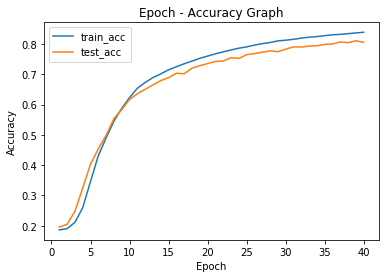

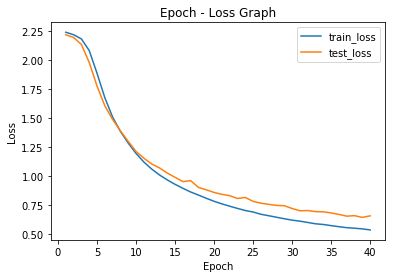

In [25]:
train_acc, train_loss = zip(*train_res)
test_acc, test_loss = zip(*test_res)

plt.plot(range(1, max_epoch+1), train_acc, label="train_acc")
plt.plot(range(1, max_epoch+1), test_acc, label="test_acc")
plt.title("Epoch - Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(range(1, max_epoch+1), train_loss, label="train_loss")
plt.plot(range(1, max_epoch+1), test_loss, label="test_loss")
plt.title("Epoch - Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Weight Visualization [6 pts]

For the best model, extract the learned weights from first hidden layer. Visualize learned weights for each neuron of the first hidden layer as an image. Show these images in a grid and add this grid in the pdf file as well. 

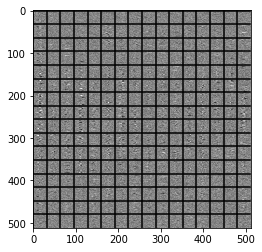

In [82]:
# write your code in this cell to visualize first hidden layer weights. Produce your figure here.
best_path = "fcnet_best_model.pth"
model = FCNet()
checkpoint = torch.load(best_path)
if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
    model.load_state_dict(checkpoint['state_dict'])
else:
    model.load_state_dict(checkpoint)

for i in range(256):
    weight = model.hidden1[0].weight.data[i].reshape(32,32)
    if i == 0:
        grid = weight
    else:
        grid = np.concatenate((grid, weight), axis=1)
grid = grid.reshape(512,512)


for i in range(16):
    plt.plot([i*32]*512, range(512), color="k")
    plt.plot(range(512), [i*32]*512, color="k")

plt.imshow(grid, cmap='gray')

### 3.2. Convolutional Neural Network (CNN) [30 pts]

#### DataLoader [3 pts]

In this part, you will train a CNN for the same problem. Again, the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset). Note that now you do not need to flatten the image. Again, for this question, do not perform cross validation. Also, just like 3.1., do not use a validation split. Use the same splits as in 3.1. 

In [86]:
# http://ufldl.stanford.edu/housenumbers/
class SVHNDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data, labels): # you are free to change parameters
        self.data = data
        self.labels = labels
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.data[index]
        _y = self.labels[index]
        return _x, _y

def rgb2gray(rgb):
    r = rgb[:,:,0]
    g = rgb[:,:,1]
    b = rgb[:,:,2]
    return r*0.299 + g*0.587 + b*0.114

def normalize_array(img):
    minn = min(img)
    maxx = max(img)
    img = np.asarray([(x - minn)/(maxx - minn) for x in img])
    return img

def process_image(img):
    img = rgb2gray(img)
    img = img.flatten()
    img = normalize_array(img)
    img = img.reshape(32,32)
    return img

def get_dataset(root): #you are free to change parameters
    # Read dataset files from "data/Q2" folder
    # Normalize datasets
    train = sio.loadmat(root + "data/Q2/train_32x32.mat")
    train_label = train['y'].T[0]
    train_label = np.asarray(list(map(lambda x: 0 if x == 10 else x, train_label)))
    
    train_data = train['X']
    processed_train_data = list()
    for i in range(train_data.shape[3]):
        img = train_data[:,:,:,i]
        img = process_image(img)
        processed_train_data.append(img)
    
    train_data = np.asarray(processed_train_data)
    train_dataset = SVHNDataset(train_data, train_label)
    
    test = sio.loadmat(root + "data/Q2/test_32x32.mat")
    test_label = test['y'].T[0]
    test_label = np.asarray(list(map(lambda x: 0 if x == 10 else x, test_label)))
    
    test_data = test['X']
    processed_test_data = list()
    for i in range(test_data.shape[3]):
        img = test_data[:,:,:,i]
        img = process_image(img)
        processed_test_data.append(img)
    
    test_data = np.asarray(processed_test_data)
    test_dataset = SVHNDataset(test_data, test_label)
    
    return train_dataset, test_dataset

#### Neural Network [9 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 32 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 64 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 128 filters with size of 3 x 3 with stride 1 and no padding, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As a classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes for the classification (linear) layer.

In [103]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # You should create your neural network here
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=0),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=(3,3), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)))
        self.fc1 = nn.Linear(8*8*128, 1000)
        self.fc2 = nn.Linear(1000, 10)
     
    def forward(self, X): # you can add any additional parameters you want
    # Forward propagation implementation should be here
        out = self.layer1(X)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

#### Training and Testing [10 pts]

Now, train your network. You need to select the appropriate loss function. You need to select your hyper-parameters. Make sure that you shuffle the samples in the training split. Note that you will not do cross validation. Plot the training loss and accuracy for each iteration. Plot the test loss and accuracy for each epoch. Your model is going to run upto the max epoch parameter. Pick the best model as your resulting model. You need to save this model in a ".pth" file. Report the validation performance change between MLP and CONV neural network and explain the reason for this change. You need to add this explanation and your plots into the pdf file.

In [90]:
cnn_train_dataset, cnn_test_dataset = get_dataset("./")

In [104]:
# Pick your hyper parameters
max_epoch = 5
train_batch = 256
test_batch = 128
learning_rate = 0.01

#use_gpu = torch.cuda.is_available()

def main(train_results, test_results): # you are free to change parameters

    # Create train dataset loader
    # Create validation dataset loader
    # Create test dataset loader
    # initialize your GENet neural network
    # define your loss function
    
    train_loader = DataLoader(cnn_train_dataset, batch_size=train_batch, shuffle=True)
    test_loader = DataLoader(cnn_test_dataset, batch_size=test_batch)
    
    model = ConvNet()
    criterion = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    
    best_acc = 0
    best_path = "convnet_best_model.pth"
    for epoch in range(max_epoch):
        res = train(epoch, model, criterion, optimizer, train_loader)
        train_results.append(res)
        res = test(model, test_loader, criterion)
        test_results.append(res)
        acc = res[0]
        if acc > best_acc:
            torch.save(model.state_dict(), best_path)
            
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader): # you are free to change parameters
    model.train()
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    t1 = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        data_time.update(time.time() - t1)
        
        # Implement training code for a one iteration
        
        print(data.shape)
        output = model(data.float())
        loss = criterion(output, labels)
        _, predicted = torch.max(output, 1)
        acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
        accuracies.update(acc, data.size(0))
        losses.update(loss.item(), data.size(0))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_time.update(time.time() - t1)
        t1 = time.time()
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time, 
               loss=losses,
               acc=accuracies))
    
    return accuracies.avg, losses.avg



''' Test&Validate your network '''
def test(model, loader, criterion): # you are free to change parameters

    model.eval()
    batch_time = AverageMeter()
    accuracies = AverageMeter()
    losses = AverageMeter()

    with torch.no_grad():
        t1 = time.time()
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code
            output = model(data.float())
            labels = labels.long()
            loss = criterion(output, labels)
            _, predicted = torch.max(output, 1)
            acc = sum([1 if item[0] == item[1] else 0 for item in zip(predicted, labels)]) / len(data)
            accuracies.update(acc, data.size(0))
            losses.update(loss.item(), data.size(0))
            
            batch_time.update(time.time() - t1)
            t1 = time.time()
            
            
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies))
    
    return accuracies.avg, losses.avg

In [105]:
train_res = list()
test_res = list()
main(train_res, test_res)

torch.Size([256, 32, 32])


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 3, 3], but got 3-dimensional input of size [256, 32, 32] instead

#### Weight Visualization [8 pts]

For the best convolutional model you obtained, extract the learnt weights from the first convolutional layer. Visualize each learnt filter of the first convolutional layer as an image. Show these images in a grid and add this grid in to the pdf file as well.

In [75]:
# write your code in this cell to visualize filters of the first convolutional layer 
print(cnn_train_dataset.data.shape)

(73257, 1024)


## BONUS: Question 4 [20 pts]

The learnt weights of a network that has been trained to solve a problem can be used as a starting point for the weights of neural networks that will be used to solve another similar problem. Instead of random initialization for the weights of the neural networks, using the weights of the neural network trained to solve a similar problem will make learning easier. This approach is called <b>"Transfer Learning"</b>.

#### Dataset

For this question, you will use CIFAR10 dataset. You can find detailed information about the dataset from https://www.cs.toronto.edu/~kriz/cifar.html. Torchvision library provides a ready-to-use data loader for the CIFAR10 dataset. You <b>DO NOT</b> need to implement your custom data loader for this question. You can easily split the dataset into training and test. Just set the "train" parameter of the constructor of torchvision.datasets.CIFAR10 class.  You will the use test split as the validation set at each epoch.

#### Model

You have to use AlexNet convolutional neural network which is one of the most basic CNN models. You <b>DO NOT</b> need to implement your own AlexNet architecture. Torchvision has also a model zoo which contains commonly used CNN models including AlexNet. Therefore, you need to use the AlexNet model from the Torchvision library. For the question 4.2 Transfer Learning part, you will need to transfer pretrained network weights as a starting point. These weights will come from the result of the training with Imagenet dataset. These will be loaded automatically when you set the "pretrained" parameter to true (check the hints in the code). Otherwise, weights will be randomly initialized.

### 4.1 Random Initialization 

#### 4.1.1 Train & Validation 

You have to train randomly initialized AlexNet CNN model using CIFAR10 dataset. At the end of each epoch, you should evaluate your network with the test split. Print (not plot) training loss, training accuracy, validation loss and validation accuracy values for each epoch. When the training is completed, print the best validation score that you have obtained during training. Report this score in your pdf file as well. You will compare this score with the result of the next question. Note that this might take a long time because of randomly initilized weights. Stop training when validation score converges.

In [ ]:
# write your code in this cell to train your network that has randomly selected weights

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=False) 
# torchvision.models.alexnet(pretrained=False) will return an alexnet model instance with randomly initialized weights
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.1.2 Kernel Output Visualization

You have trained AlexNet which has randomly initialized weights by using the CIFAR10 dataset. Now you have to plot the output of the each filter at the first convolution layer as an image by using randomly selected single validation image. Merge each image obtained from the corresponding kernel in a squared grid format. Add your plot in to the pdf file as well.

In [ ]:
# write your code in this cell to visualize output of the each filter at the first conv layer

### 4.2 Transfer Learning

#### 4.2.1 Train & Validation 

In this case, you have to train ImageNet pretrained AlexNet model for the CIFAR10 dataset. At the end of each epoch, you should evaluate your network with test split. Print training loss, training accuracy, validation loss and validation accuracy values for each epoch as an output of below cell. Report the best validation accuracy score. Compare validation scores that are obtained from these two different training approaches. Add your explanations to the pdf file.

In [ ]:
# write your code in this cell to train your network using transfer learning approach

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=True) 
# torchvision.models.alexnet(pretrained=True) will return an alexnet model instance with ImageNet pretrained network weights.
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.2.2 Kernel Output Visualization

You have trained AlexNet which is pretrained with ImageNet dataset for the CIFAR10 dataset. For this network, you have to plot the output of each filter at the first convolution layer as an image by using the same image that has picked 4.1.3 section. Merge each image obtained from the corresponding kernel in a squared grid format. Explain what these outputs mean. Compare your plot with the obtained from 4.1.2. You need to add your discussions and plot into the pdf file as well.

In [ ]:
# write your code in this cell to visualize output of the each filter at the first conv layer